<a href="https://colab.research.google.com/github/GutembergRodrigues/Analise_Crimes_Violentos_Minas_Gerais/blob/main/An%C3%A1lise_Crimes_Violentos_Minas_Gerais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 - Contextualização**
Este conjunto de dados apresente a distribuição de crimes violentos em Minas Gerais do periodo de Janeiro até Agosto do ano de 2024 , Voce pode baixar as informaçoes desse dataset no site do
''https://dados.mg.gov.br/dataset/crimes-violentos''

## **2 - Metas e Objetivos**

Compreender o comportamento e as tendências dos crimes violentos ao longo dos meses de 2024 em diferentes municípios de Minas Gerais, com foco nos tipos de crime e suas variações ao decorrer dos meses

## **3 - Features**

Registros : Quantidade de crimes confirmados

Natureza : O tipo de crime que foi cometido

Municipio : Local onde foi cometido o crime

Mes : Mes em que foi registrado o crime

In [126]:
# @title **4 - Importando Bibliotecas**
library(readr)
library(dplyr)
library(reshape2)
library(ggplot2)

In [127]:
# @title **5 - Carregando e Verificando a Base de dados**
Base_Dados <- read_delim("crimes_violentos_2024.csv",
                         delim = ";",
                         locale = locale(encoding = "utf-8",
                                         decimal_mark = ",",
                                         grouping_mark = "."),
                         show_col_types = FALSE)

head(Base_Dados)

registros,natureza,municipio,mes,ano
<dbl>,<chr>,<chr>,<chr>,<dbl>
0,Estupro Consumado,ABADIA DOS DOURADOS,Janeiro,2024
0,Estupro Consumado,ABAETE,Janeiro,2024
0,Estupro Consumado,ABRE-CAMPO,Janeiro,2024
0,Estupro Consumado,ACAIACA,Janeiro,2024
1,Estupro Consumado,ACUCENA,Janeiro,2024
0,Estupro Consumado,AGUA BOA,Janeiro,2024


In [4]:
# @title **6 - Verificando Colunas da Base de Dados**
colnames(Base_Dados)

[1] "registros" "natureza"  "municipio" "mes"       "ano"

In [5]:
# @title **7 - Informações da Base**
str(Base_Dados)

spc_tbl_ [88,712 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ registros: num [1:88712] 0 0 0 0 1 0 0 0 1 0 ...
 $ natureza : chr [1:88712] "Estupro Consumado" "Estupro Consumado" "Estupro Consumado" "Estupro Consumado" ...
 $ municipio: chr [1:88712] "ABADIA DOS DOURADOS" "ABAETE" "ABRE-CAMPO" "ACAIACA" ...
 $ mes      : chr [1:88712] "Janeiro" "Janeiro" "Janeiro" "Janeiro" ...
 $ ano      : num [1:88712] 2024 2024 2024 2024 2024 ...
 - attr(*, "spec")=
  .. cols(
  ..   registros = col_double(),
  ..   natureza = col_character(),
  ..   municipio = col_character(),
  ..   mes = col_character(),
  ..   ano = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [6]:
# @title **8 - Tamanho da Base**
dim(Base_Dados)

[1] 88712     5

In [7]:
# @title **9 - Valores Unicos**
sapply(Base_Dados, n_distinct)

registros  natureza municipio       mes       ano 
       71        13       853         8         1

In [8]:
# @title **10 - Valores Nulos**
sapply(Base_Dados, function(x) sum(is.na(x)))

registros  natureza municipio       mes       ano 
        0         0         0         0         0

[1] "Como podemos ver o grafico indica que não temos nenhum valor faltante na nossa base de dados"



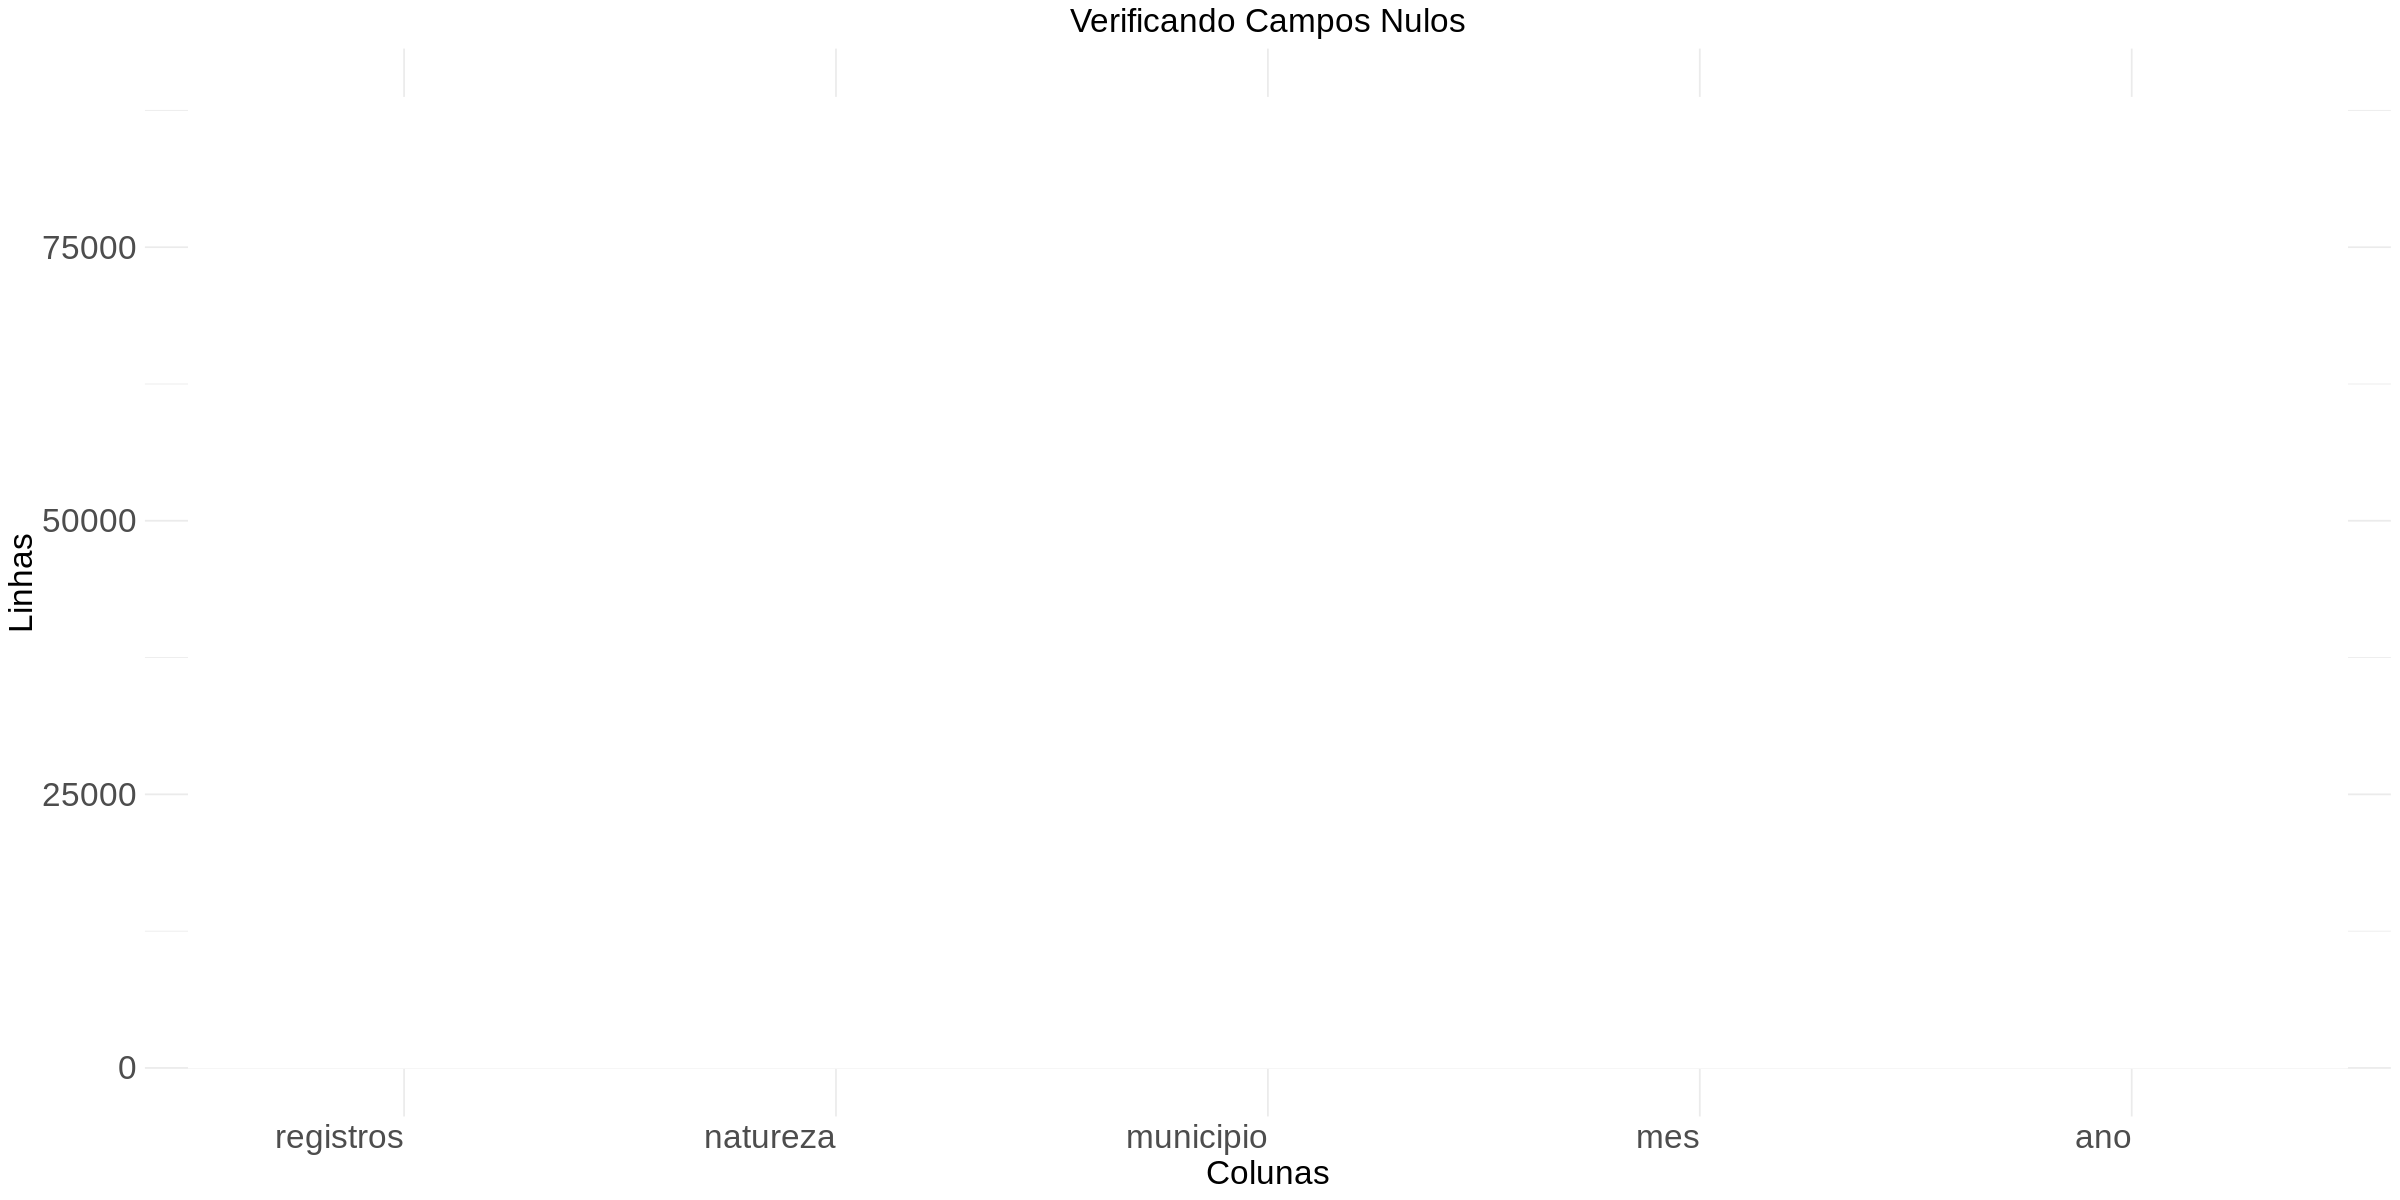

In [130]:
# @title **11 - Gerando Grafico De Campos Nulos**
dados_nulos <- is.na(Base_Dados)
dados_nulos_long <- melt(dados_nulos)

colnames(dados_nulos_long) <- c("Linha", "Coluna", "value")

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(dados_nulos_long, aes(x = Coluna, y = Linha)) +
  geom_tile(aes(fill = value), color = "white") +
  scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "white"), guide = "none") +
  labs(title = "Verificando Campos Nulos", x = "Colunas", y = "Linhas") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1, size = 20),
    axis.text.y = element_text(size = 20),
    axis.title.x = element_text(size = 20),
    axis.title.y = element_text(size = 20),
    plot.title = element_text(hjust = 0.5, size = 20)
  )

  print("Como podemos ver o grafico indica que não temos nenhum valor faltante na nossa base de dados")
  cat('\n')

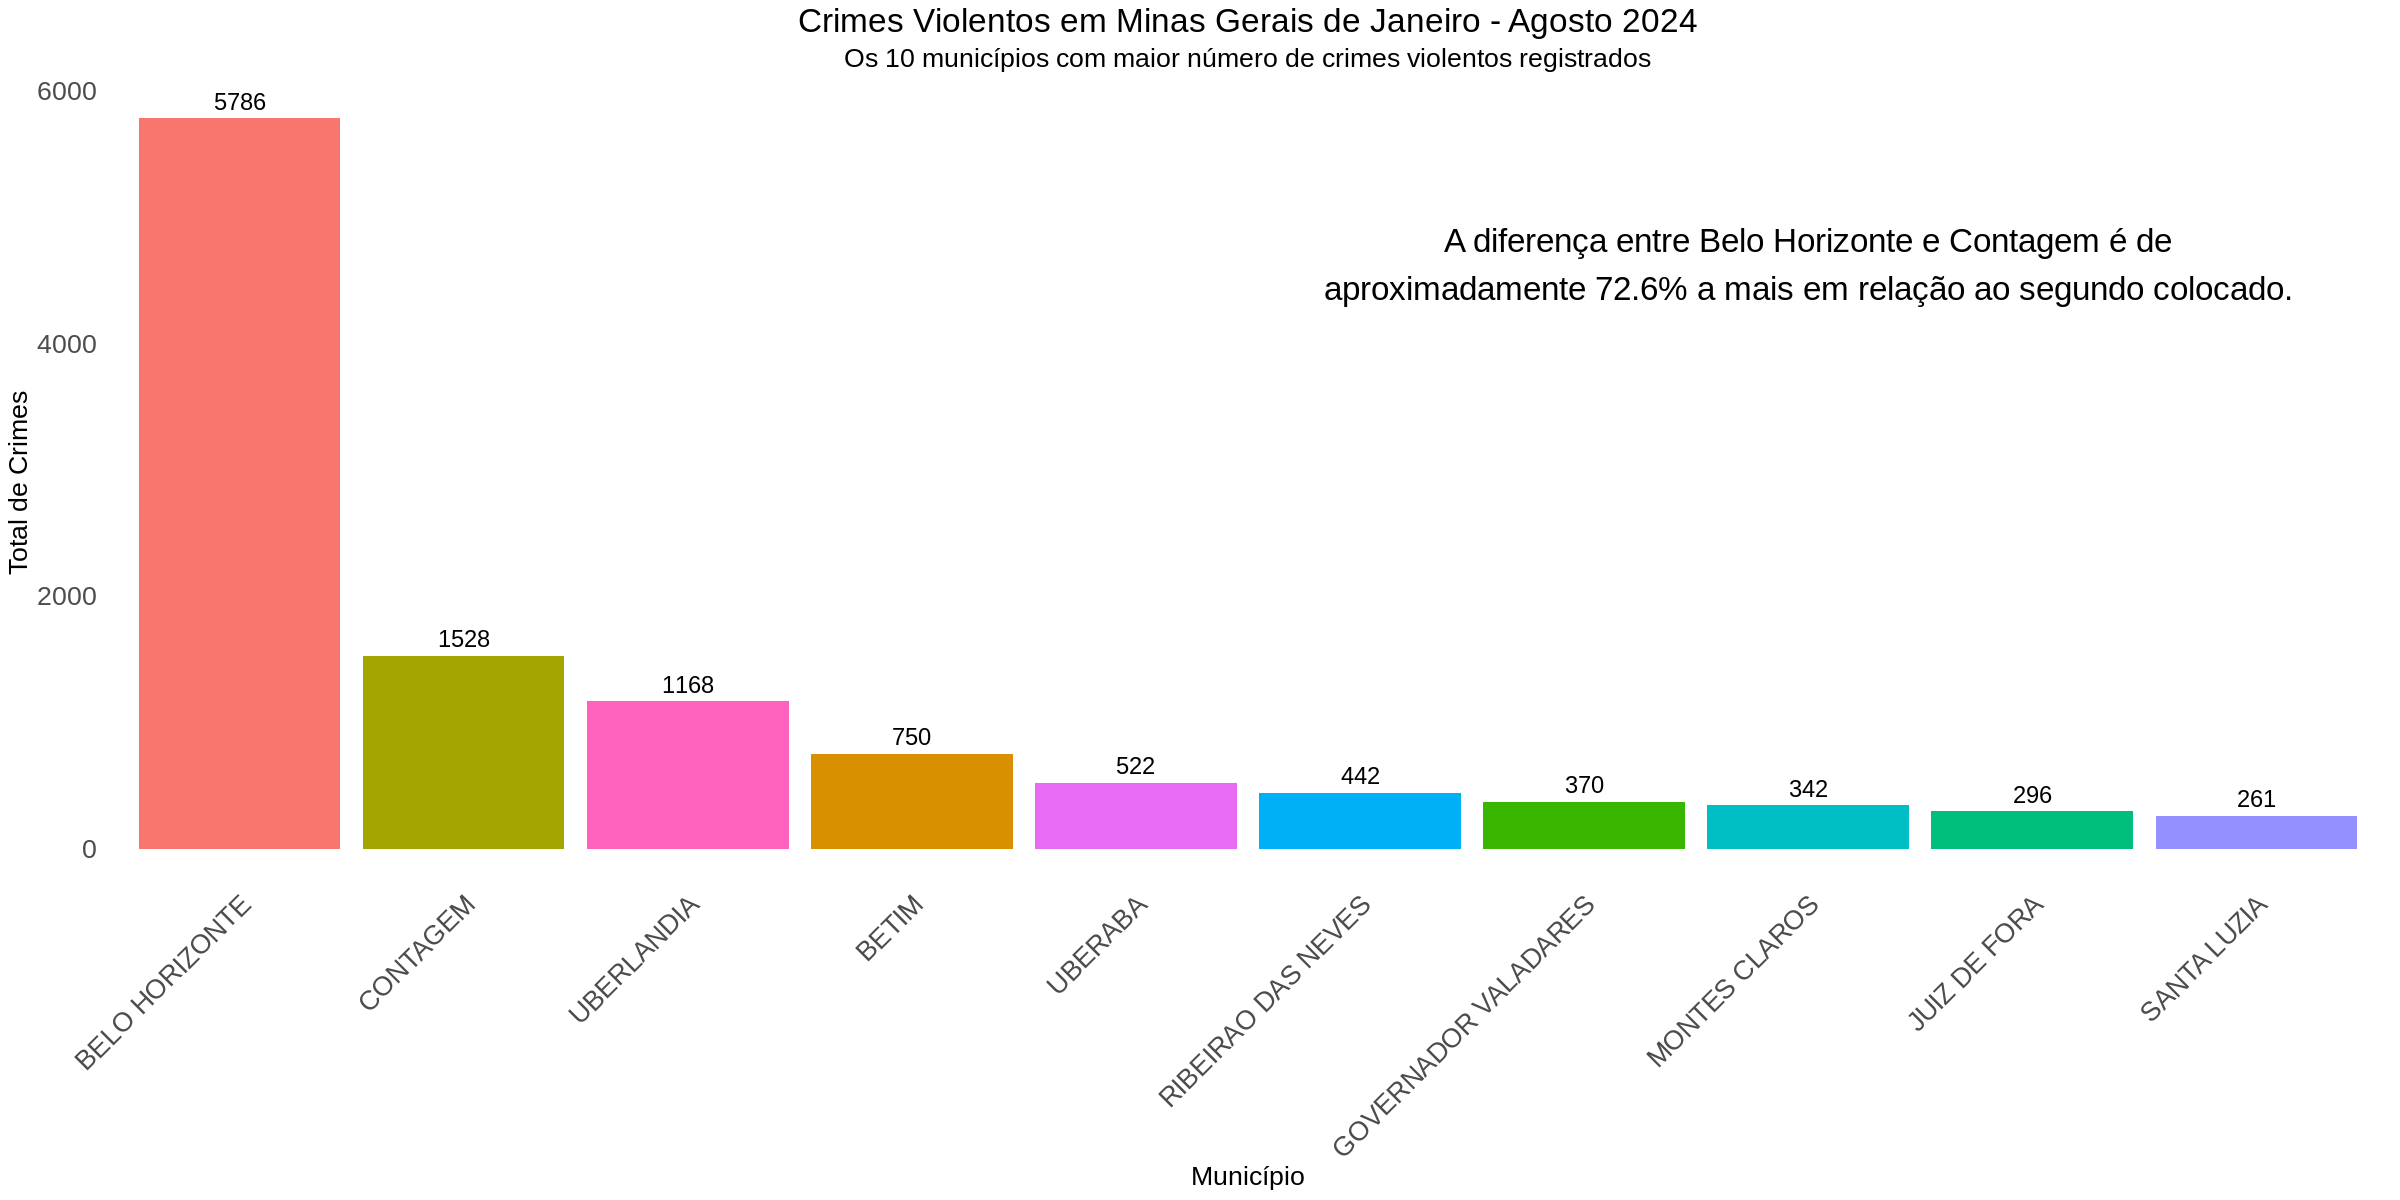

In [131]:
# @title **12 - Os 10 municipios com maior numero de crimes**

options(repr.plot.width = 20, repr.plot.height = 10)

total_crimes_por_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:10)

ggplot(total_crimes_por_municipio, aes(x = reorder(municipio, -total_crimes), y = total_crimes, fill = municipio)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes),
            vjust = -0.5, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os 10 municípios com maior número de crimes violentos registrados",
    x = "Município", y = "Total de Crimes"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 20),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +

  annotate(
    "text", x = 8, y = max(total_crimes_por_municipio$total_crimes) * 0.8,
    label = "A diferença entre Belo Horizonte e Contagem é de\naproximadamente 72.6% a mais em relação ao segundo colocado.",
    color = "black", size = 7, hjust = 0.5
  )

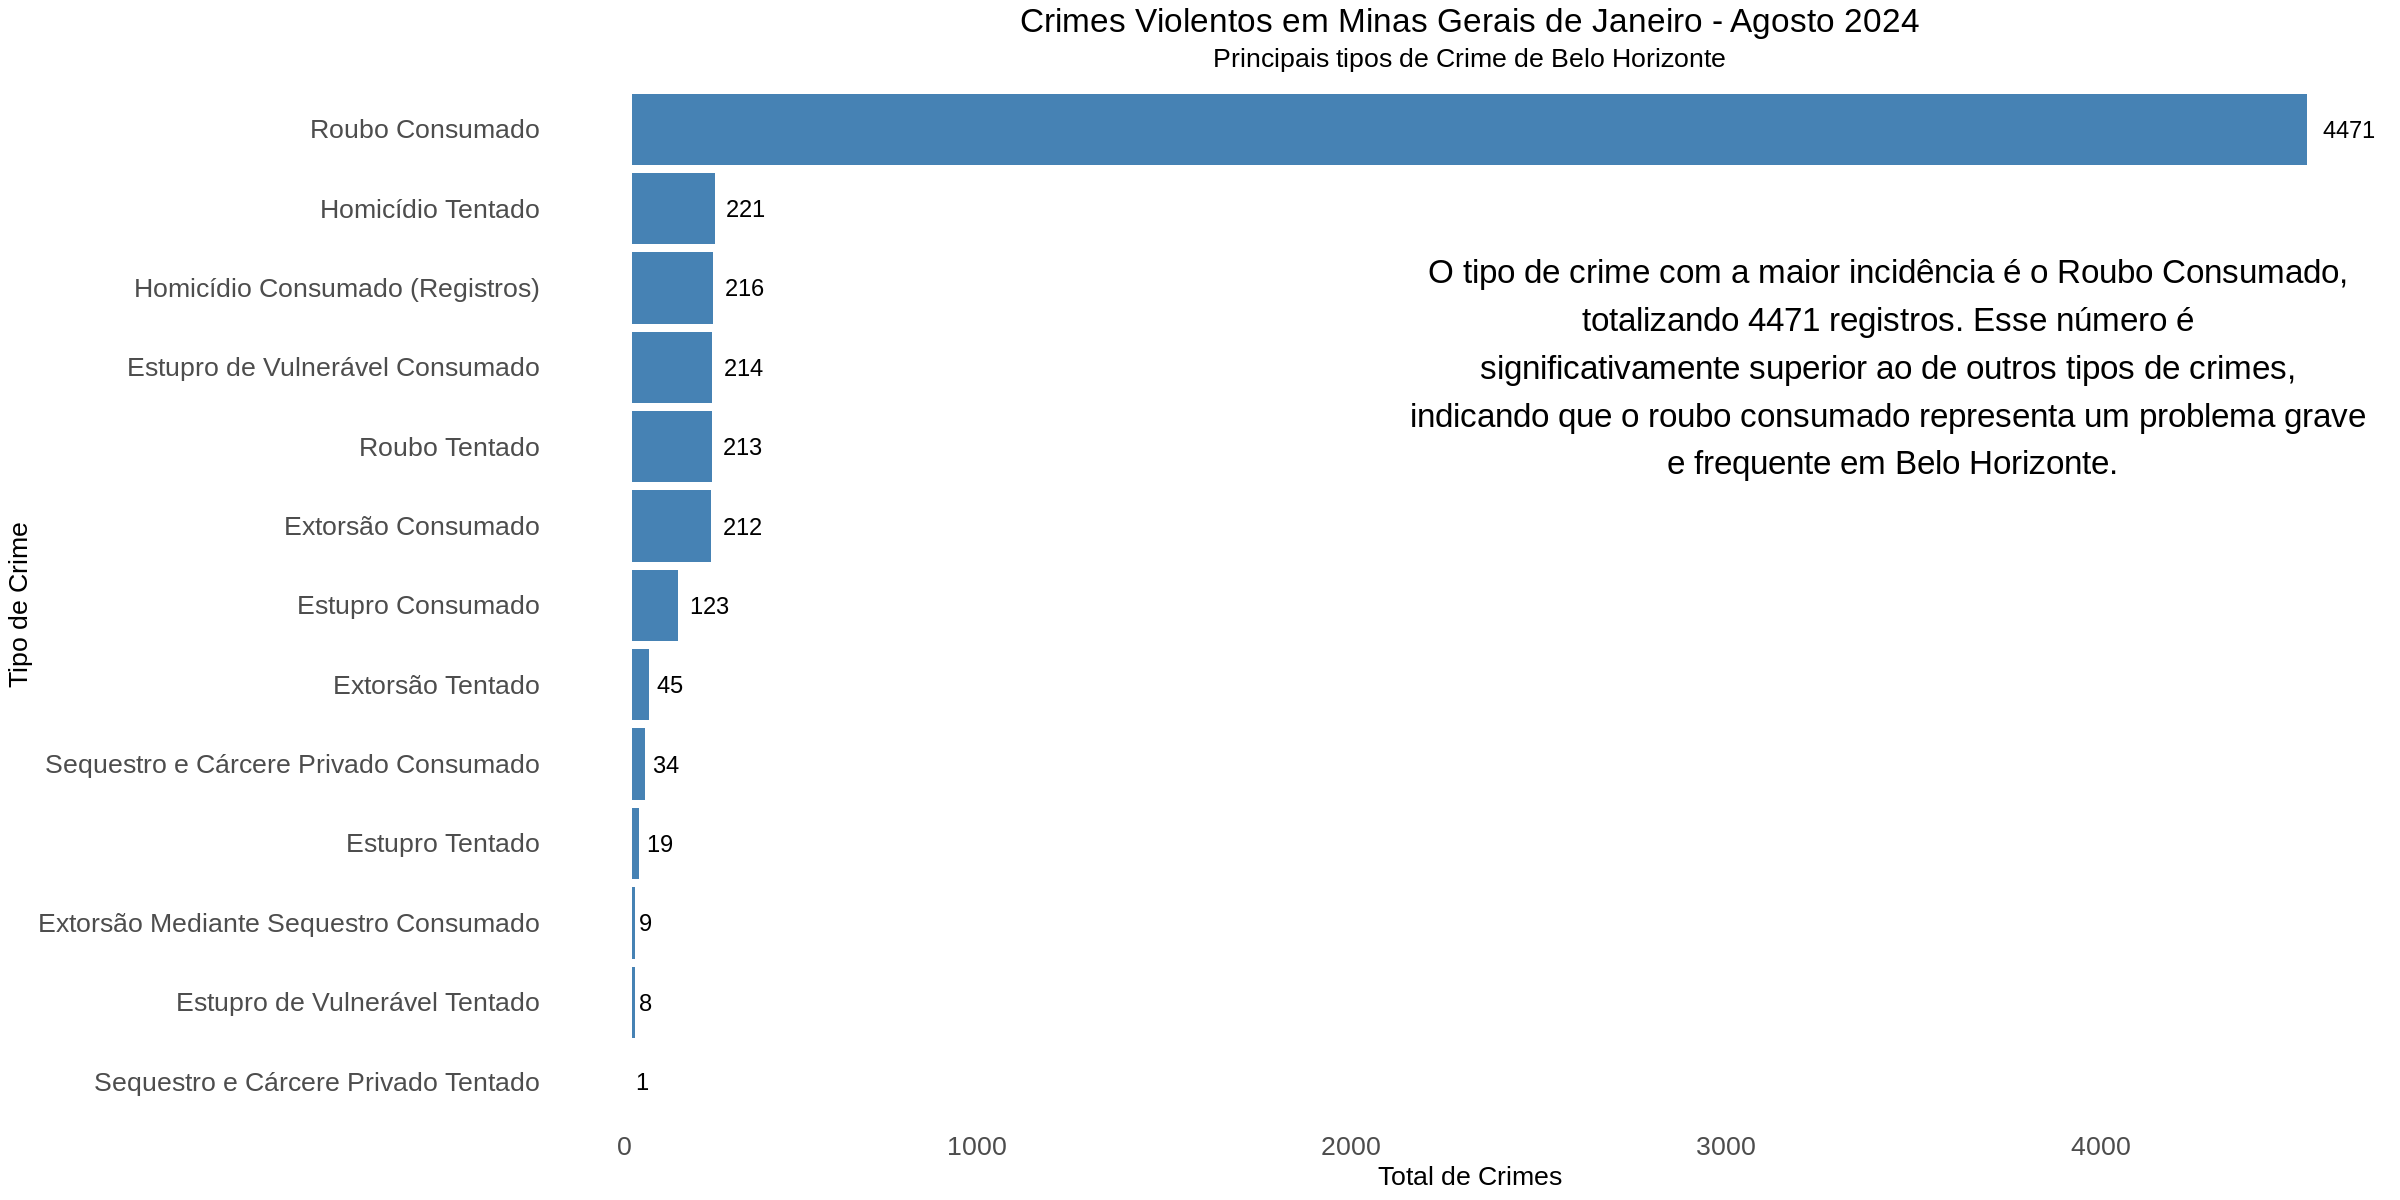

In [11]:
# @title **13 - Crimes predominantes em Belo Horizonte**

dados_2024 <- Base_Dados %>%
  filter(ano == 2024, registros > 0)

options(repr.plot.width = 20, repr.plot.height = 10)

municipio_top_2024 <- dados_2024 %>%
  group_by(municipio) %>%
  summarise(total_crimes = sum(registros)) %>%
  arrange(desc(total_crimes)) %>%
  slice(1) %>%
  pull(municipio)

tipos_de_crimes <- dados_2024 %>%
  filter(municipio == municipio_top_2024) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros)) %>%
  arrange(desc(total_crimes))


ggplot(tipos_de_crimes, aes(x = reorder(natureza, total_crimes), y = total_crimes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = paste("Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024"),
    subtitle = "Principais tipos de Crime de Belo Horizonte",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1, size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 20),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  annotate(
    "text", x = 10, y = max(tipos_de_crimes$total_crimes) * 0.75,
    label = "O tipo de crime com a maior incidência é o Roubo Consumado,\n totalizando 4471 registros. Esse número é \n significativamente superior ao de outros tipos de crimes, \nindicando que o roubo consumado representa um problema grave\n e frequente em Belo Horizonte.",
    color = "black", size = 7, hjust = 0.5
  )


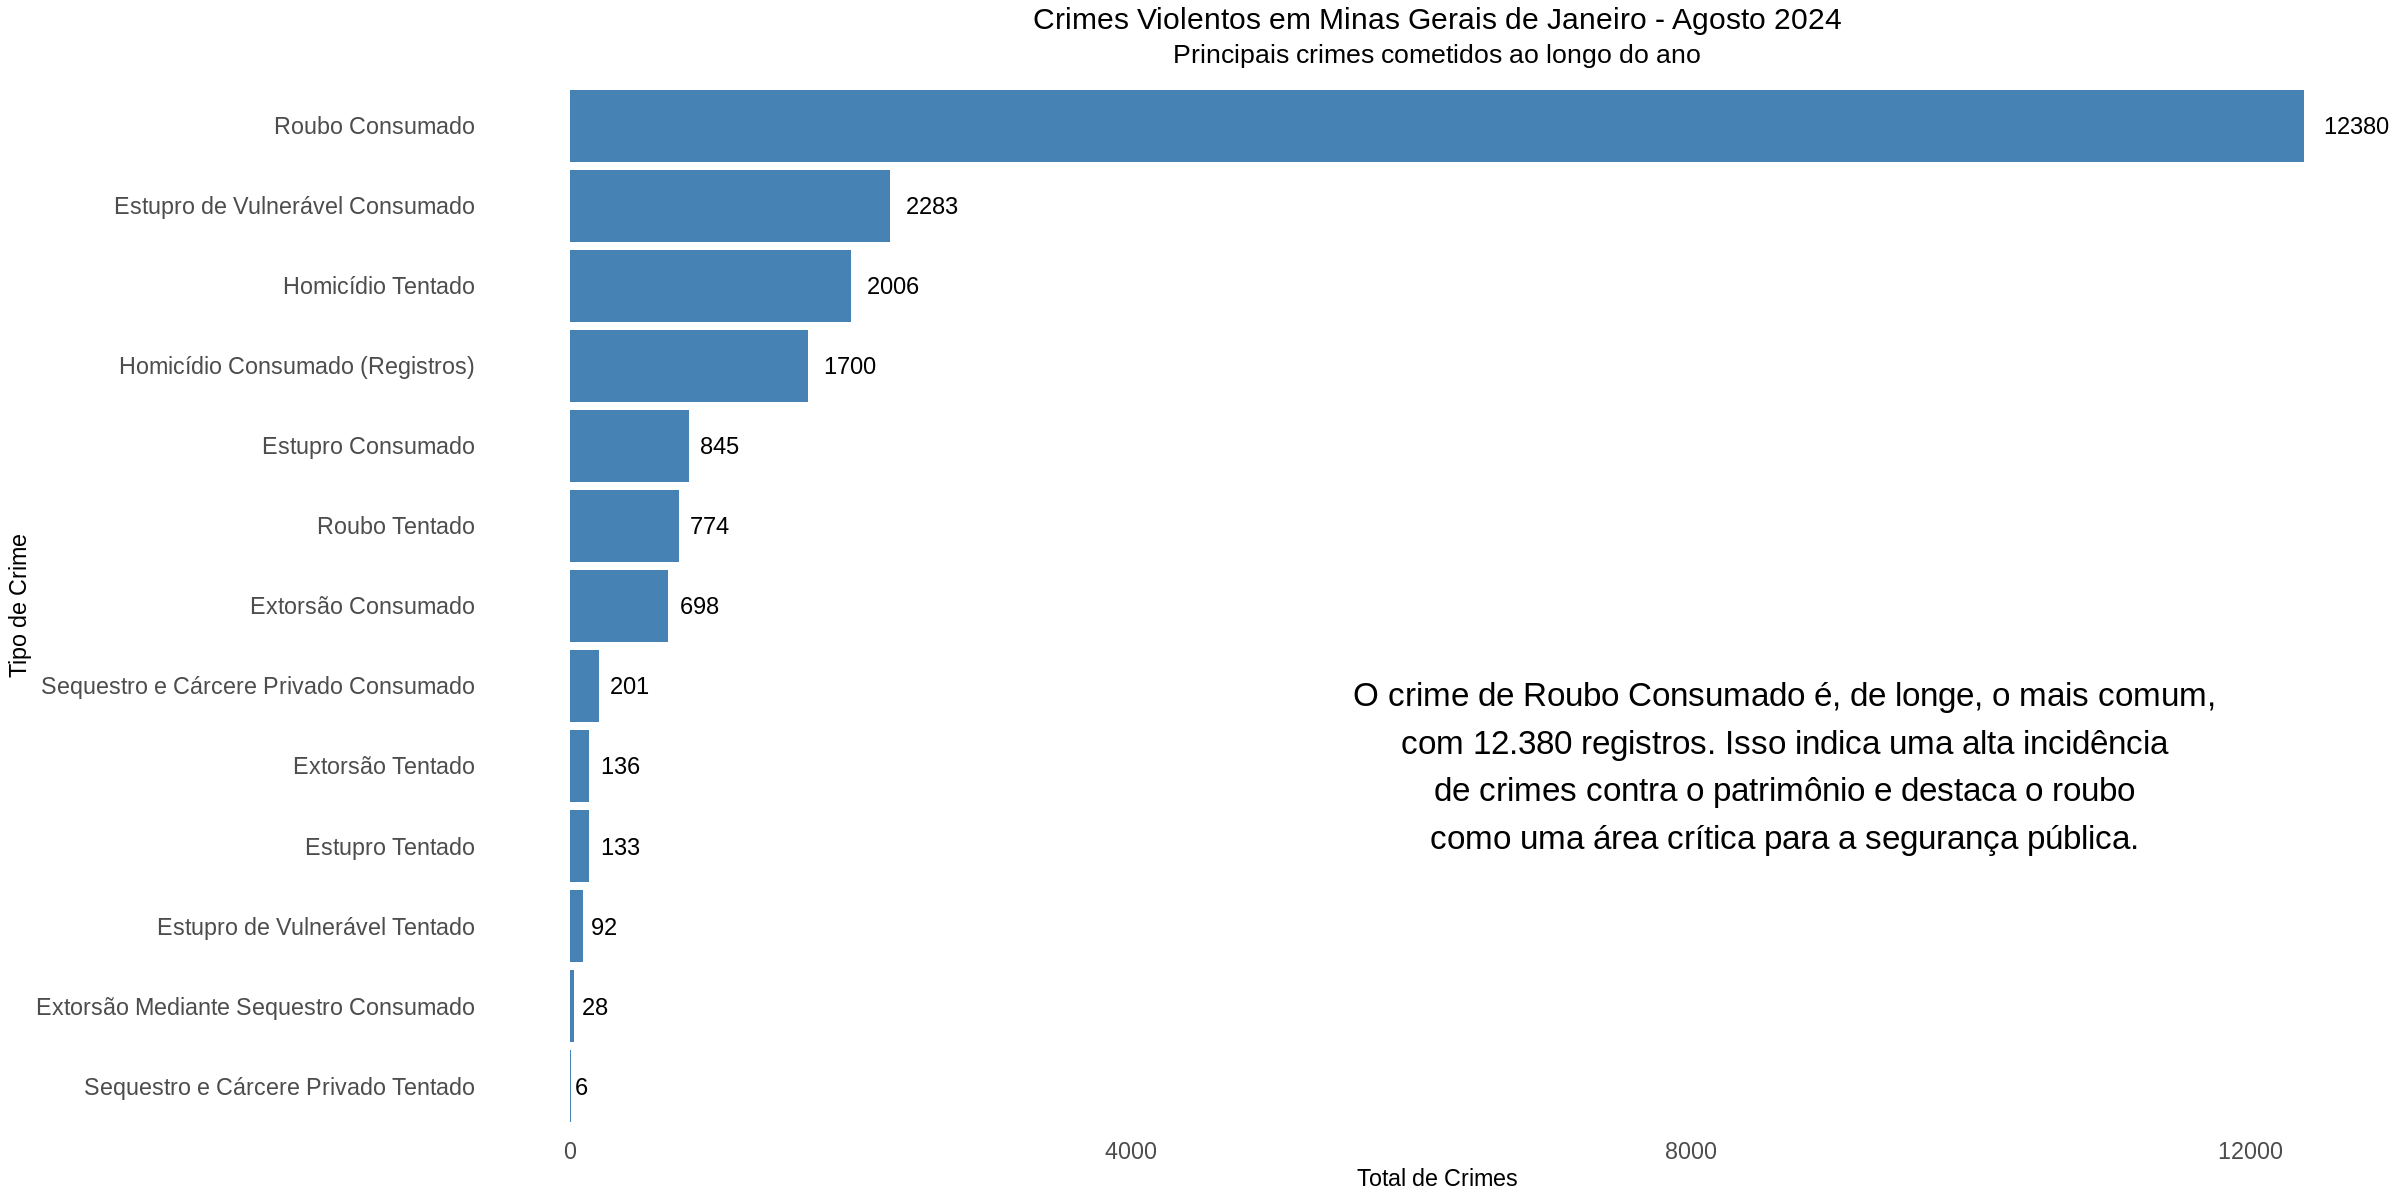

In [12]:
# @title **14 - Principais crimes durante o ano**
crimes_mais_comuns <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes))

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(crimes_mais_comuns, aes(x = reorder(natureza, total_crimes), y = total_crimes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Principais crimes cometidos ao longo do ano",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +

  annotate(
    "text", x = 5, y = max(crimes_mais_comuns$total_crimes) * 0.7,
    label = "O crime de Roubo Consumado é, de longe, o mais comum,\ncom 12.380 registros. Isso indica uma alta incidência\nde crimes contra o patrimônio e destaca o roubo\ncomo uma área crítica para a segurança pública.",
    color = "black", size = 7, hjust = 0.5
  )


A análise sugere que não há uma forte tendência sazonal evidente nos tipos de crimes ao longo dos meses.
 A maioria dos tipos de crimes mantém uma distribuição mensal relativamente estável, com o Roubo Consumado dominando todos os meses.
 Pequenas variações, como o aumento de crimes em junho e julho, podem indicar leves tendências sazonais.



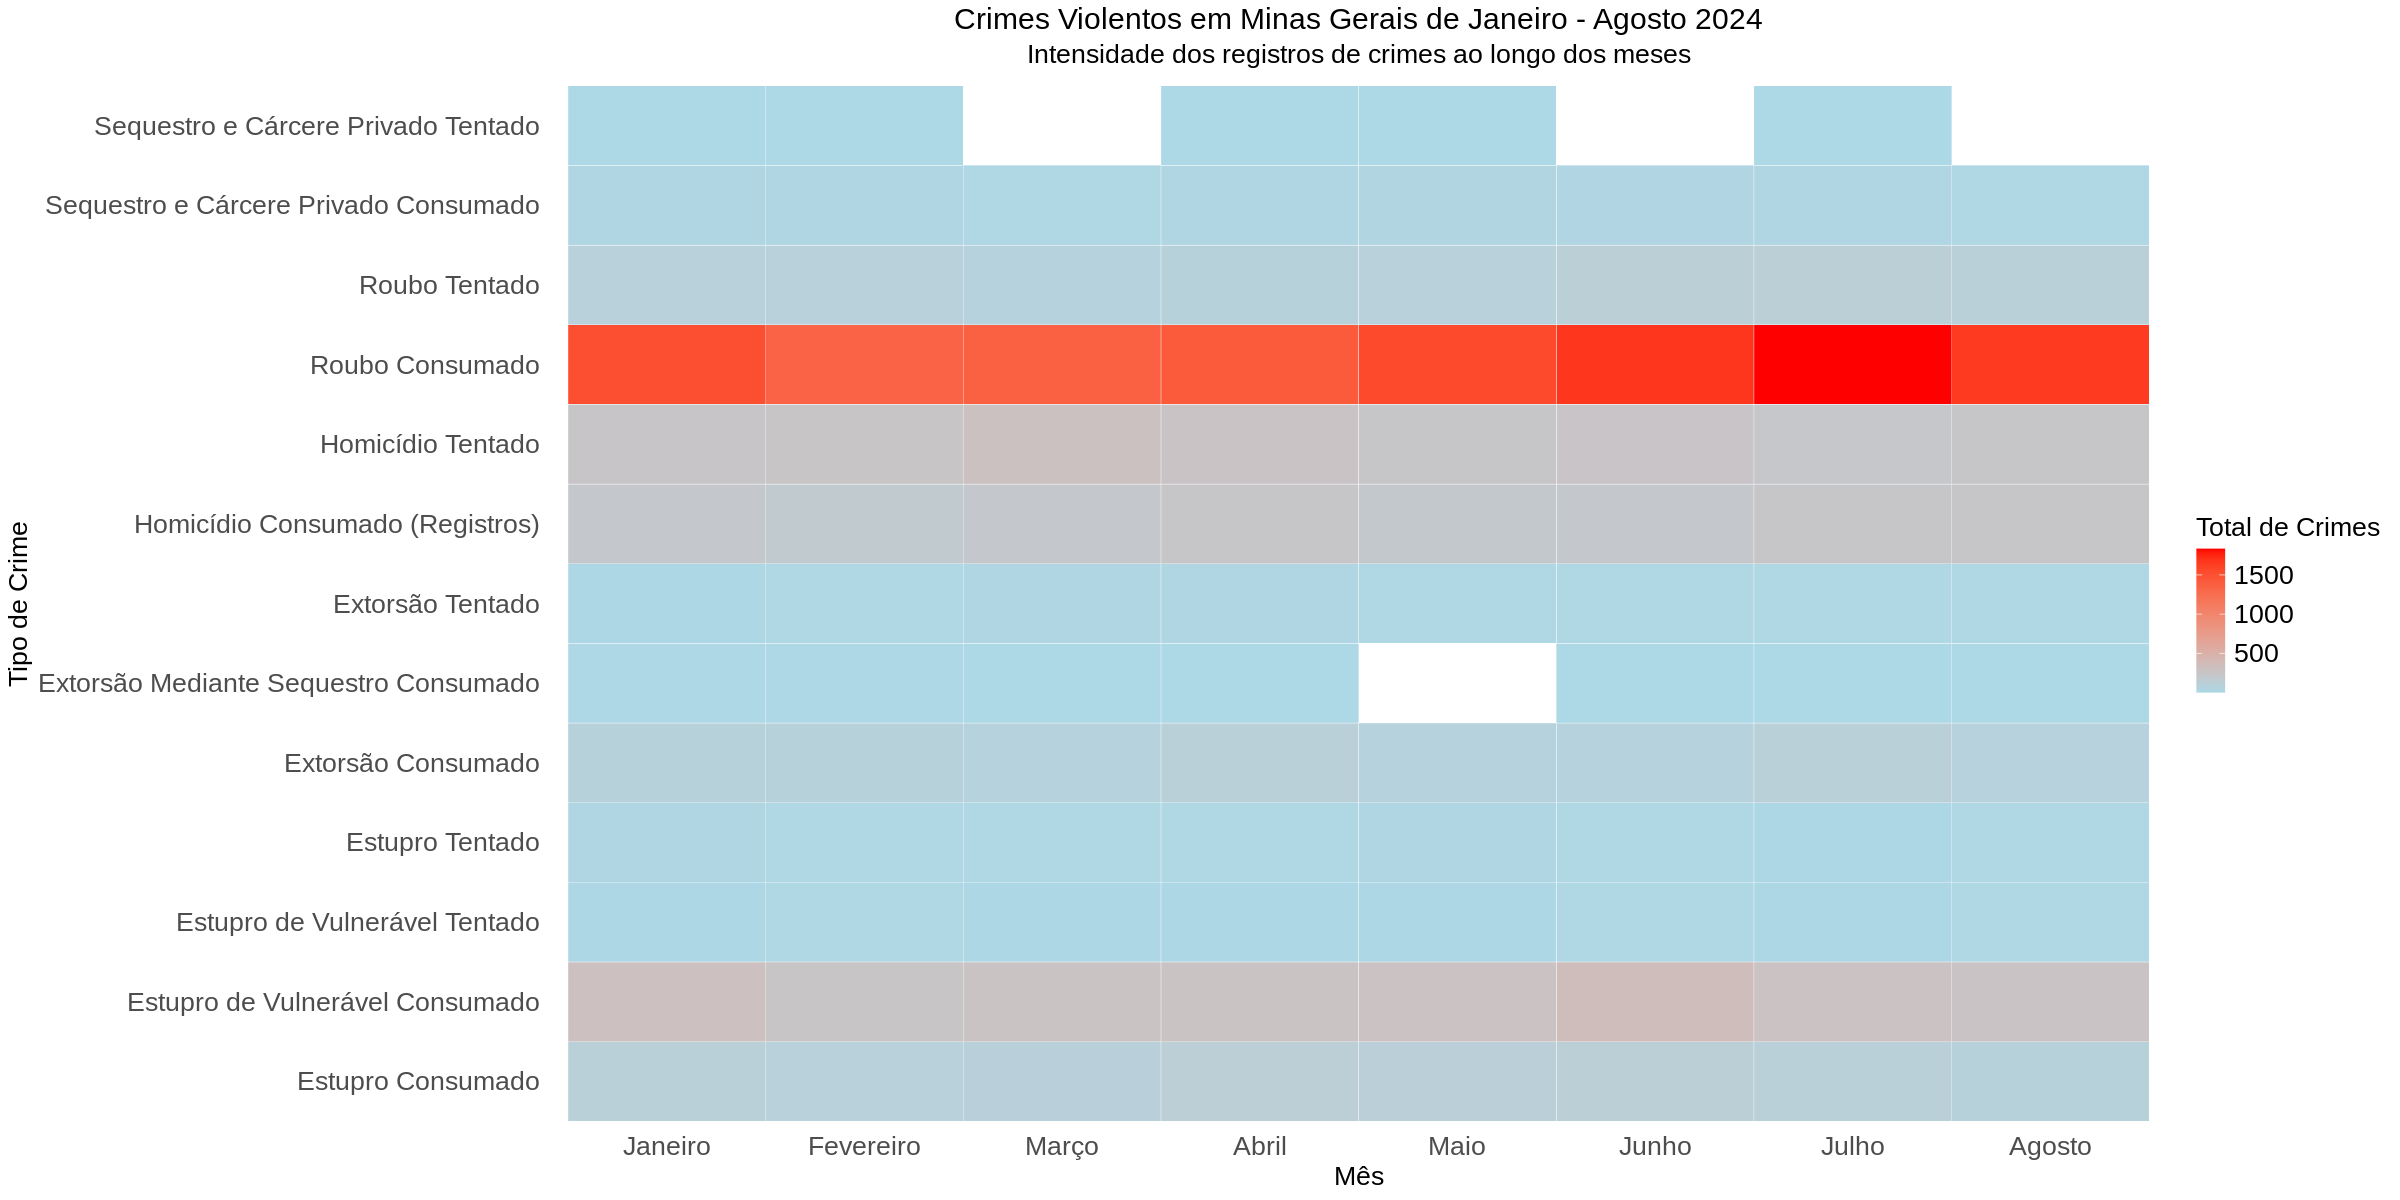

In [13]:
# @title **15 - Itensidade de cada crime por mes**

cat("A análise sugere que não há uma forte tendência sazonal evidente nos tipos de crimes ao longo dos meses.\n",
    "A maioria dos tipos de crimes mantém uma distribuição mensal relativamente estável, com o Roubo Consumado dominando todos os meses.\n",
    "Pequenas variações, como o aumento de crimes em junho e julho, podem indicar leves tendências sazonais.\n\n")

tendencia_sazonal <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(mes, natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")

options(repr.plot.width = 20, repr.plot.height = 10)


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


tendencia_sazonal <- tendencia_sazonal %>%
  mutate(mes = factor(mes, levels = meses_ordem))


ggplot(tendencia_sazonal, aes(x = mes, y = natureza, fill = total_crimes)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightblue", high = "red", name = "Total de Crimes") +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Intensidade dos registros de crimes ao longo dos meses",
    x = "Mês", y = "Tipo de Crime"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    legend.text = element_text(size = 16),
    legend.title = element_text(size = 16),
    panel.grid = element_blank()
  )


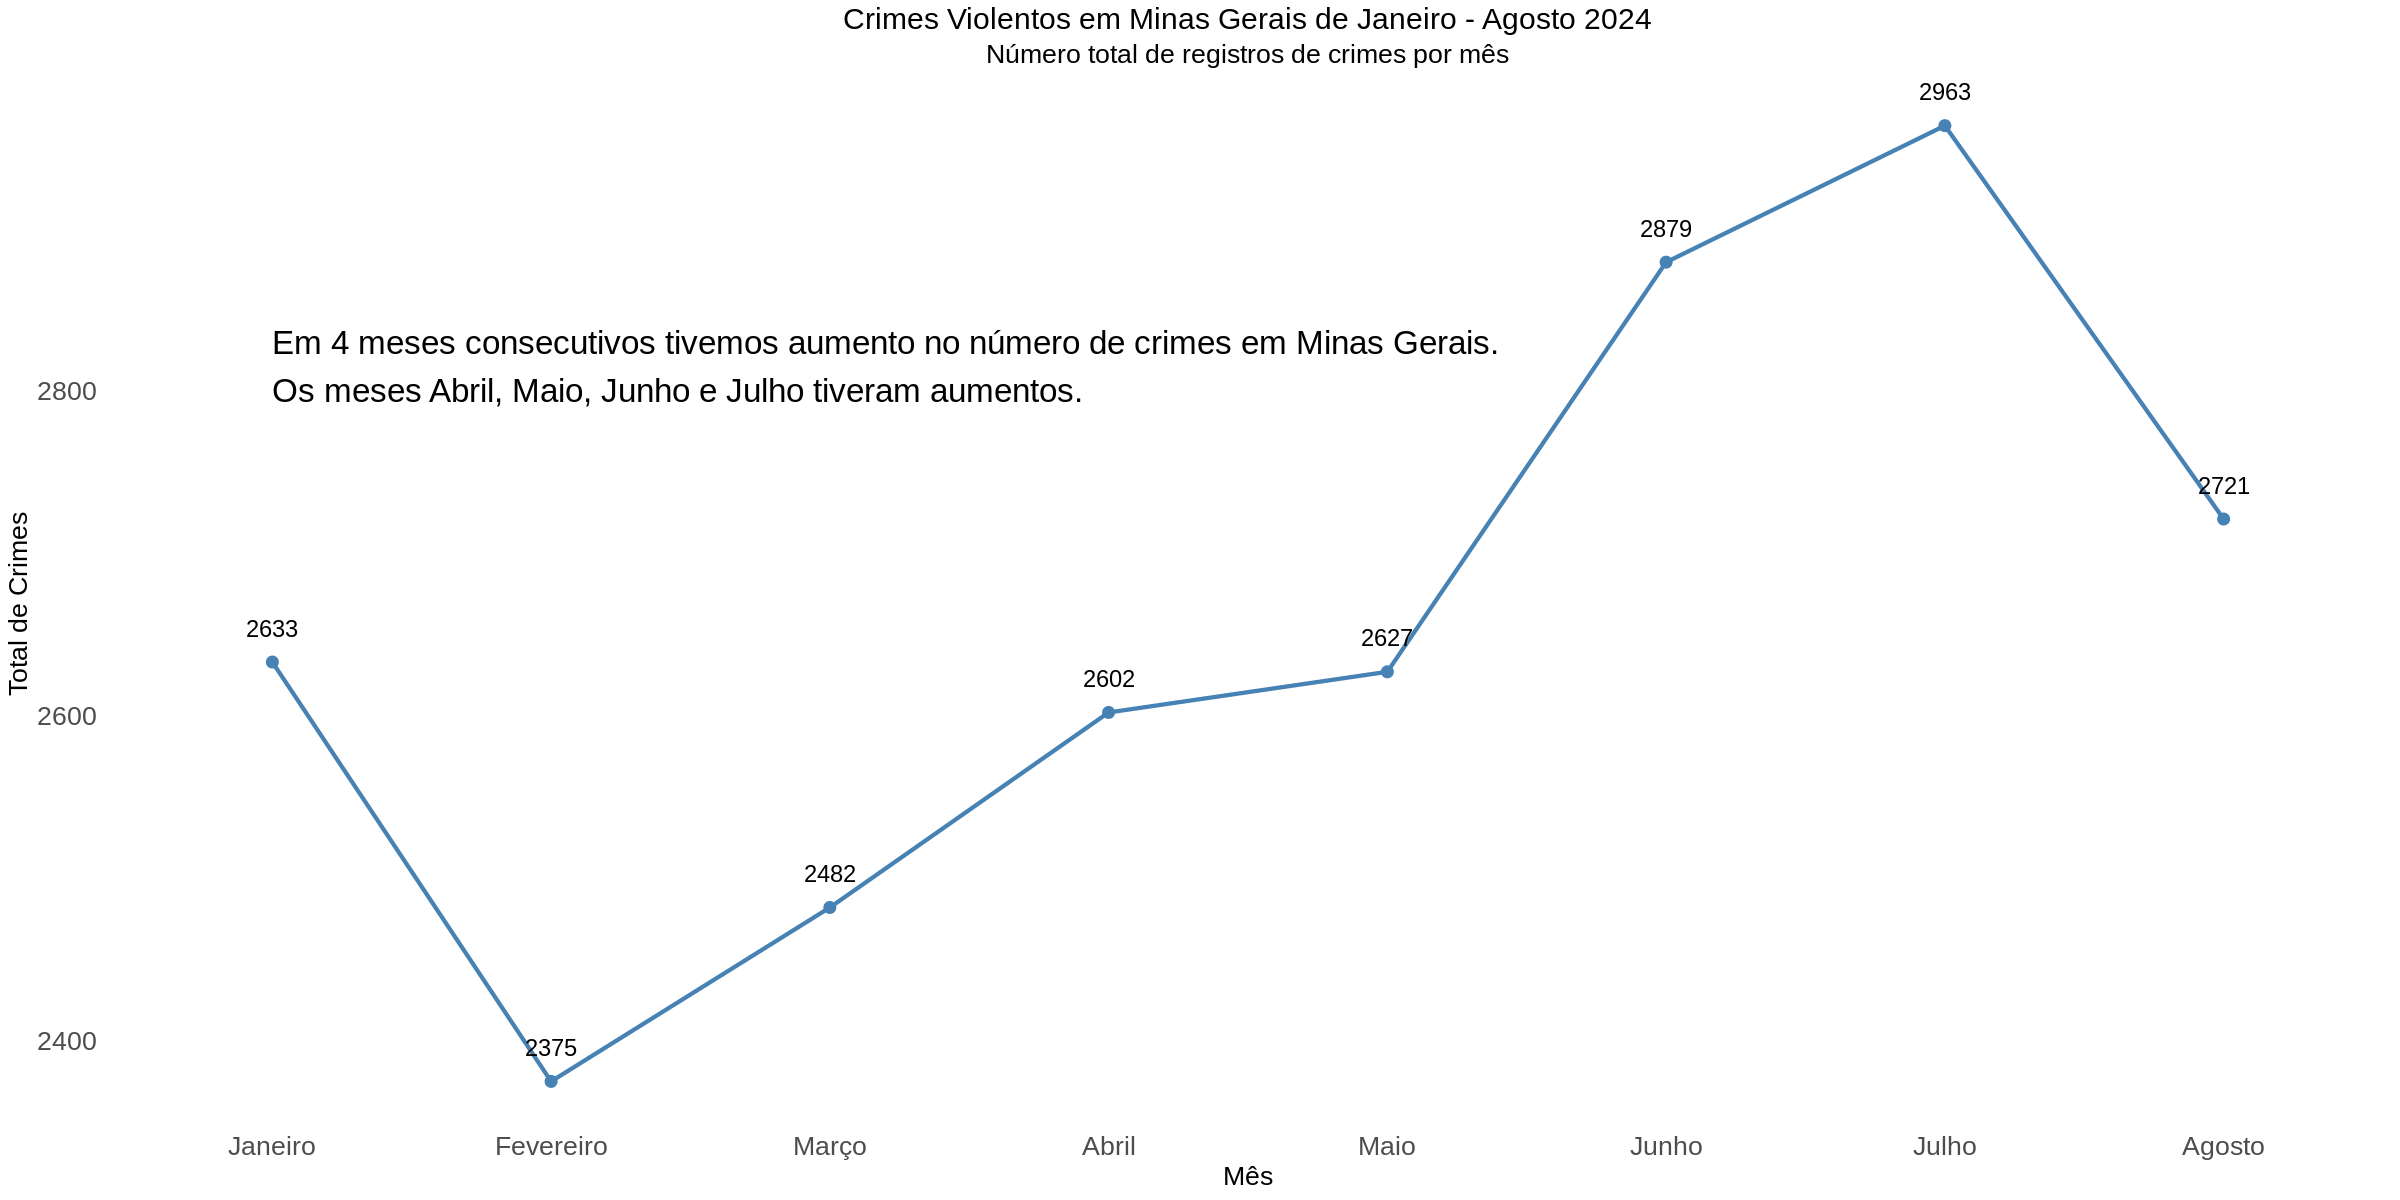

In [14]:
# @title **16 - Numero total de crimes por mes**
variacao_mensal <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


variacao_mensal <- variacao_mensal %>%
  mutate(mes = factor(mes, levels = meses_ordem))


options(repr.plot.width = 20, repr.plot.height = 10)


ggplot(variacao_mensal, aes(x = mes, y = total_crimes, group = 1)) +
  geom_line(color = "steelblue", linewidth = 1.2) +
  geom_point(color = "steelblue", size = 3) +
  geom_text(aes(label = total_crimes), vjust = -1.5, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Número total de registros de crimes por mês",
    x = "Mês", y = "Total de Crimes"
  ) +
  annotate(
    "text", x = 1, y = max(variacao_mensal$total_crimes) * 0.95,
    label = "Em 4 meses consecutivos tivemos aumento no número de crimes em Minas Gerais.\nOs meses Abril, Maio, Junho e Julho tiveram aumentos.",
    color = "black", size = 7, hjust = 0
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  )

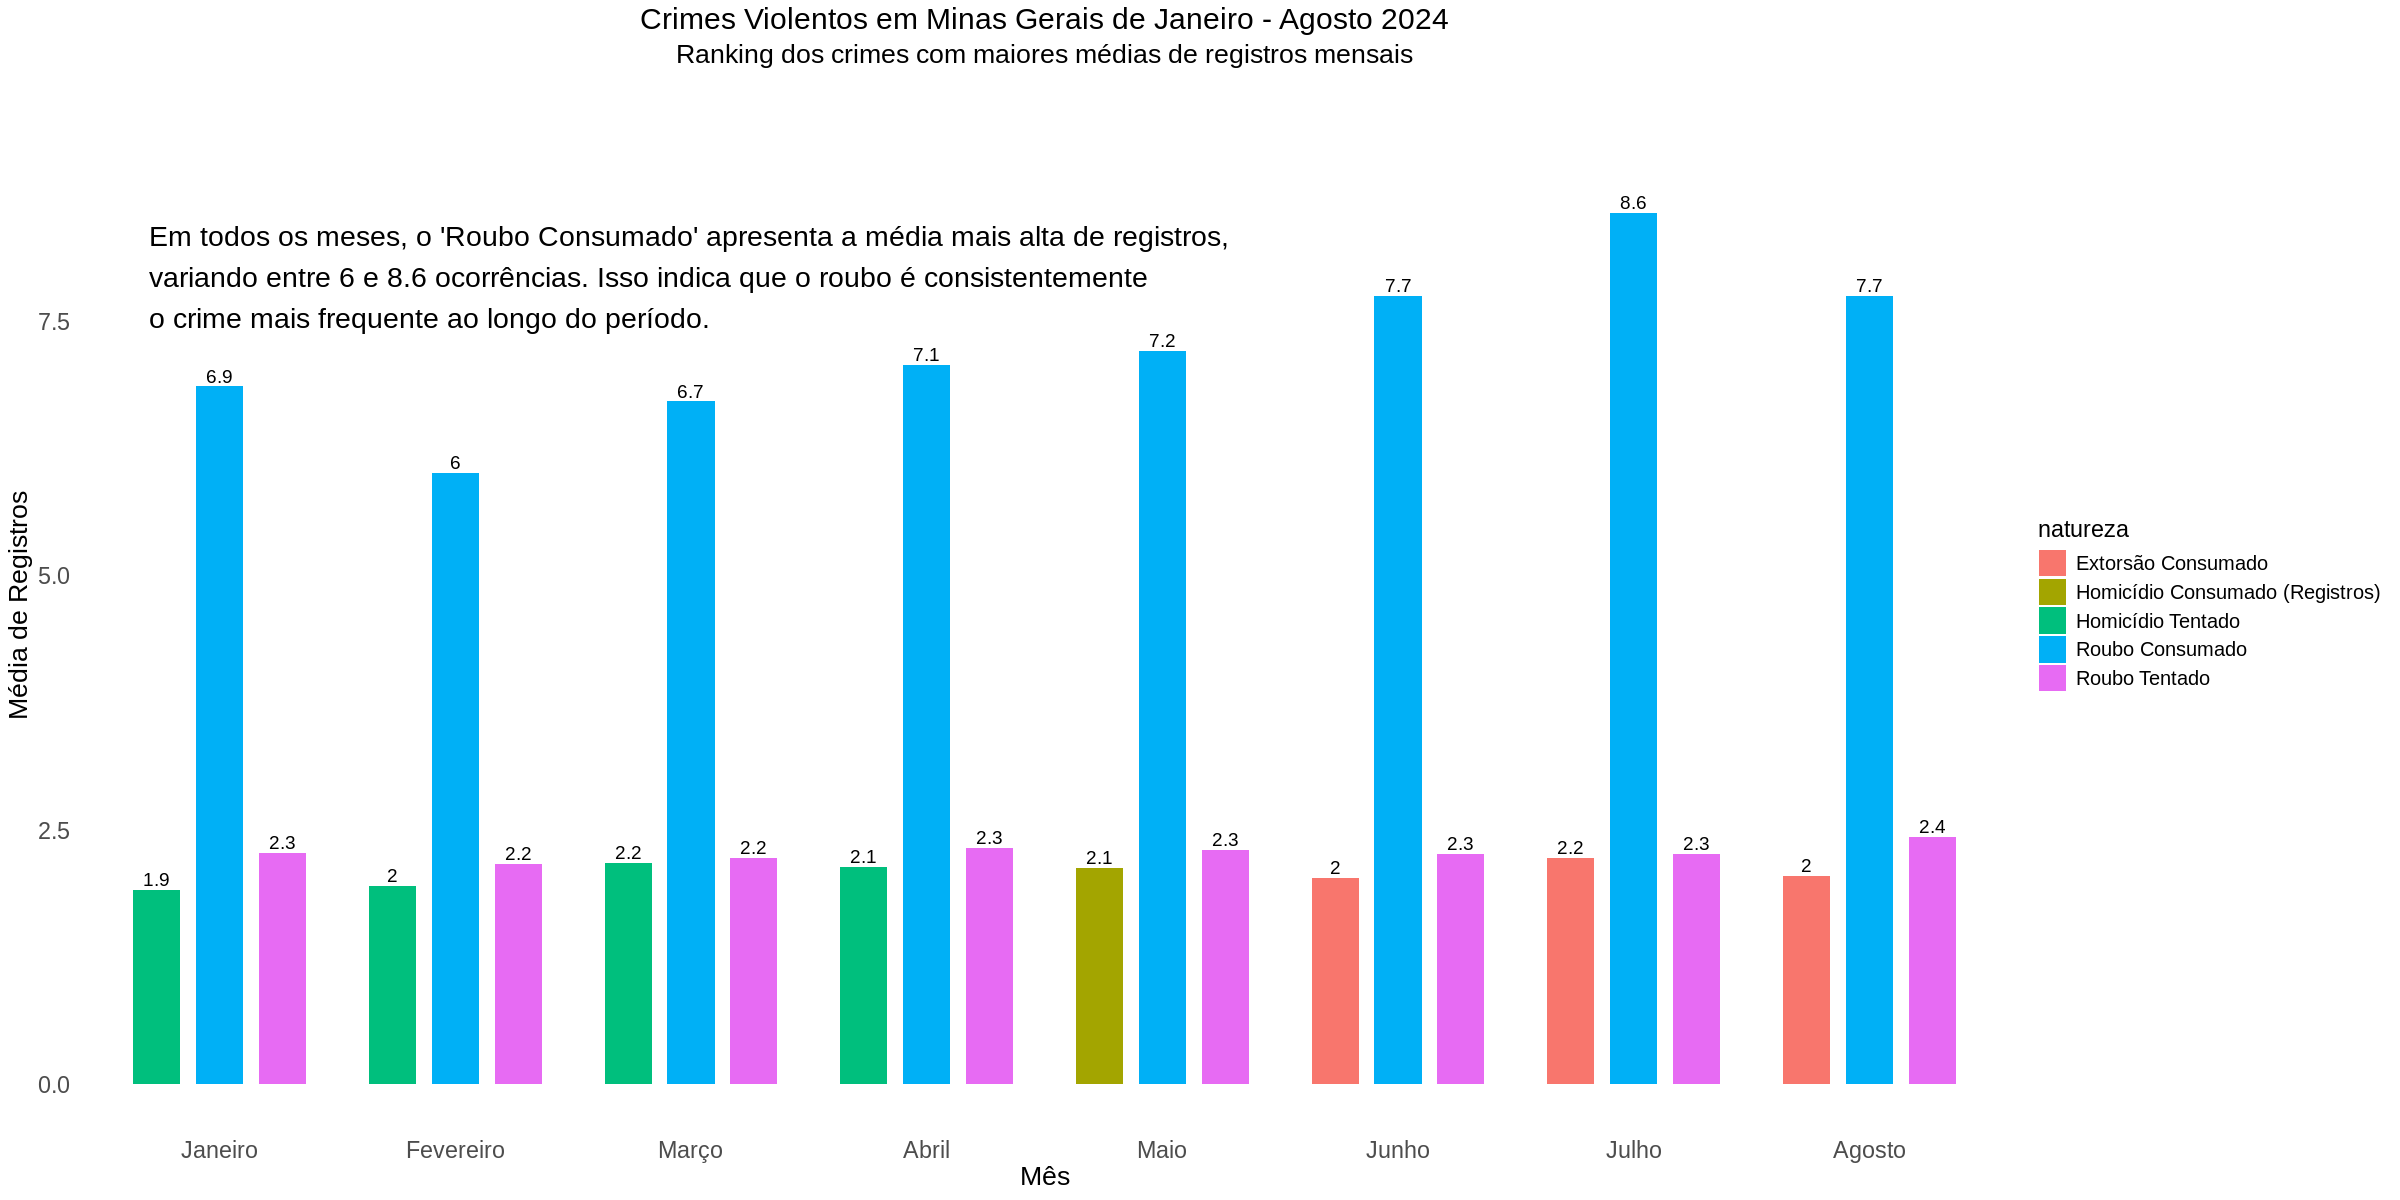

In [15]:
# @title **17 - Ranking com média dos crimes por meses**
options(repr.plot.width = 20, repr.plot.height = 10)

media_registros <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(natureza, mes) %>%
  summarise(media_registros = mean(registros), .groups = "drop") %>%
  mutate(mes = factor(mes, levels = c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                                      "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")))


top3_media_crimes <- media_registros %>%
  group_by(mes) %>%
  slice_max(order_by = media_registros, n = 3) %>%
  arrange(mes, desc(media_registros))


ggplot(top3_media_crimes, aes(x = mes, y = media_registros, fill = natureza)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width = 0.6) +
  geom_text(aes(label = round(media_registros, 1)),
            position = position_dodge(width = 0.8),
            vjust = -0.3, size = 4) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Ranking dos crimes com maiores médias de registros mensais",
    x = "Mês", y = "Média de Registros"
  ) +

  annotate(
    "text", x = 0.7, y = max(top3_media_crimes$media_registros) * 1.1,
    label = "Em todos os meses, o 'Roubo Consumado' apresenta a média mais alta de registros,\nvariando entre 6 e 8.6 ocorrências. Isso indica que o roubo é consistentemente\no crime mais frequente ao longo do período.",
    color = "black", size = 6, hjust = 0., vjust = 2
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    panel.grid = element_blank()
  )


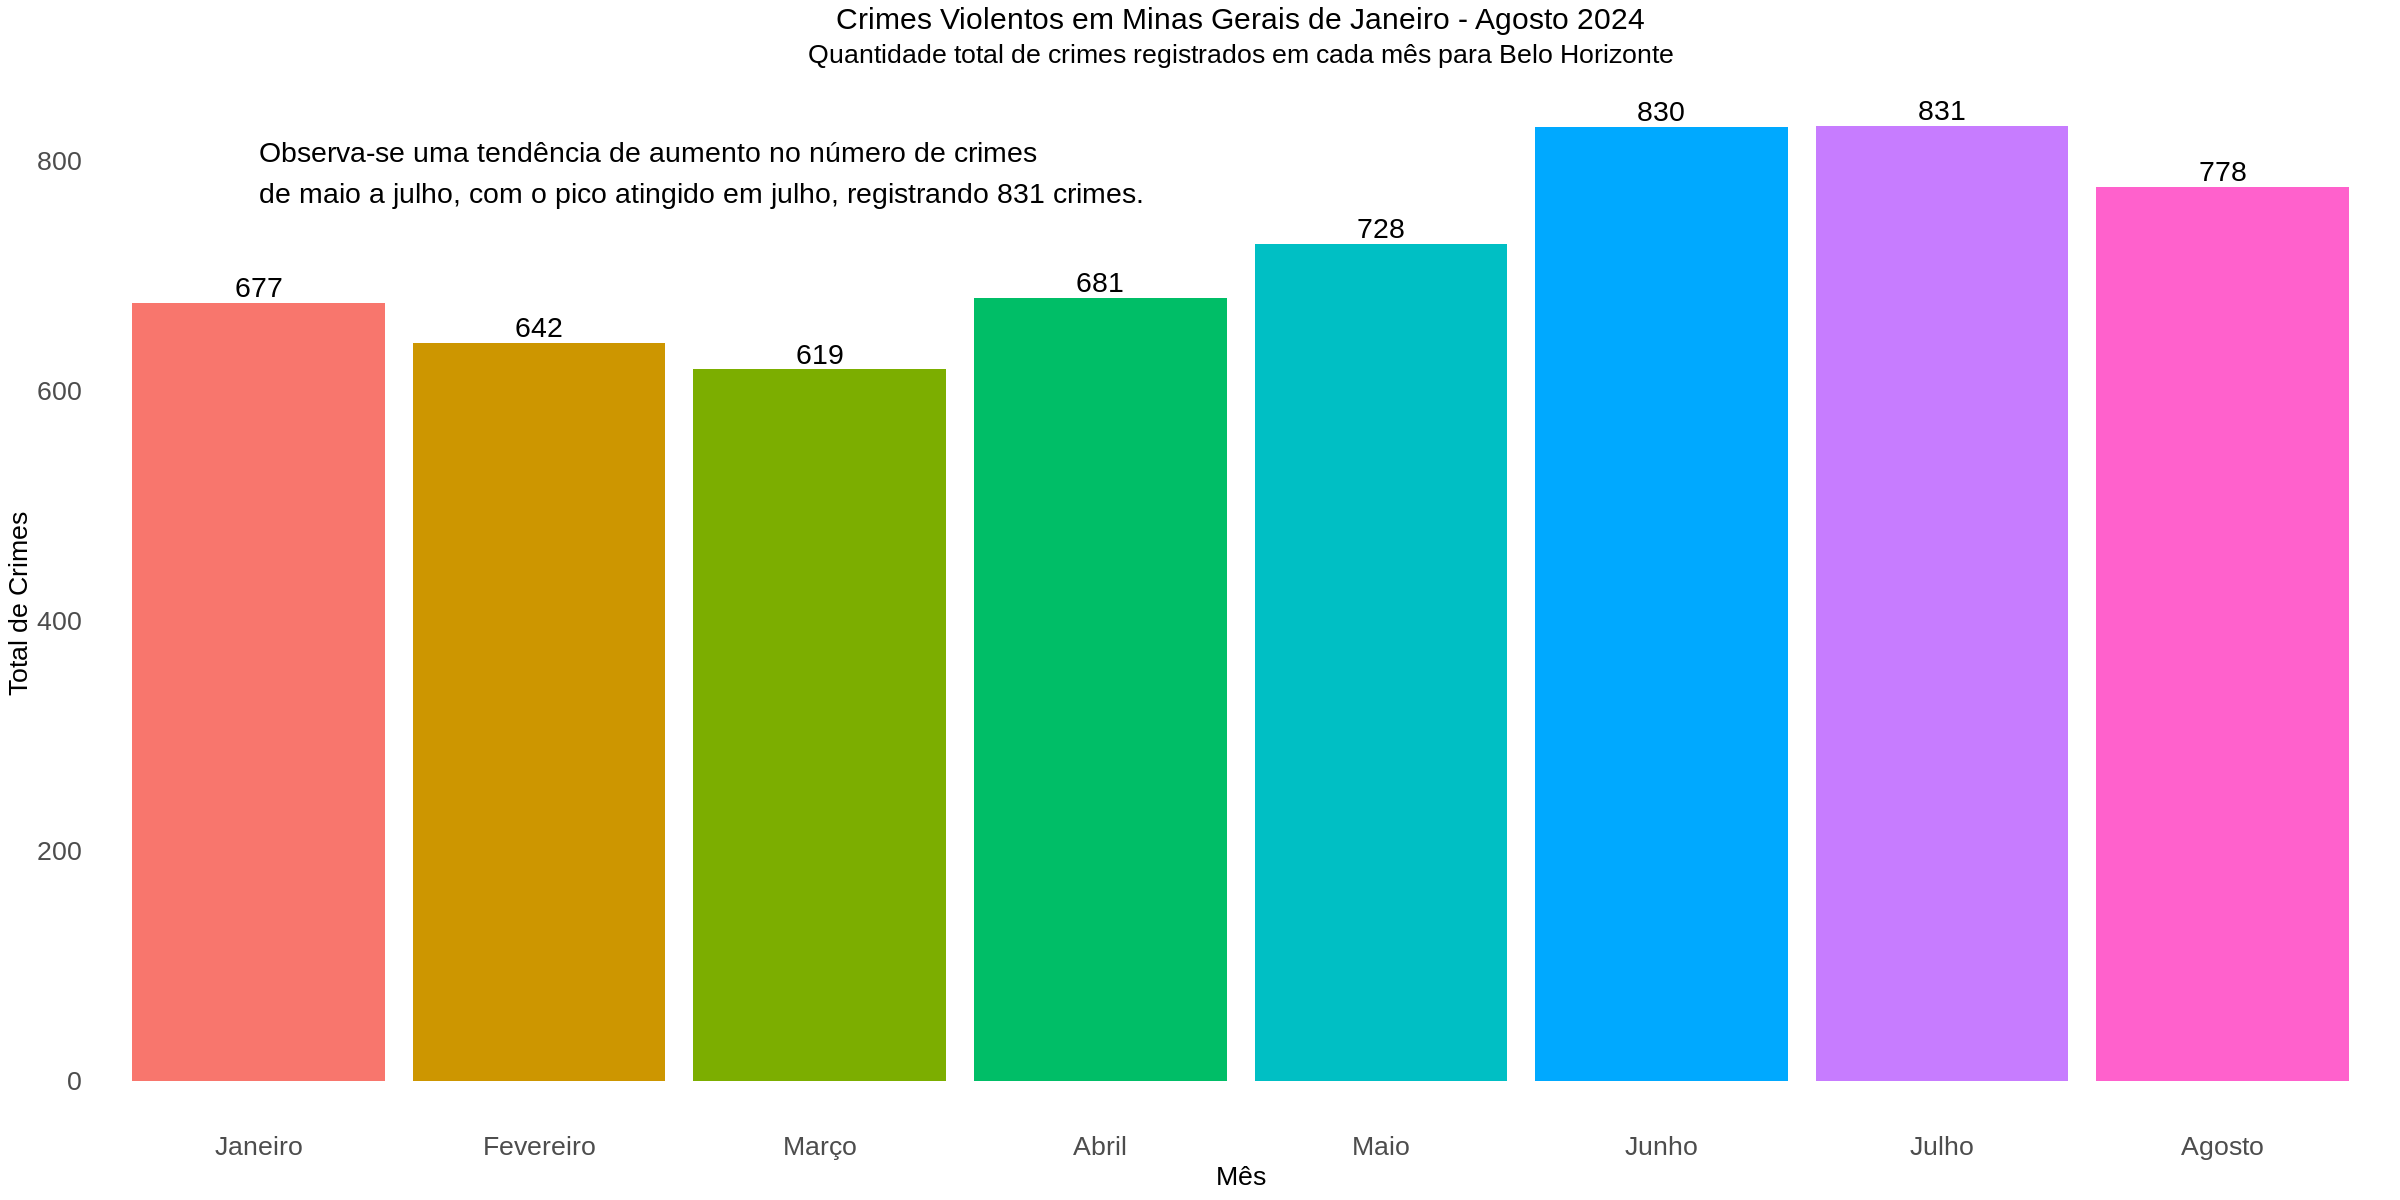

In [16]:
# @title **18 - Quantidade total de crimes por mes em Belo Horizonte**
total_crimes_bh_por_mes <- Base_Dados %>%
  filter(registros > 0, municipio == "BELO HORIZONTE") %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")

options(repr.plot.width = 20, repr.plot.height = 10)


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


total_crimes_bh_por_mes <- total_crimes_bh_por_mes %>%
  mutate(mes = factor(mes, levels = meses_ordem))


ggplot(total_crimes_bh_por_mes, aes(x = mes, y = total_crimes, fill = mes)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes),
            vjust = -0.3, size = 6) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Quantidade total de crimes registrados em cada mês para Belo Horizonte",
    x = "Mês", y = "Total de Crimes"
  ) +
  annotate(
    "text", x = 1, y = max(total_crimes_bh_por_mes$total_crimes) * 0.95,
    label = "Observa-se uma tendência de aumento no número de crimes\nde maio a julho, com o pico atingido em julho, registrando 831 crimes.",
    color = "black", size = 6, hjust = 0
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none")


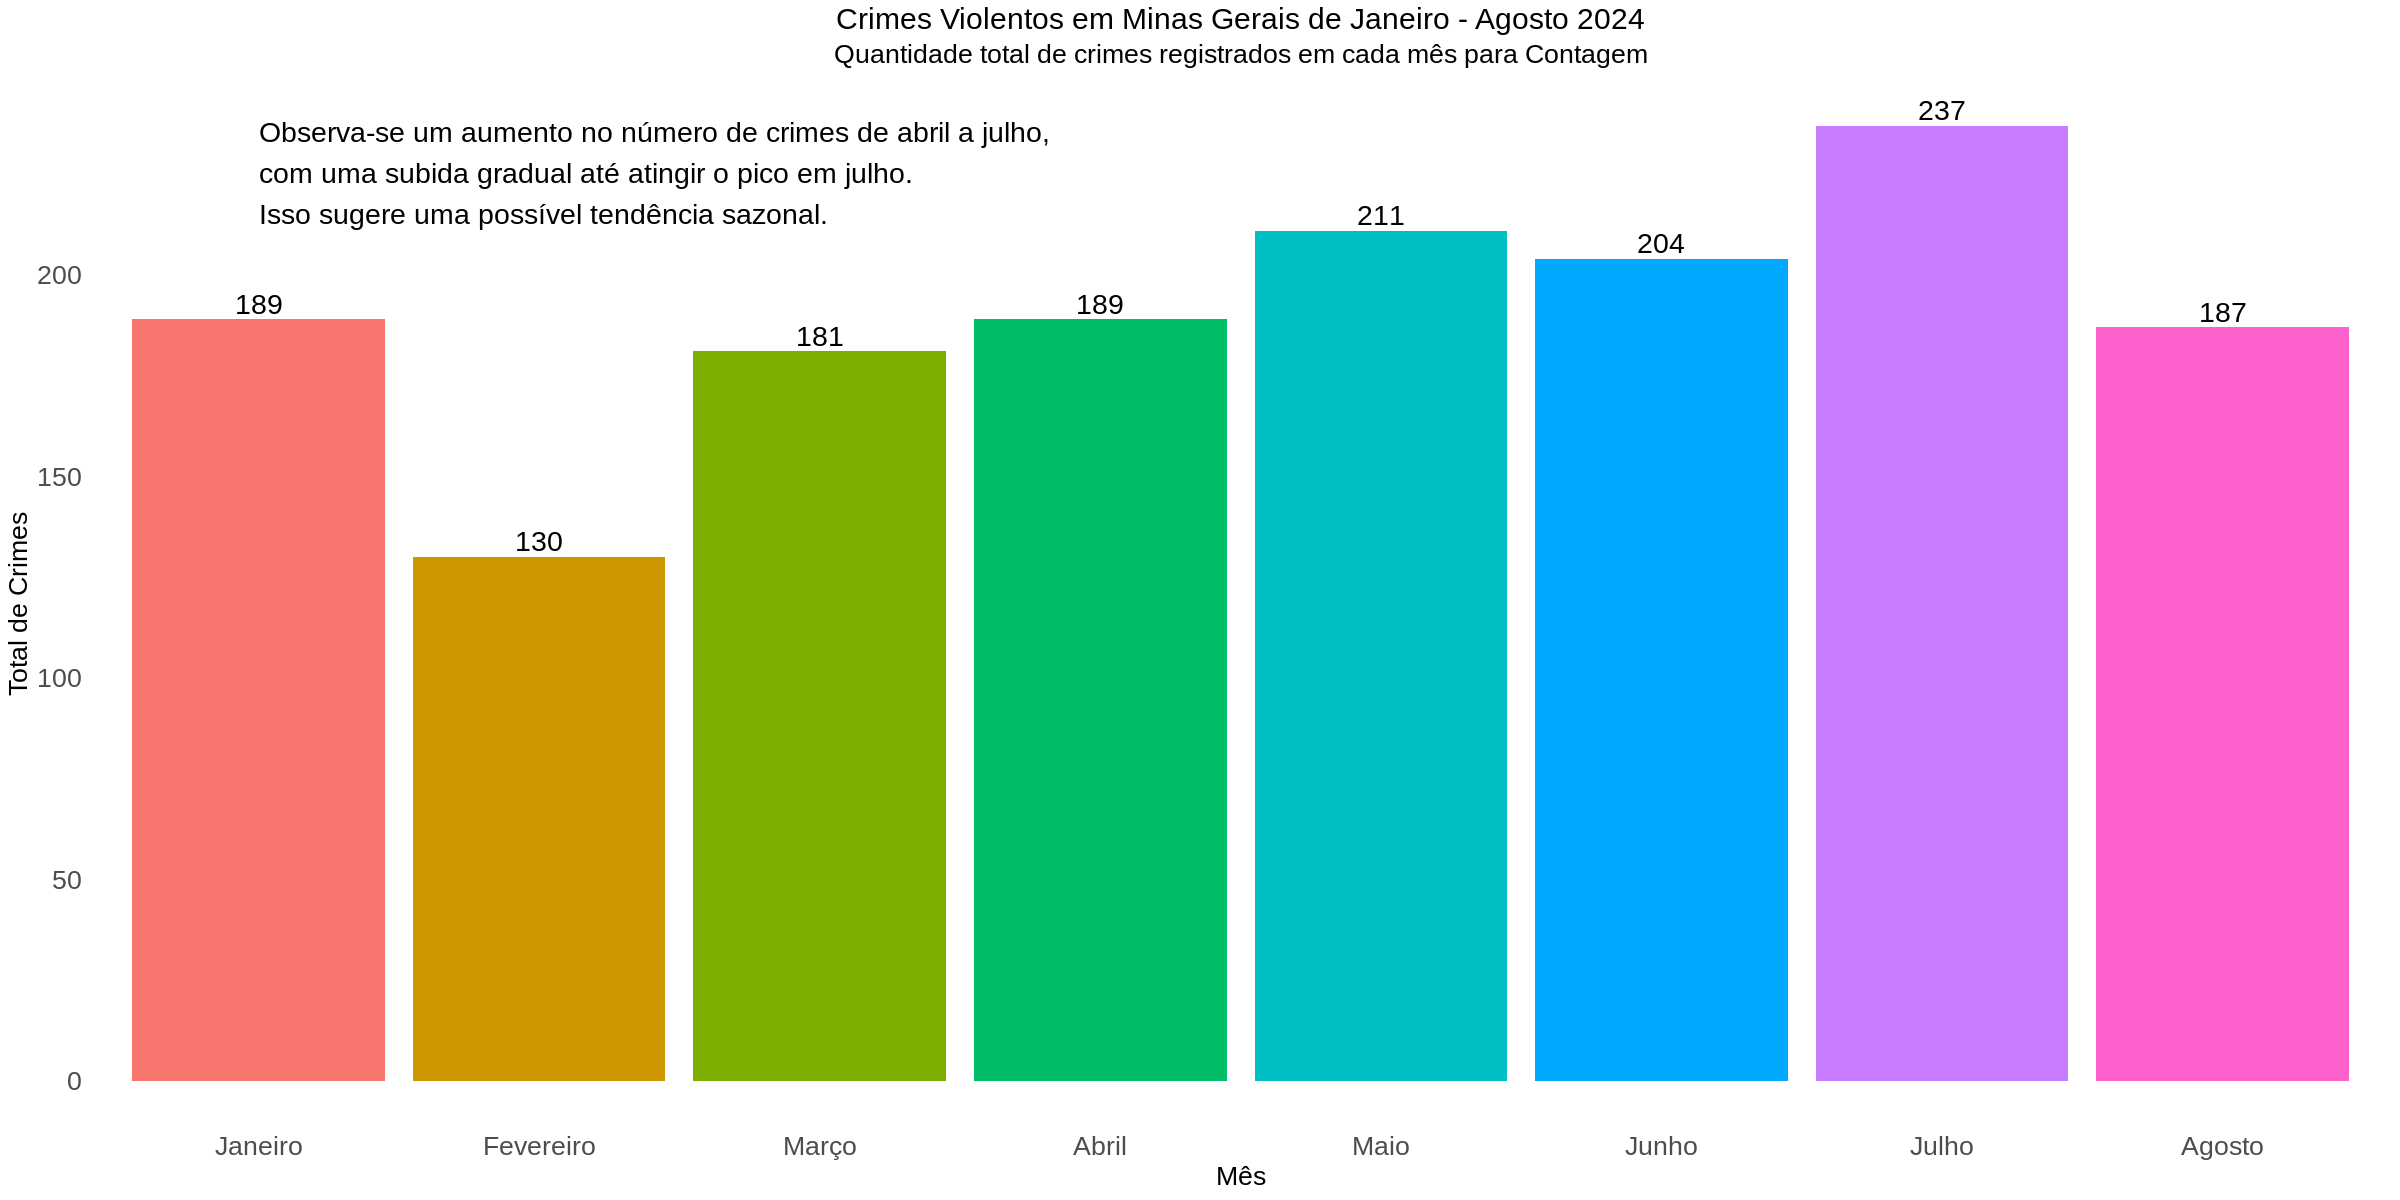

In [17]:
# @title **19 - Quantidade total de crimes por mes em Contagem**
options(repr.plot.width = 20, repr.plot.height = 10)


total_crimes_contagem_por_mes <- Base_Dados %>%
  filter(registros > 0, ano == 2024, municipio == "CONTAGEM") %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


total_crimes_contagem_por_mes <- total_crimes_contagem_por_mes %>%
  mutate(mes = factor(mes, levels = meses_ordem))


mes_maior_crime_contagem <- total_crimes_contagem_por_mes %>%
  filter(total_crimes == max(total_crimes)) %>%
  select(mes, total_crimes)


ggplot(total_crimes_contagem_por_mes, aes(x = mes, y = total_crimes, fill = mes)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes),
            vjust = -0.3, size = 6) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Quantidade total de crimes registrados em cada mês para Contagem",
    x = "Mês", y = "Total de Crimes"
  ) +
  annotate(
    "text", x = 1, y = max(total_crimes_contagem_por_mes$total_crimes) * 0.95,
    label = "Observa-se um aumento no número de crimes de abril a julho,\ncom uma subida gradual até atingir o pico em julho.\nIsso sugere uma possível tendência sazonal.",
    color = "black", size = 6, hjust = 0
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none")

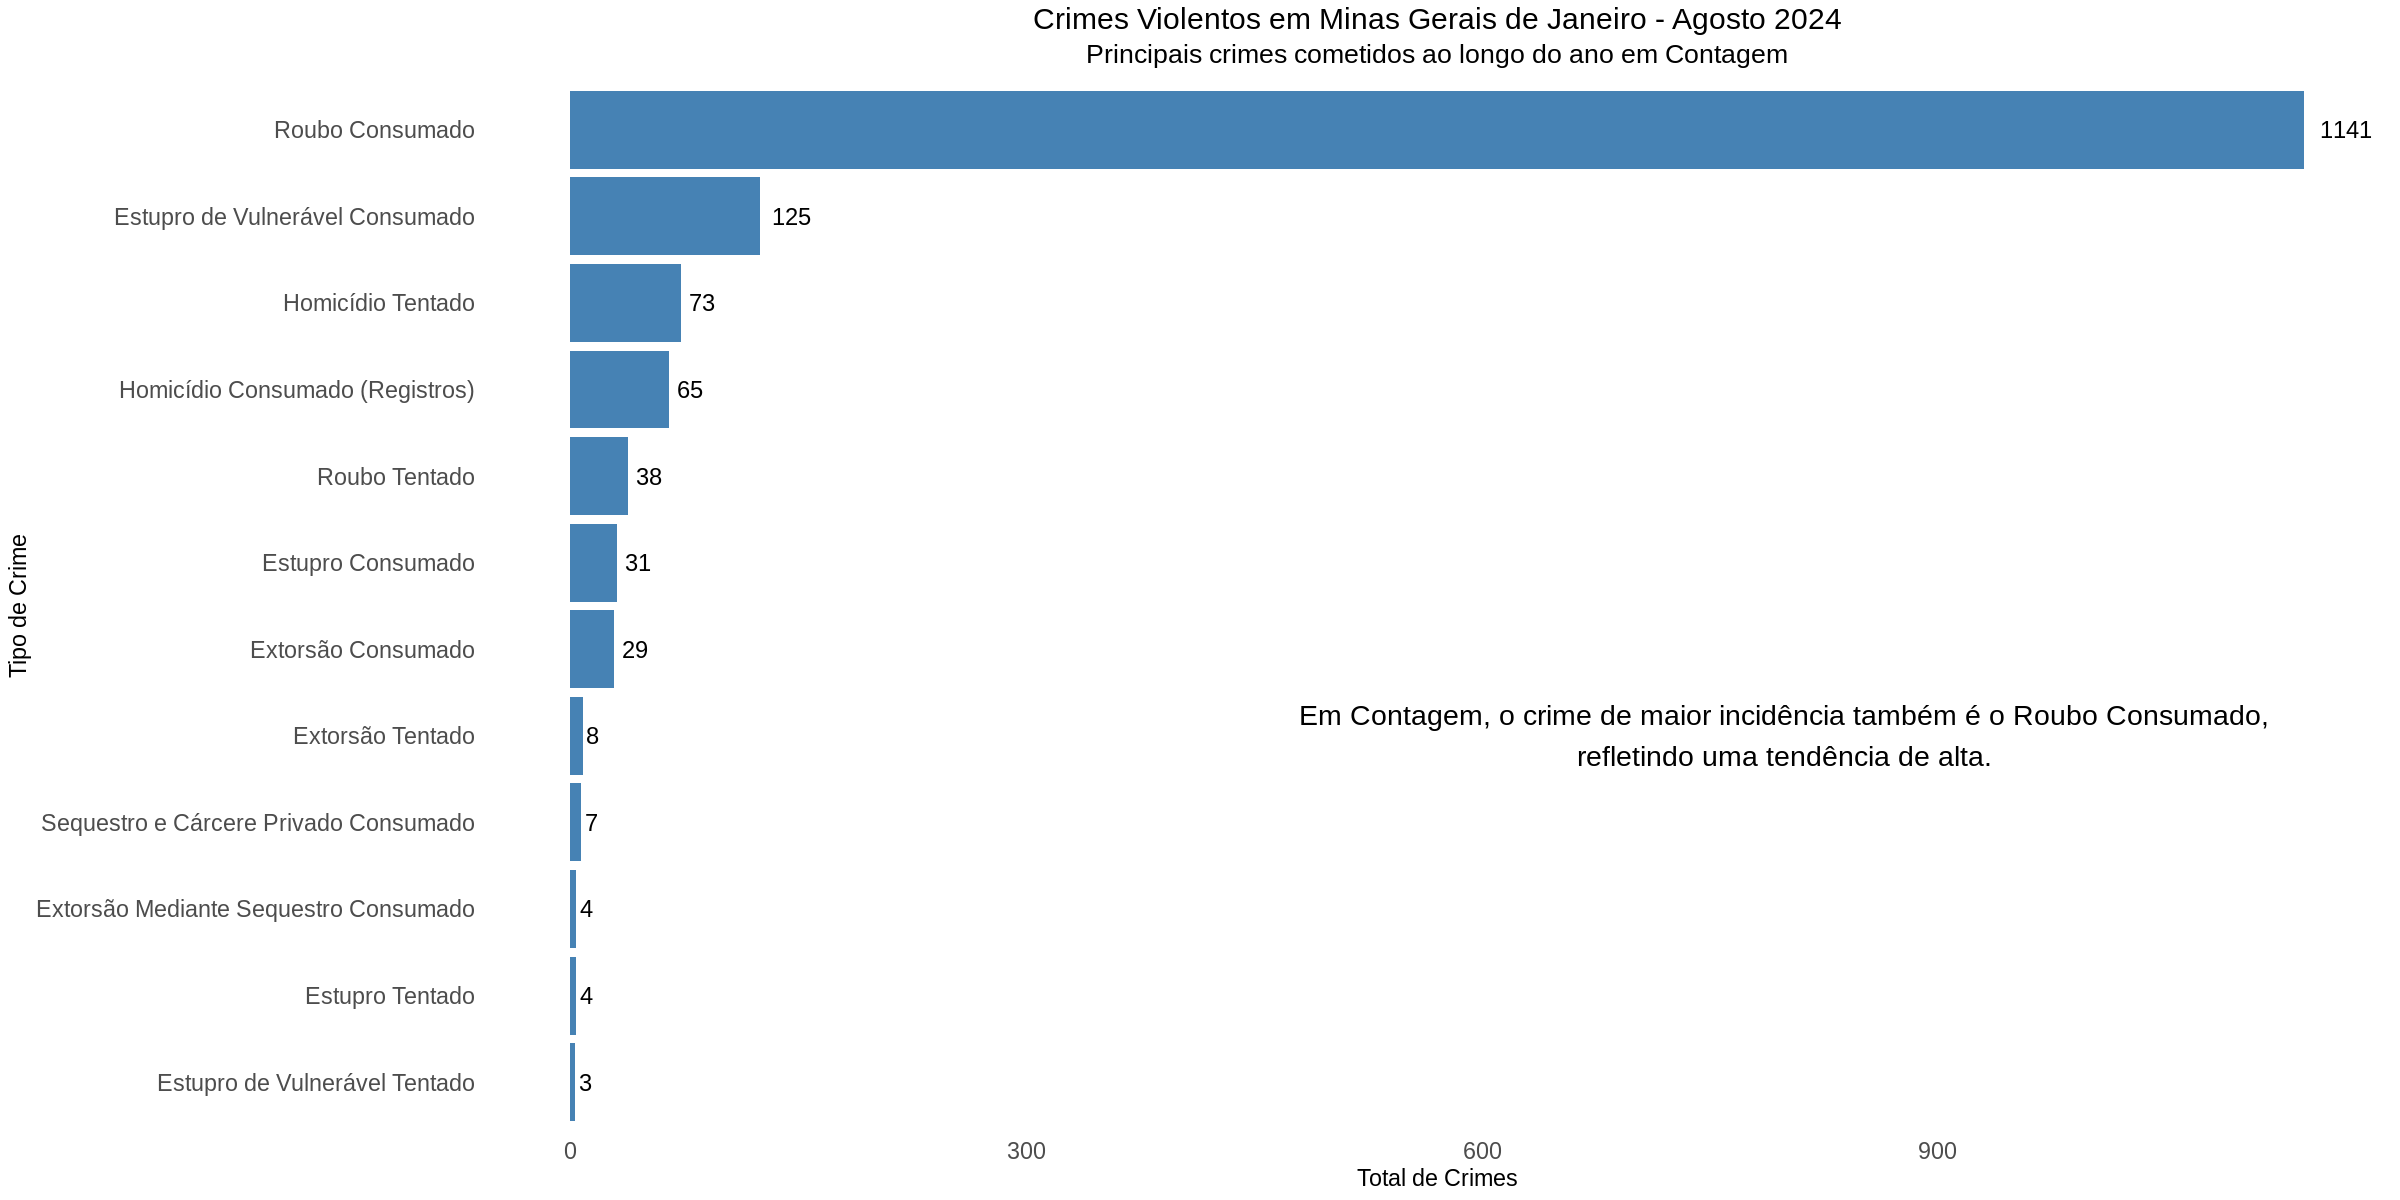

In [18]:
# @title **20 - Crimes predominantes em Contagem**
crimes_mais_comuns_contagem <- Base_Dados %>%
  filter(registros > 0, municipio == "CONTAGEM") %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes))


options(repr.plot.width = 20, repr.plot.height = 10)


ggplot(crimes_mais_comuns_contagem, aes(x = reorder(natureza, total_crimes), y = total_crimes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Principais crimes cometidos ao longo do ano em Contagem",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +

  annotate(
    "text", x = 5, y = max(crimes_mais_comuns_contagem$total_crimes) * 0.7,
    label = "Em Contagem, o crime de maior incidência também é o Roubo Consumado,\nrefletindo uma tendência de alta.",
    color = "black", size = 6, hjust = 0.5
  )

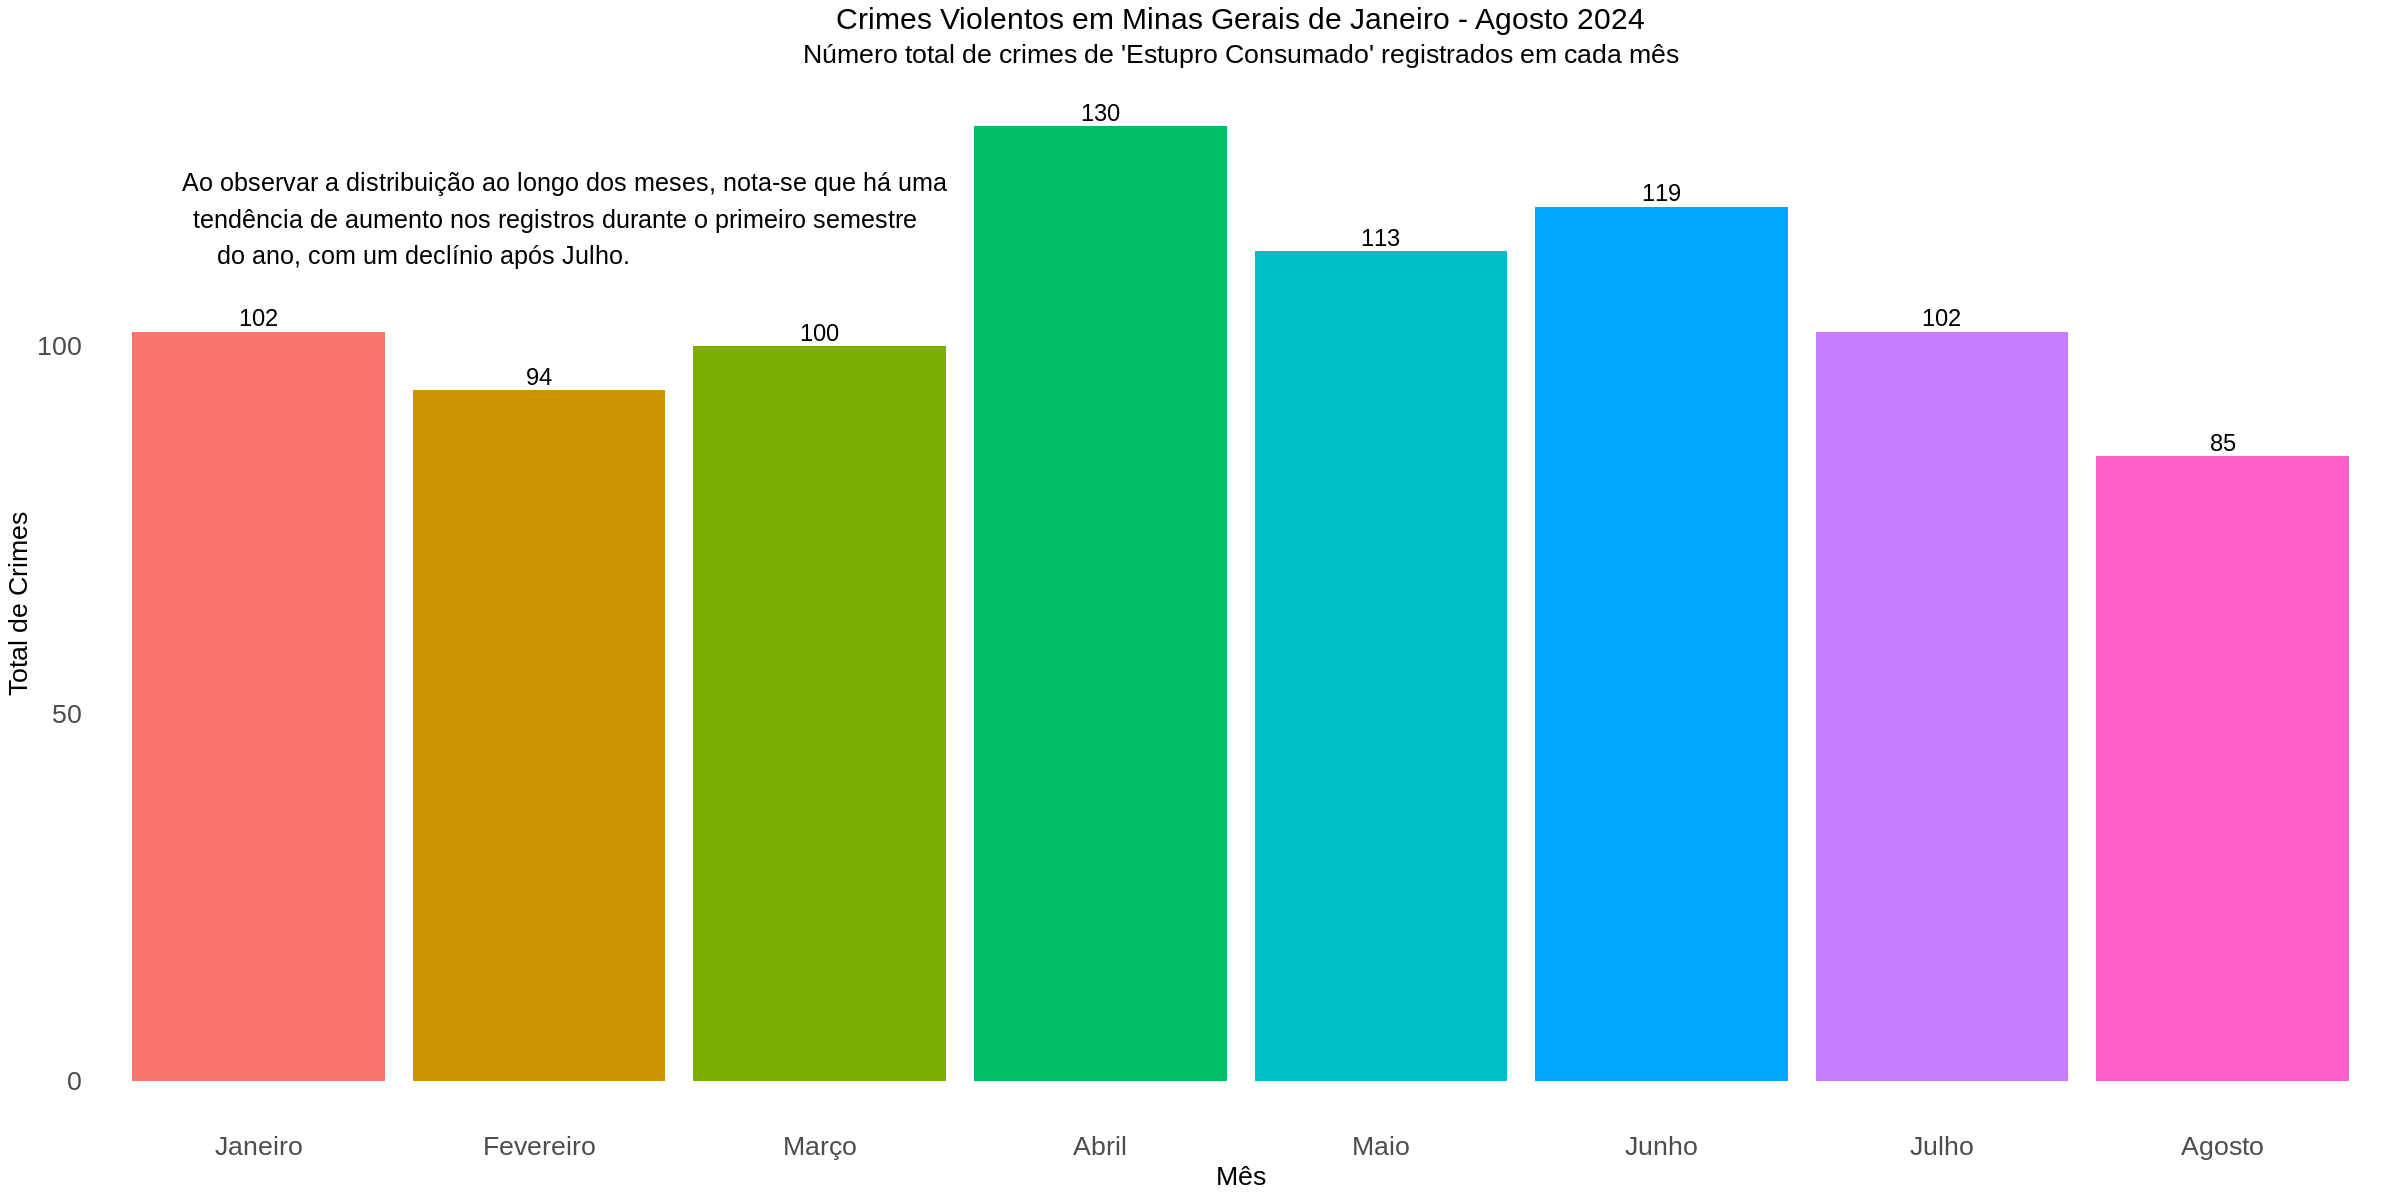

In [19]:
# @title **21 - Total de crimes de Estrupo Consumado em cada mes**
estupro_consumado_mensal <- Base_Dados %>%
  filter(registros > 0, natureza == "Estupro Consumado") %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


estupro_consumado_mensal <- estupro_consumado_mensal %>%
  mutate(mes = factor(mes, levels = meses_ordem))


options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(estupro_consumado_mensal, aes(x = mes, y = total_crimes, fill = mes)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes),
            vjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Número total de crimes de 'Estupro Consumado' registrados em cada mês",
    x = "Mês", y = "Total de Crimes"
  ) +

  annotate(
    "text", x = 1, y = max(estupro_consumado_mensal$total_crimes) * 0.95,
    label = "Ao observar a distribuição ao longo dos meses, nota-se que há uma\n tendência de aumento nos registros durante o primeiro semestre\ndo ano, com um declínio após Julho.",
    color = "black", size = 5.3, hjust = 0.1, vjust = 1
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none")


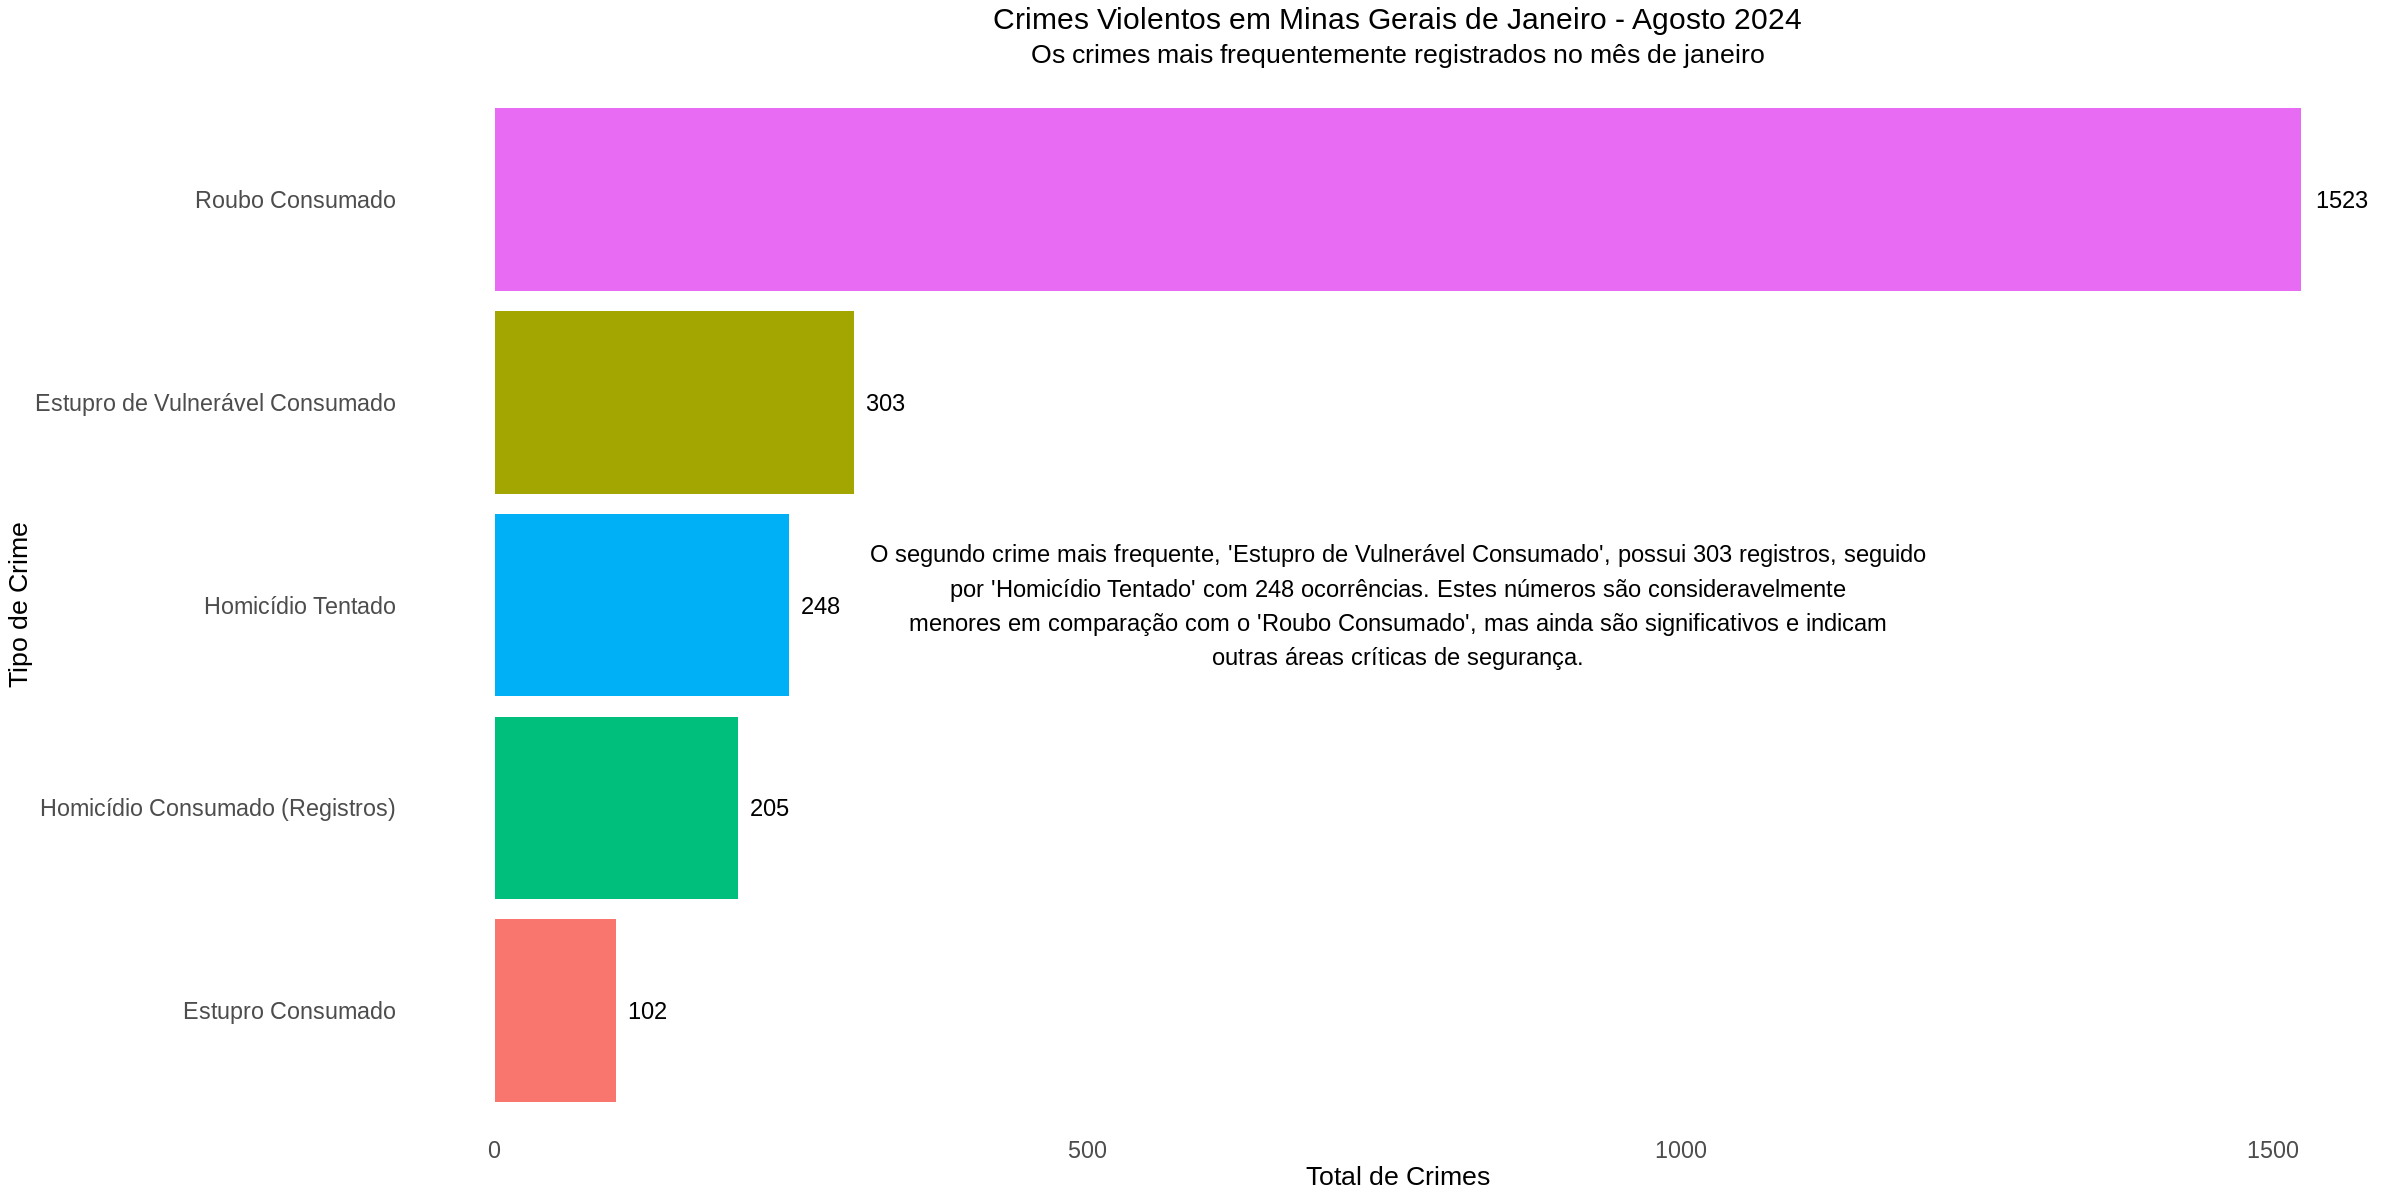

In [20]:
# @title **22 - Crimes mais frequentes em Janeiro**
top5_crimes_jan2024 <- Base_Dados %>%
  filter(mes == "Janeiro", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_jan2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de janeiro",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text",
    x = 3,
    y = max(top5_crimes_jan2024$total_crimes) / 2,
    label = "O segundo crime mais frequente, 'Estupro de Vulnerável Consumado', possui 303 registros, seguido\npor 'Homicídio Tentado' com 248 ocorrências. Estes números são consideravelmente\nmenores em comparação com o 'Roubo Consumado', mas ainda são significativos e indicam\noutras áreas críticas de segurança.",
    color = "black", size = 5, hjust = 0.5
  )


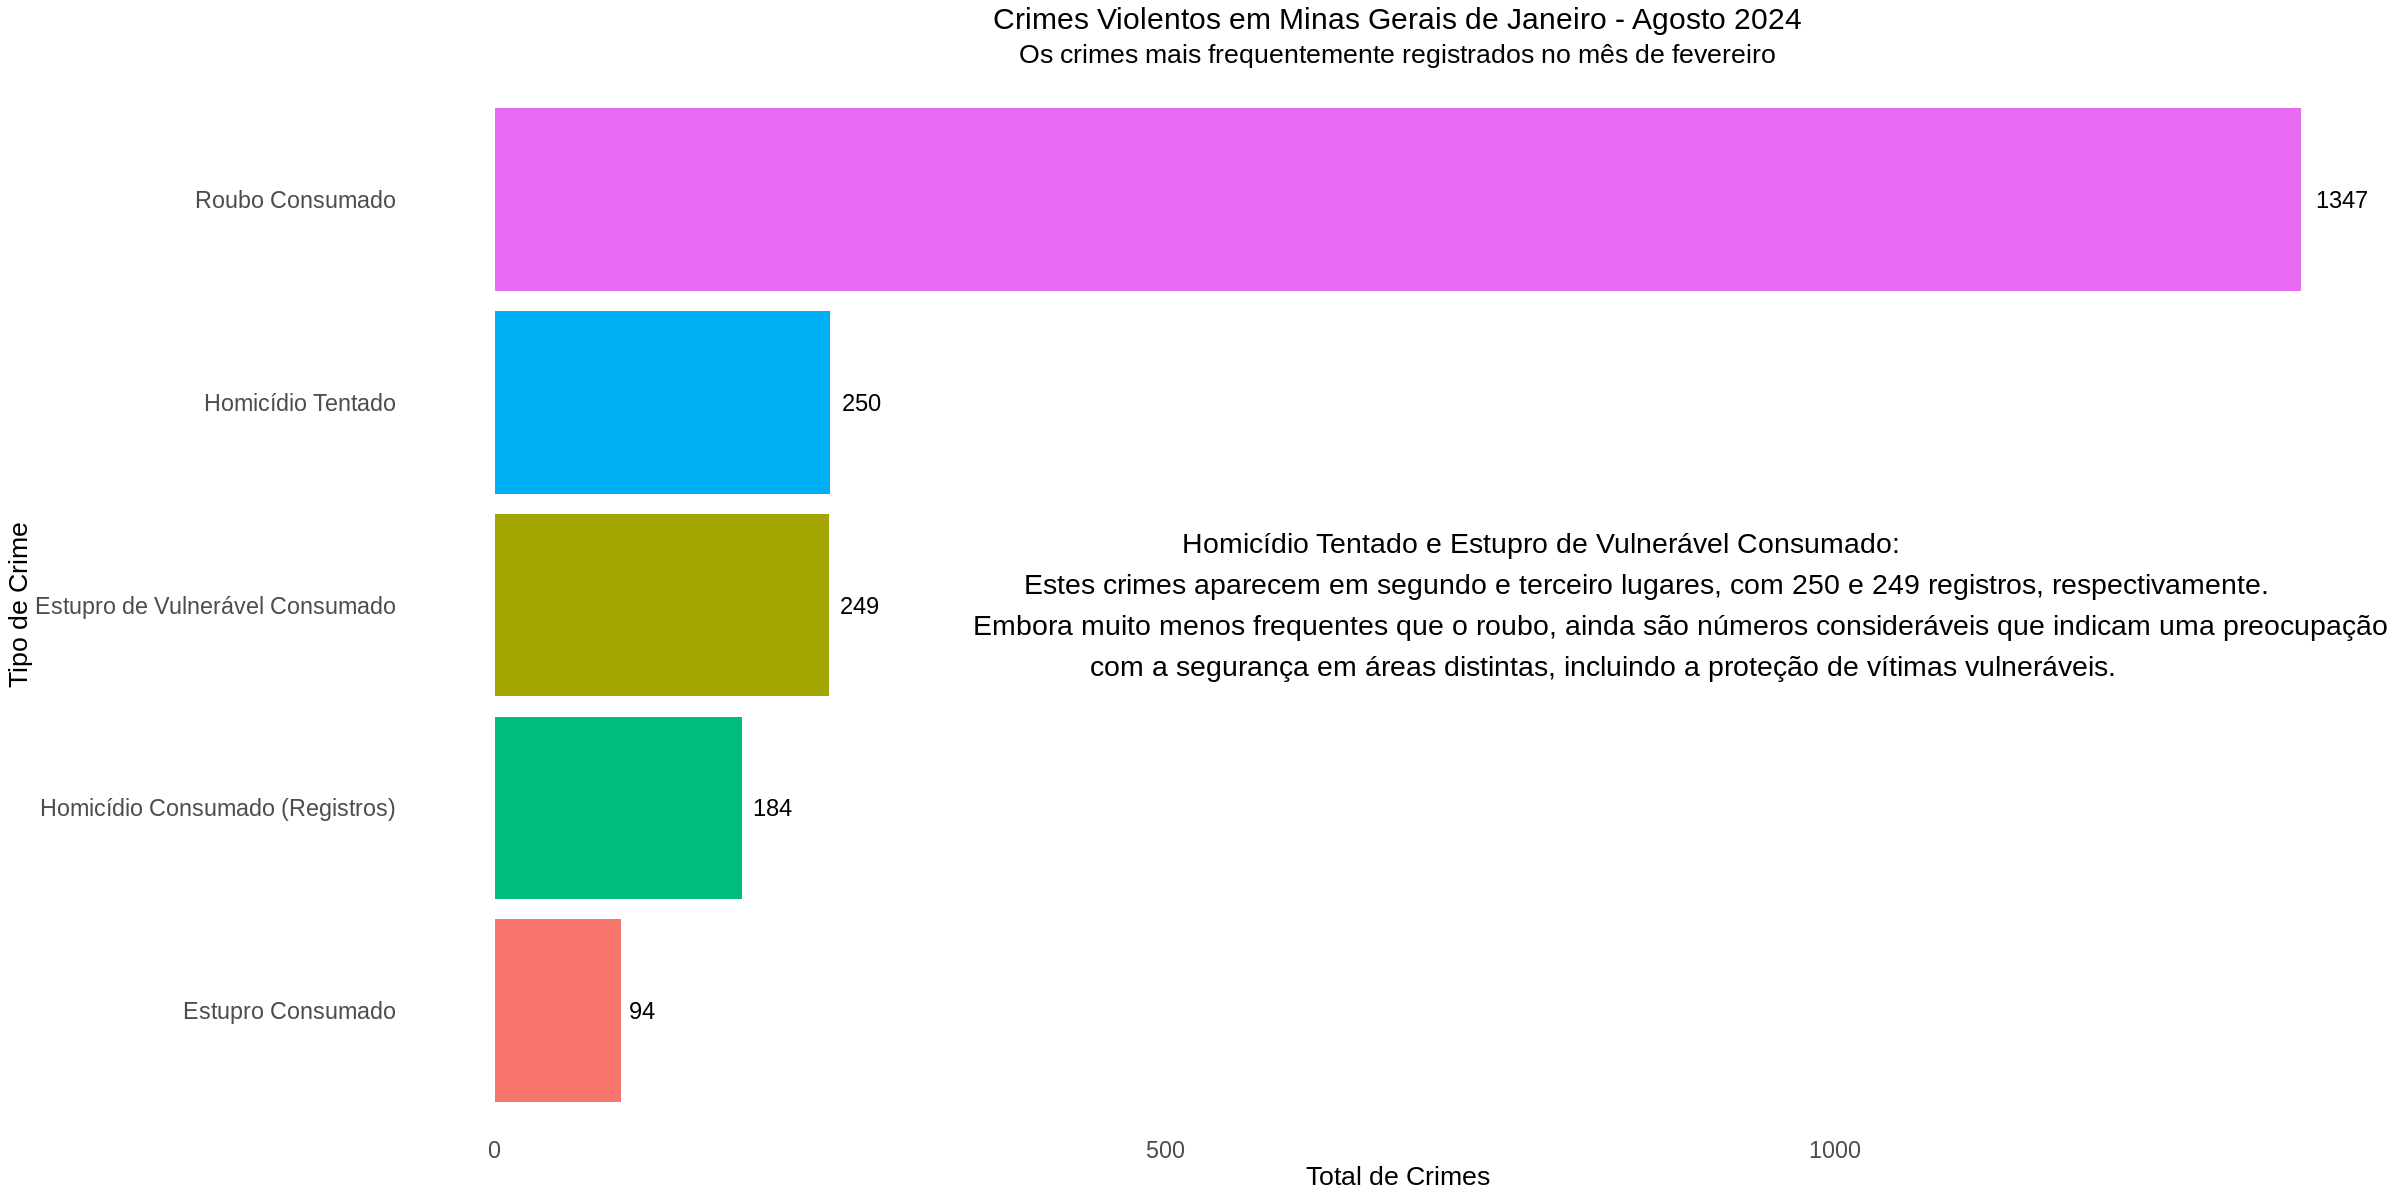

In [21]:
# @title **23 - Crimes mais frequentes em Fevereiro**
top5_crimes_fev2024 <- Base_Dados %>%
  filter(mes == "Fevereiro", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)


options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_fev2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de fevereiro",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_fev2024$total_crimes) / 2,
    label = "Homicídio Tentado e Estupro de Vulnerável Consumado:\nEstes crimes aparecem em segundo e terceiro lugares, com 250 e 249 registros, respectivamente.\nEmbora muito menos frequentes que o roubo, ainda são números consideráveis que indicam uma preocupação\ncom a segurança em áreas distintas, incluindo a proteção de vítimas vulneráveis.",
    color = "black", size = 6, hjust = 0.3
  )


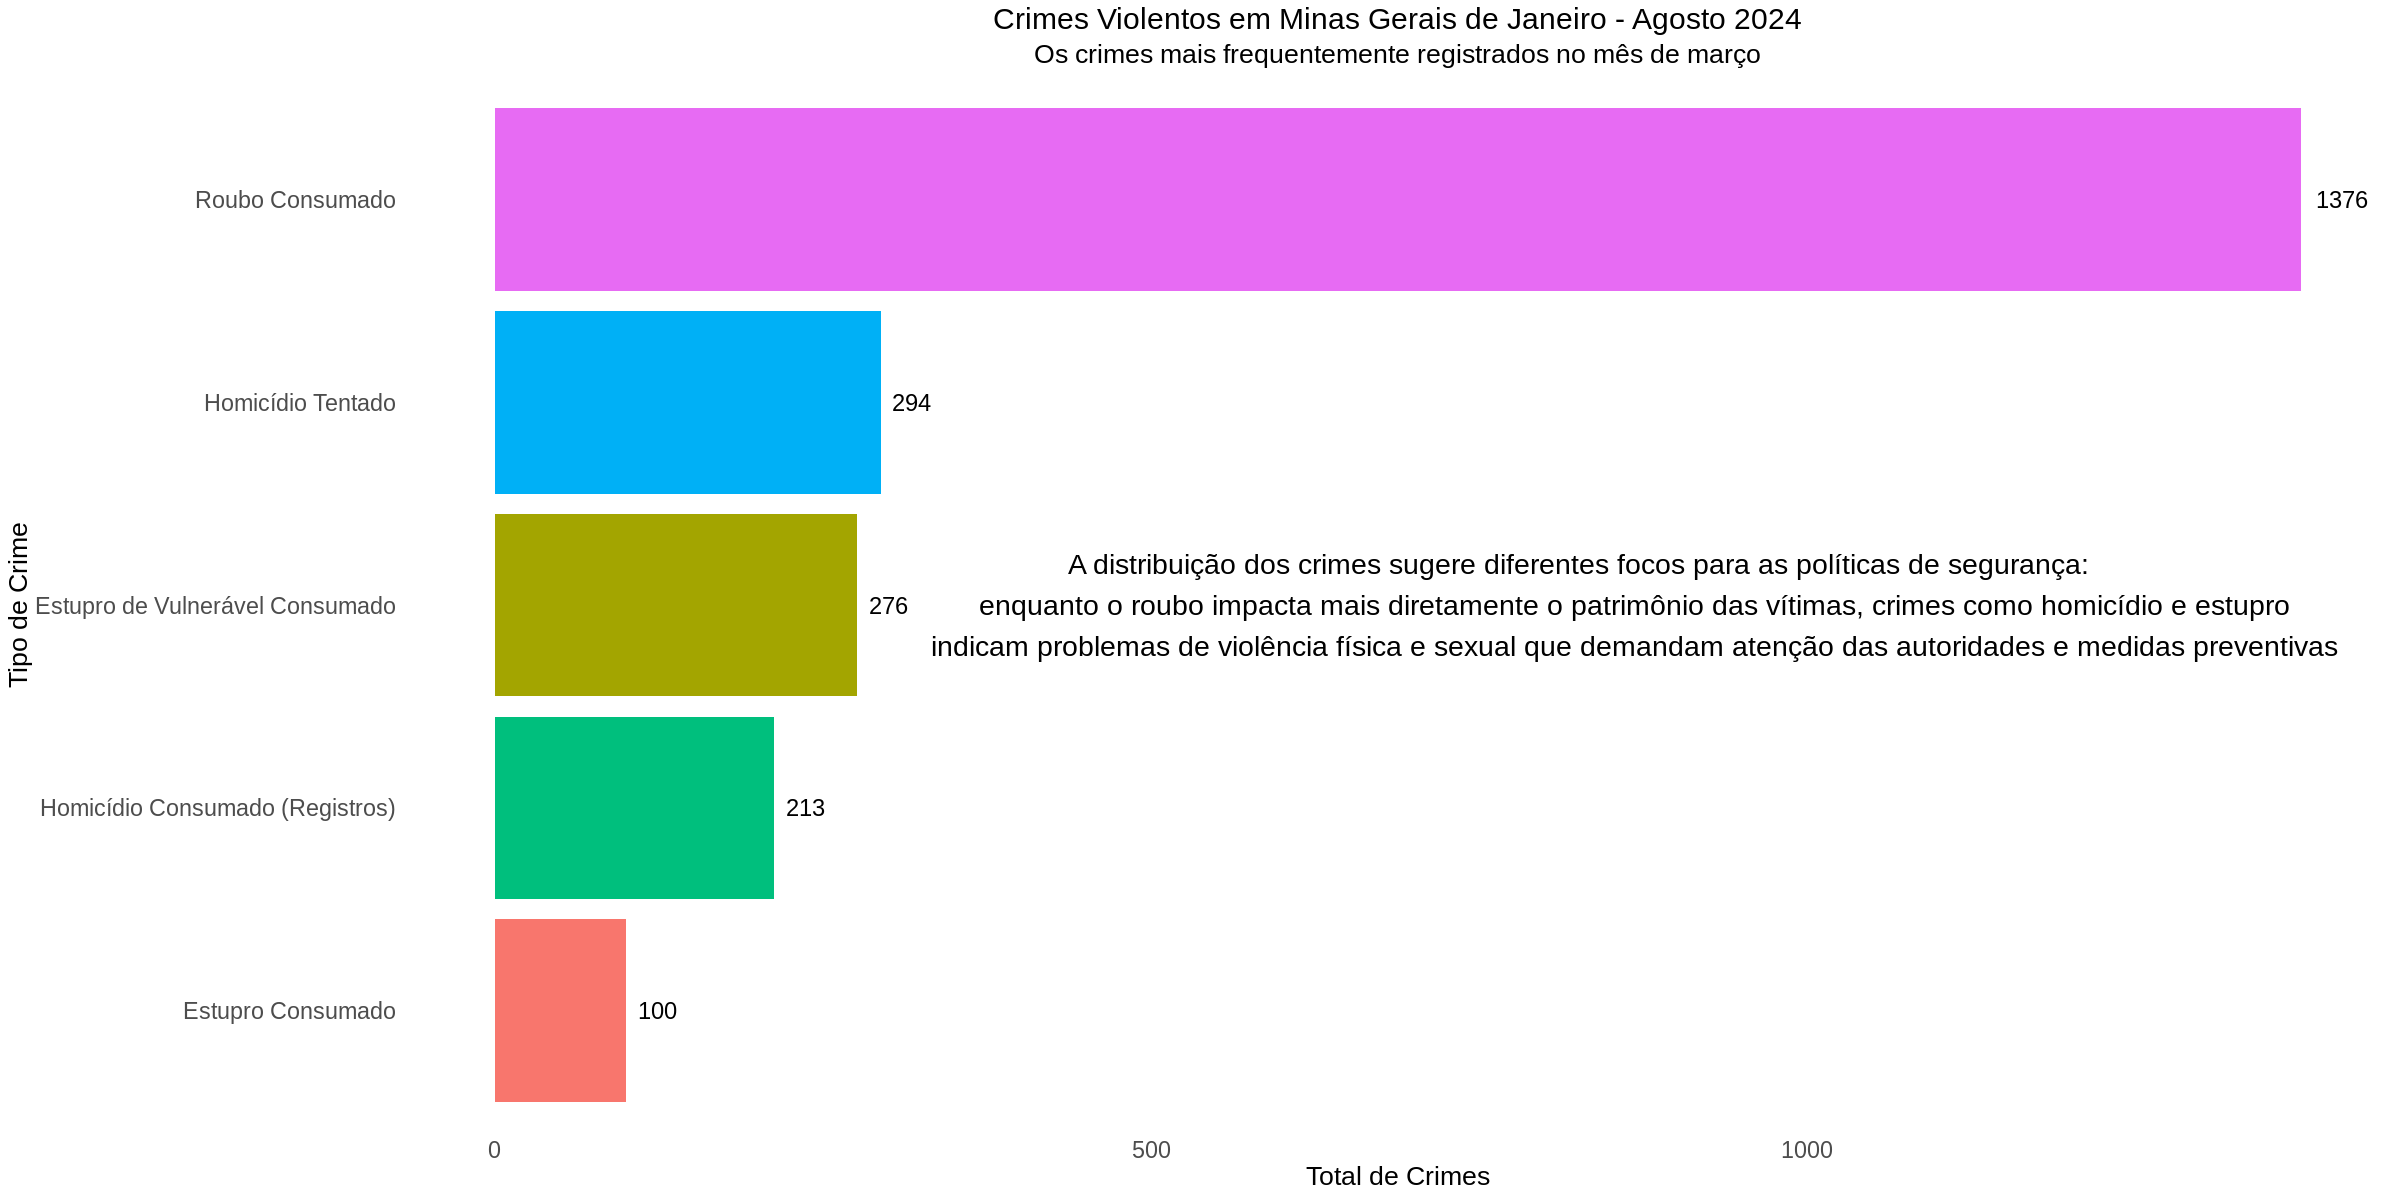

In [22]:
# @title **24 - Crimes mais frequentes em Março**
top5_crimes_mar2024 <- Base_Dados %>%
  filter(mes == "Março", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_mar2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de março",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_mar2024$total_crimes) * 0.6,
    label = "A distribuição dos crimes sugere diferentes focos para as políticas de segurança:
              enquanto o roubo impacta mais diretamente o patrimônio das vítimas, crimes como homicídio e estupro
              indicam problemas de violência física e sexual que demandam atenção das autoridades e medidas preventivas",
    color = "black", size = 6, hjust = 0.5
  )


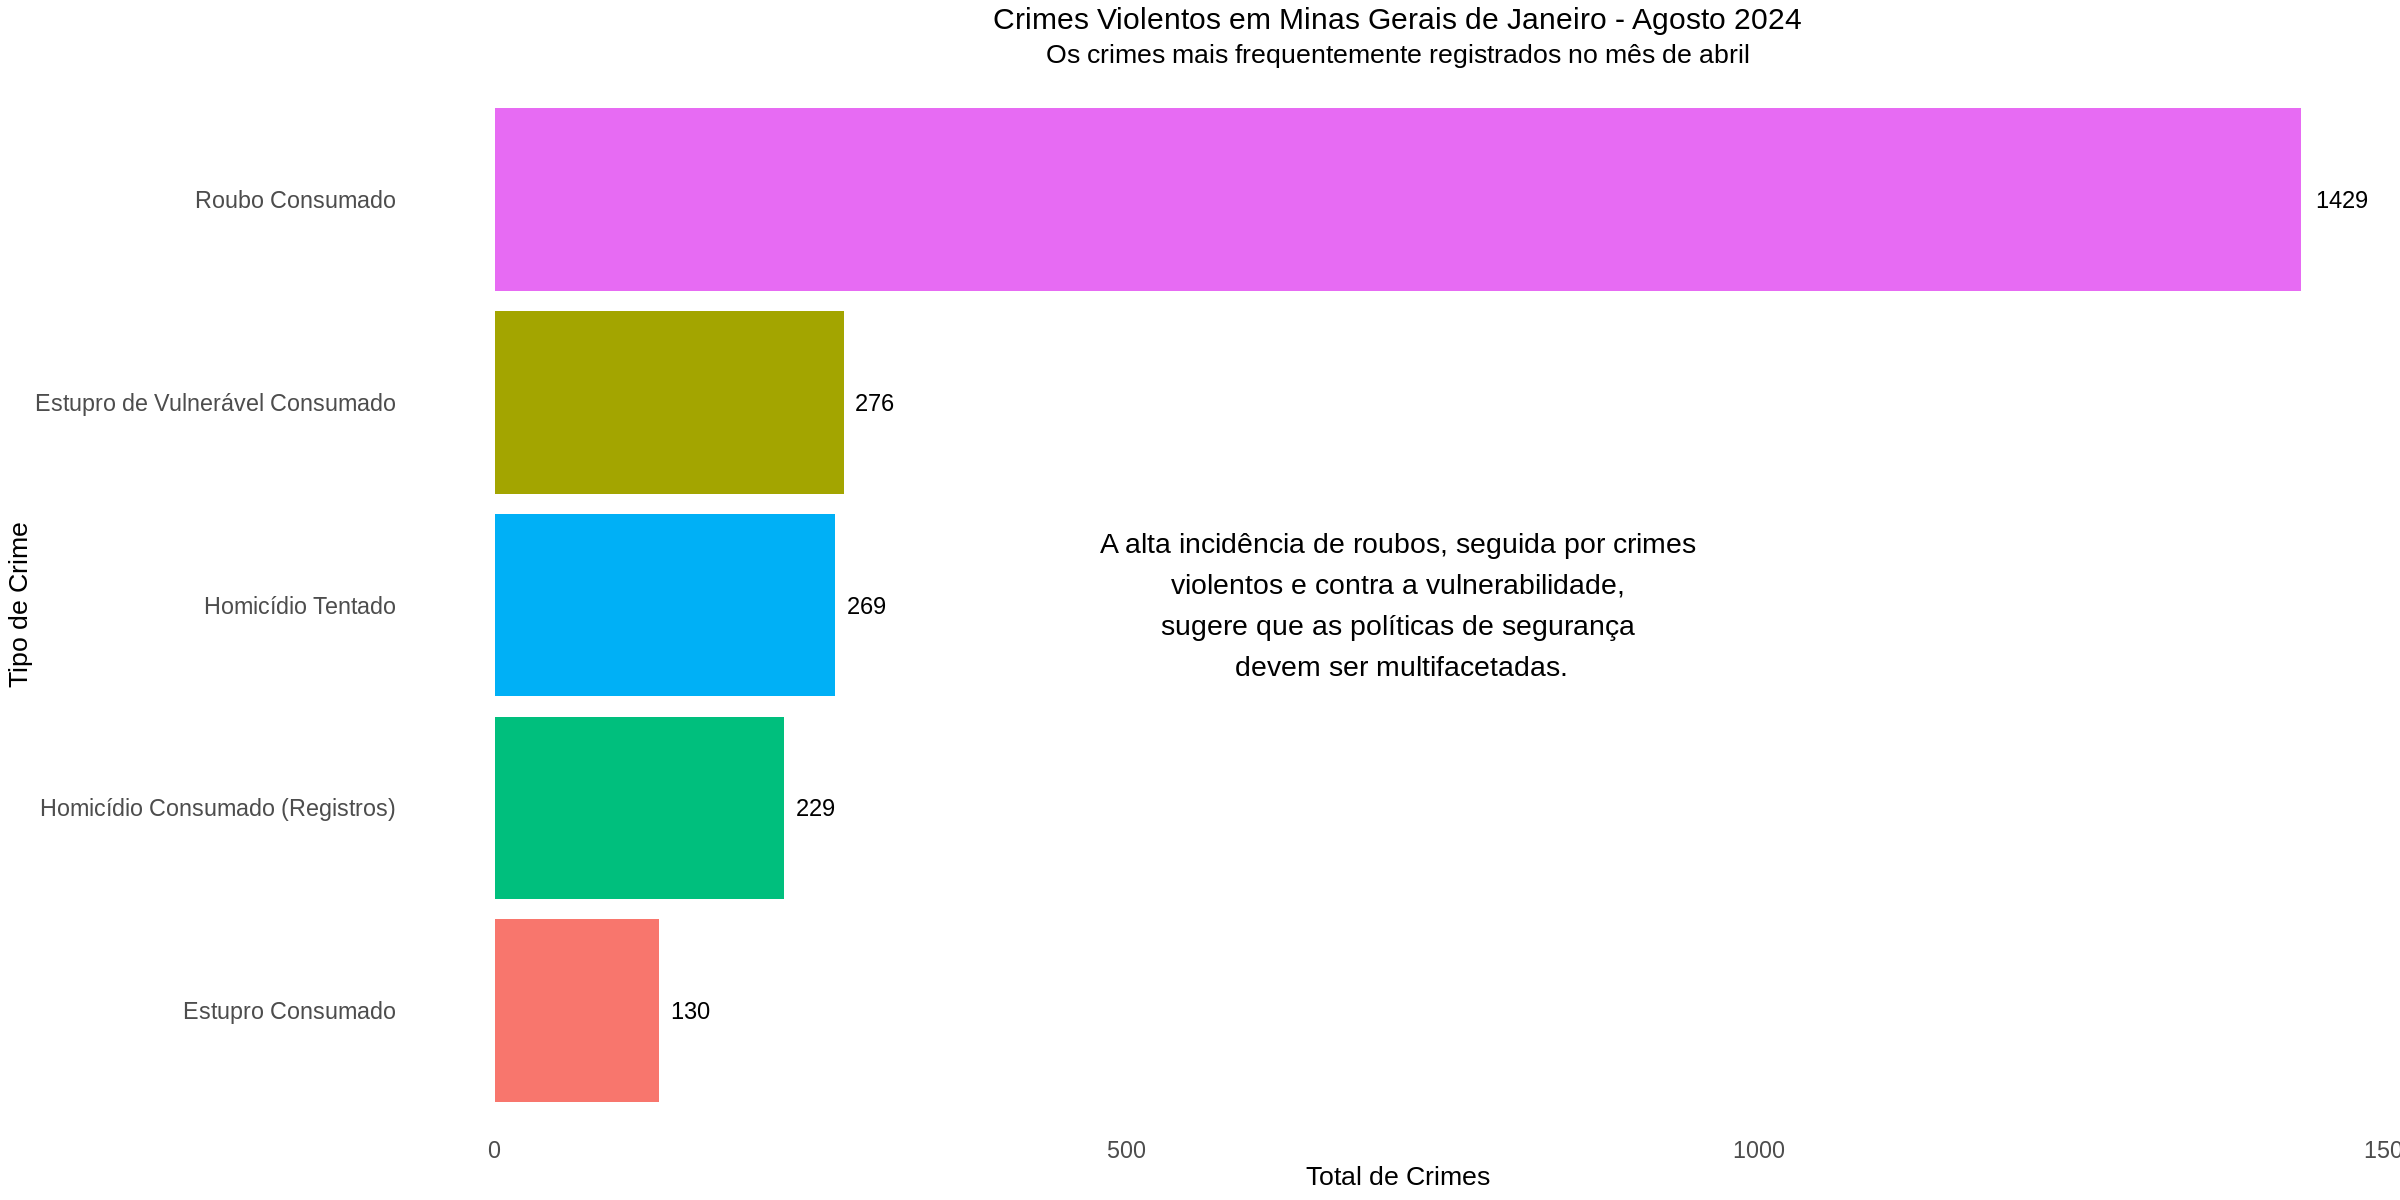

In [23]:
# @title **25 - Crimes mais frequentes em Abril**
top5_crimes_jan2024 <- Base_Dados %>%
  filter(mes == "Abril", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_jan2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de abril",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_jan2024$total_crimes) / 2,
    label = "A alta incidência de roubos, seguida por crimes\nviolentos e contra a vulnerabilidade,\nsugere que as políticas de segurança\n devem ser multifacetadas.",
    color = "black", size = 6, hjust = 0.5
  )


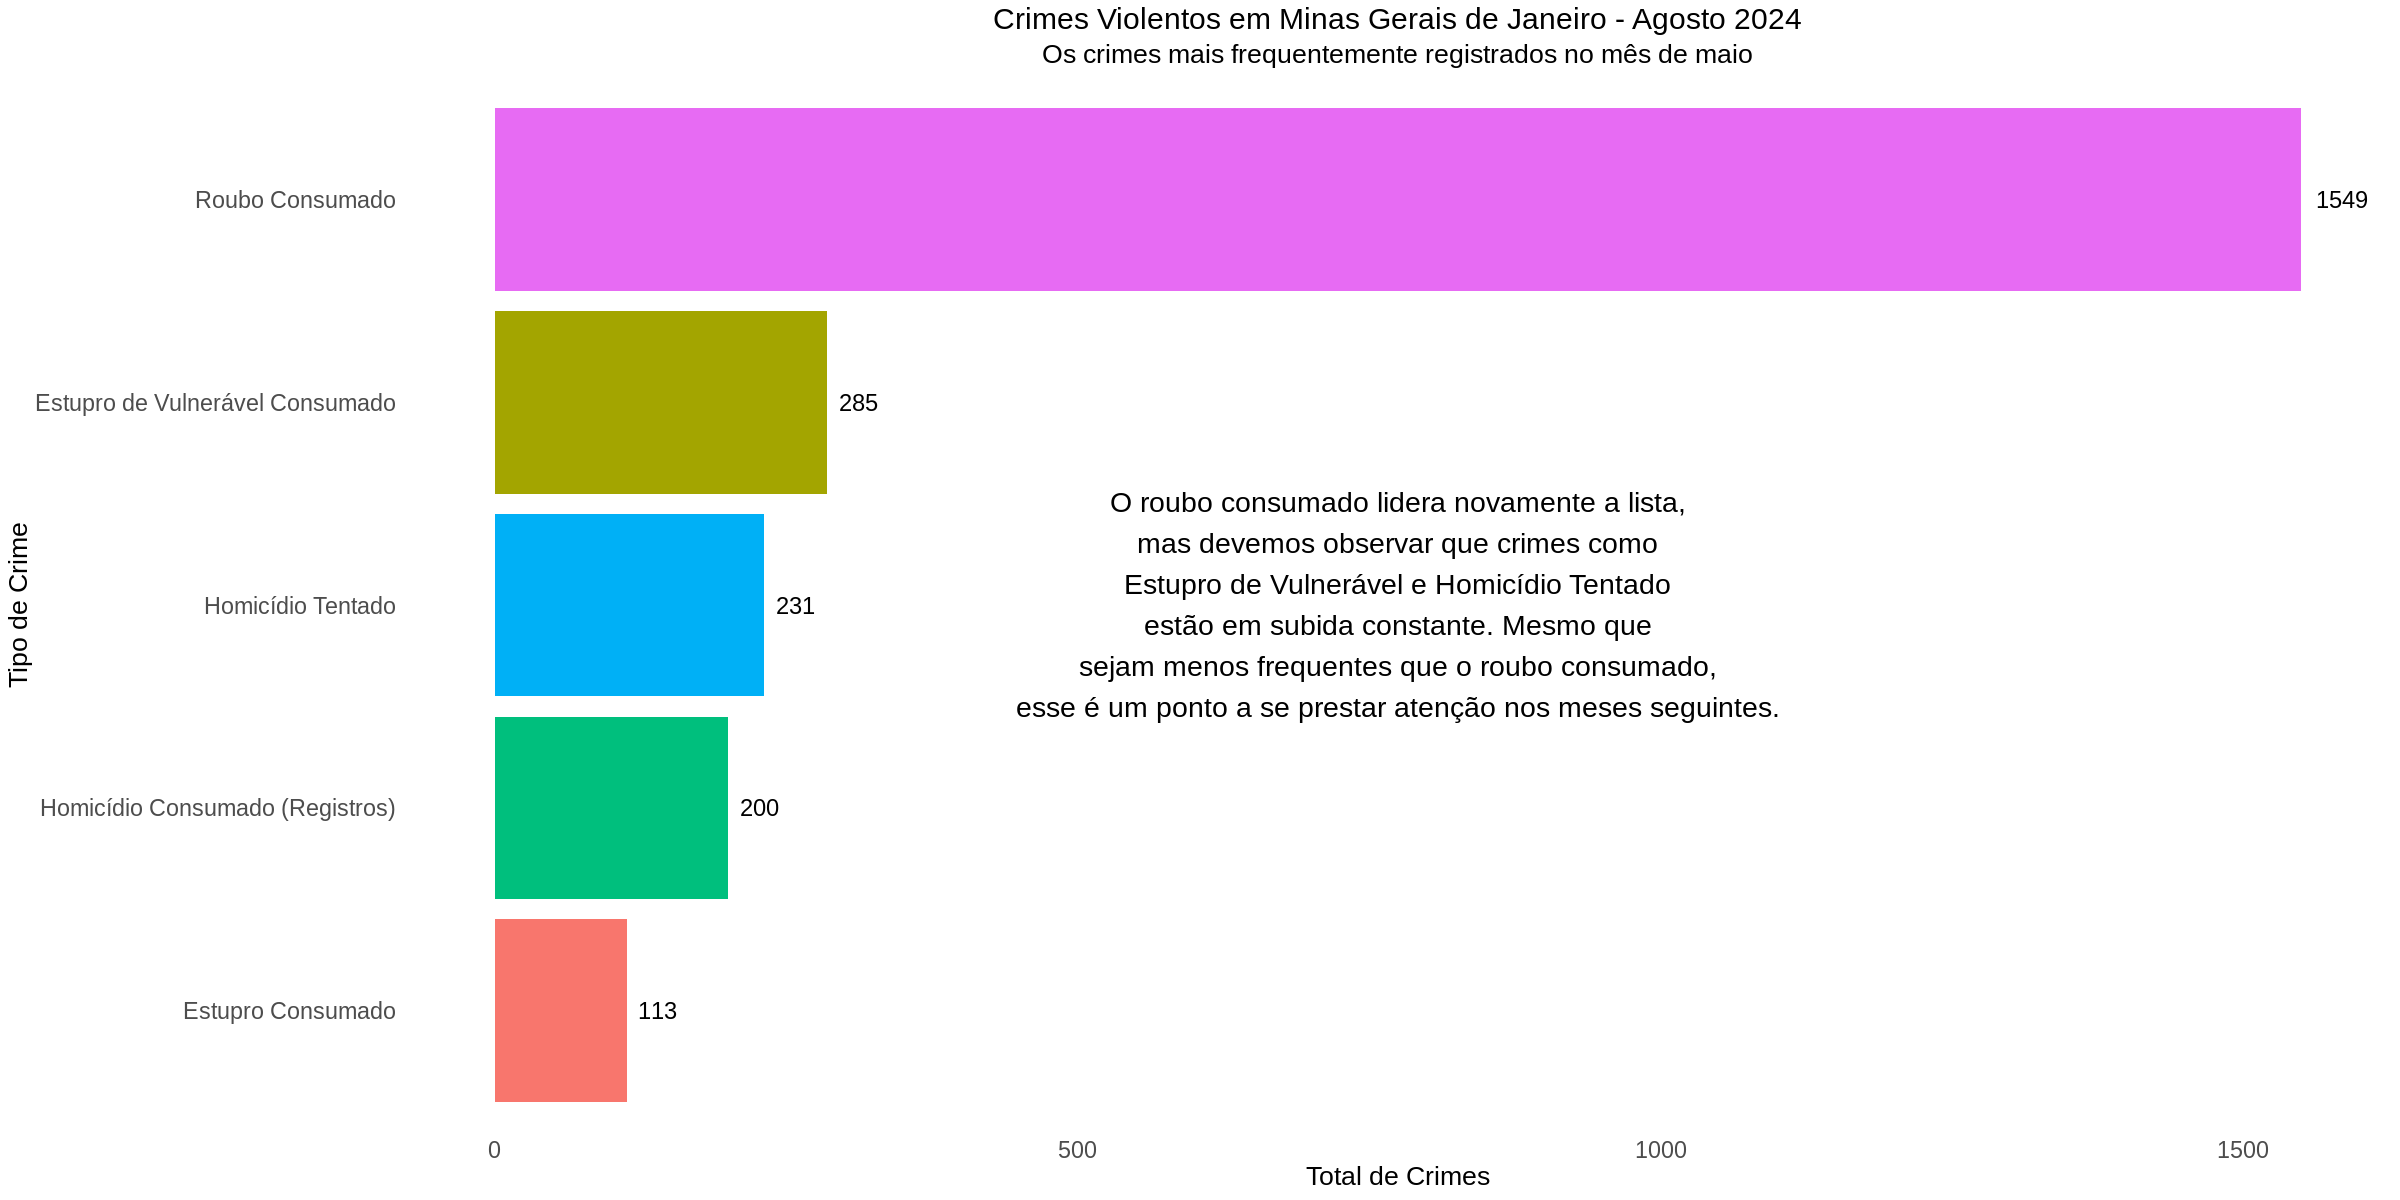

In [24]:
# @title **26 - Crimes mais frequentes em Maio**
top5_crimes_jan2024 <- Base_Dados %>%
  filter(mes == "Maio", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_jan2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de maio",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_jan2024$total_crimes) / 2,
    label = "O roubo consumado lidera novamente a lista,\nmas devemos observar que crimes como\nEstupro de Vulnerável e Homicídio Tentado\nestão em subida constante. Mesmo que\nsejam menos frequentes que o roubo consumado,\nesse é um ponto a se prestar atenção nos meses seguintes.",
    color = "black", size = 6, hjust = 0.5
  )


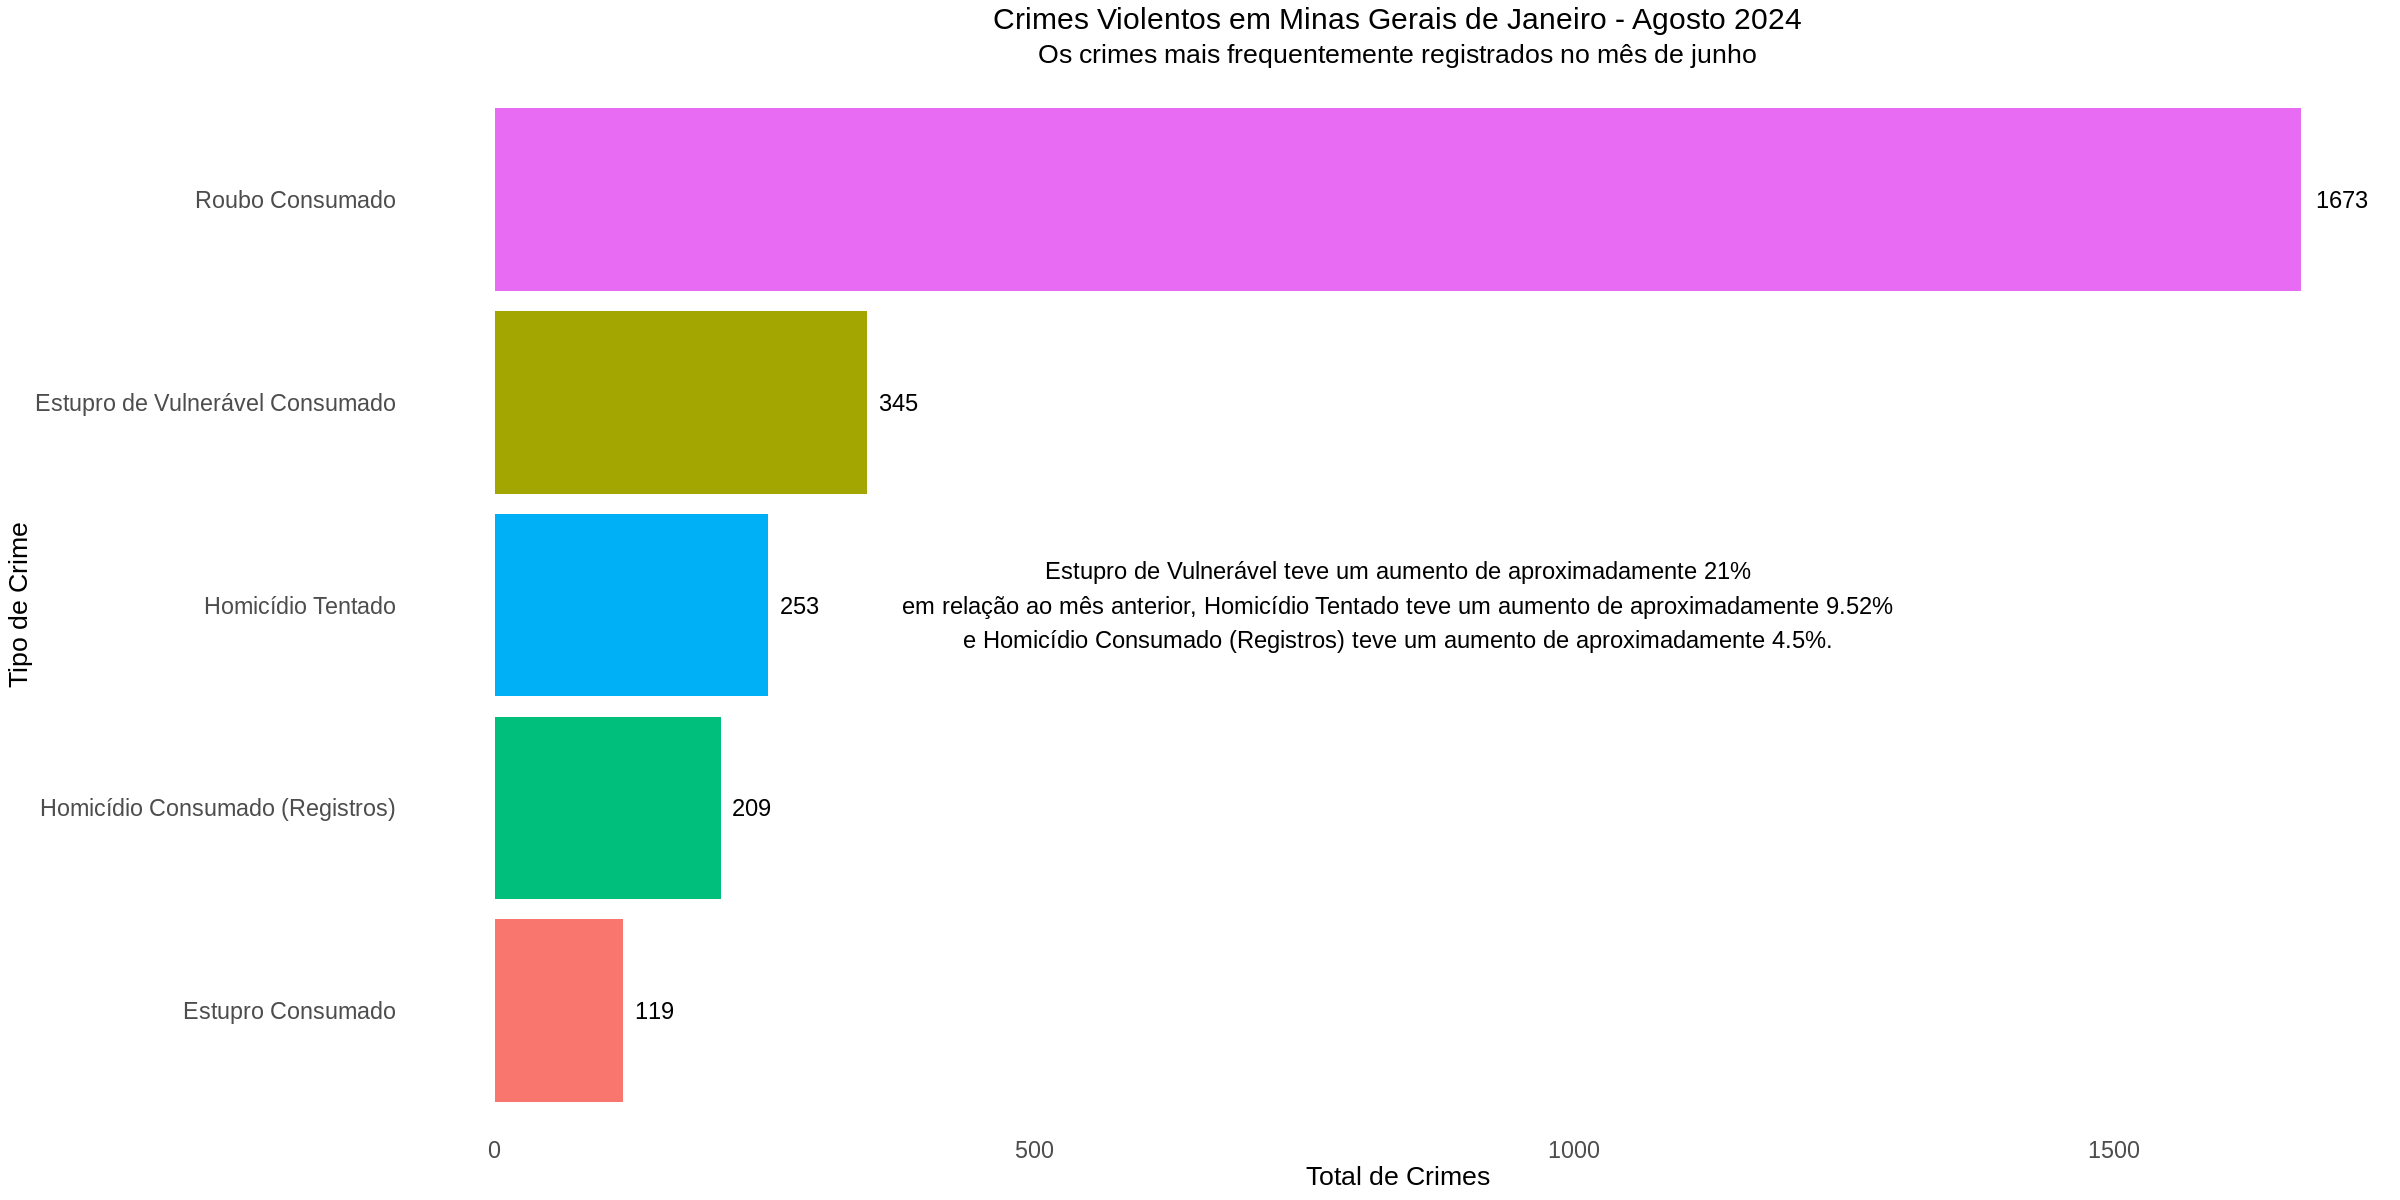

In [25]:
# @title **27 - Crimes mais frequentes em Junho**
top5_crimes_jan2024 <- Base_Dados %>%
  filter(mes == "Junho", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_jan2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de junho",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_jan2024$total_crimes) * 0.5,
    label = "Estupro de Vulnerável teve um aumento de aproximadamente 21%\nem relação ao mês anterior, Homicídio Tentado teve um aumento de aproximadamente 9.52%\ne Homicídio Consumado (Registros) teve um aumento de aproximadamente 4.5%.",
    color = "black", size = 5, hjust = 0.5
  )


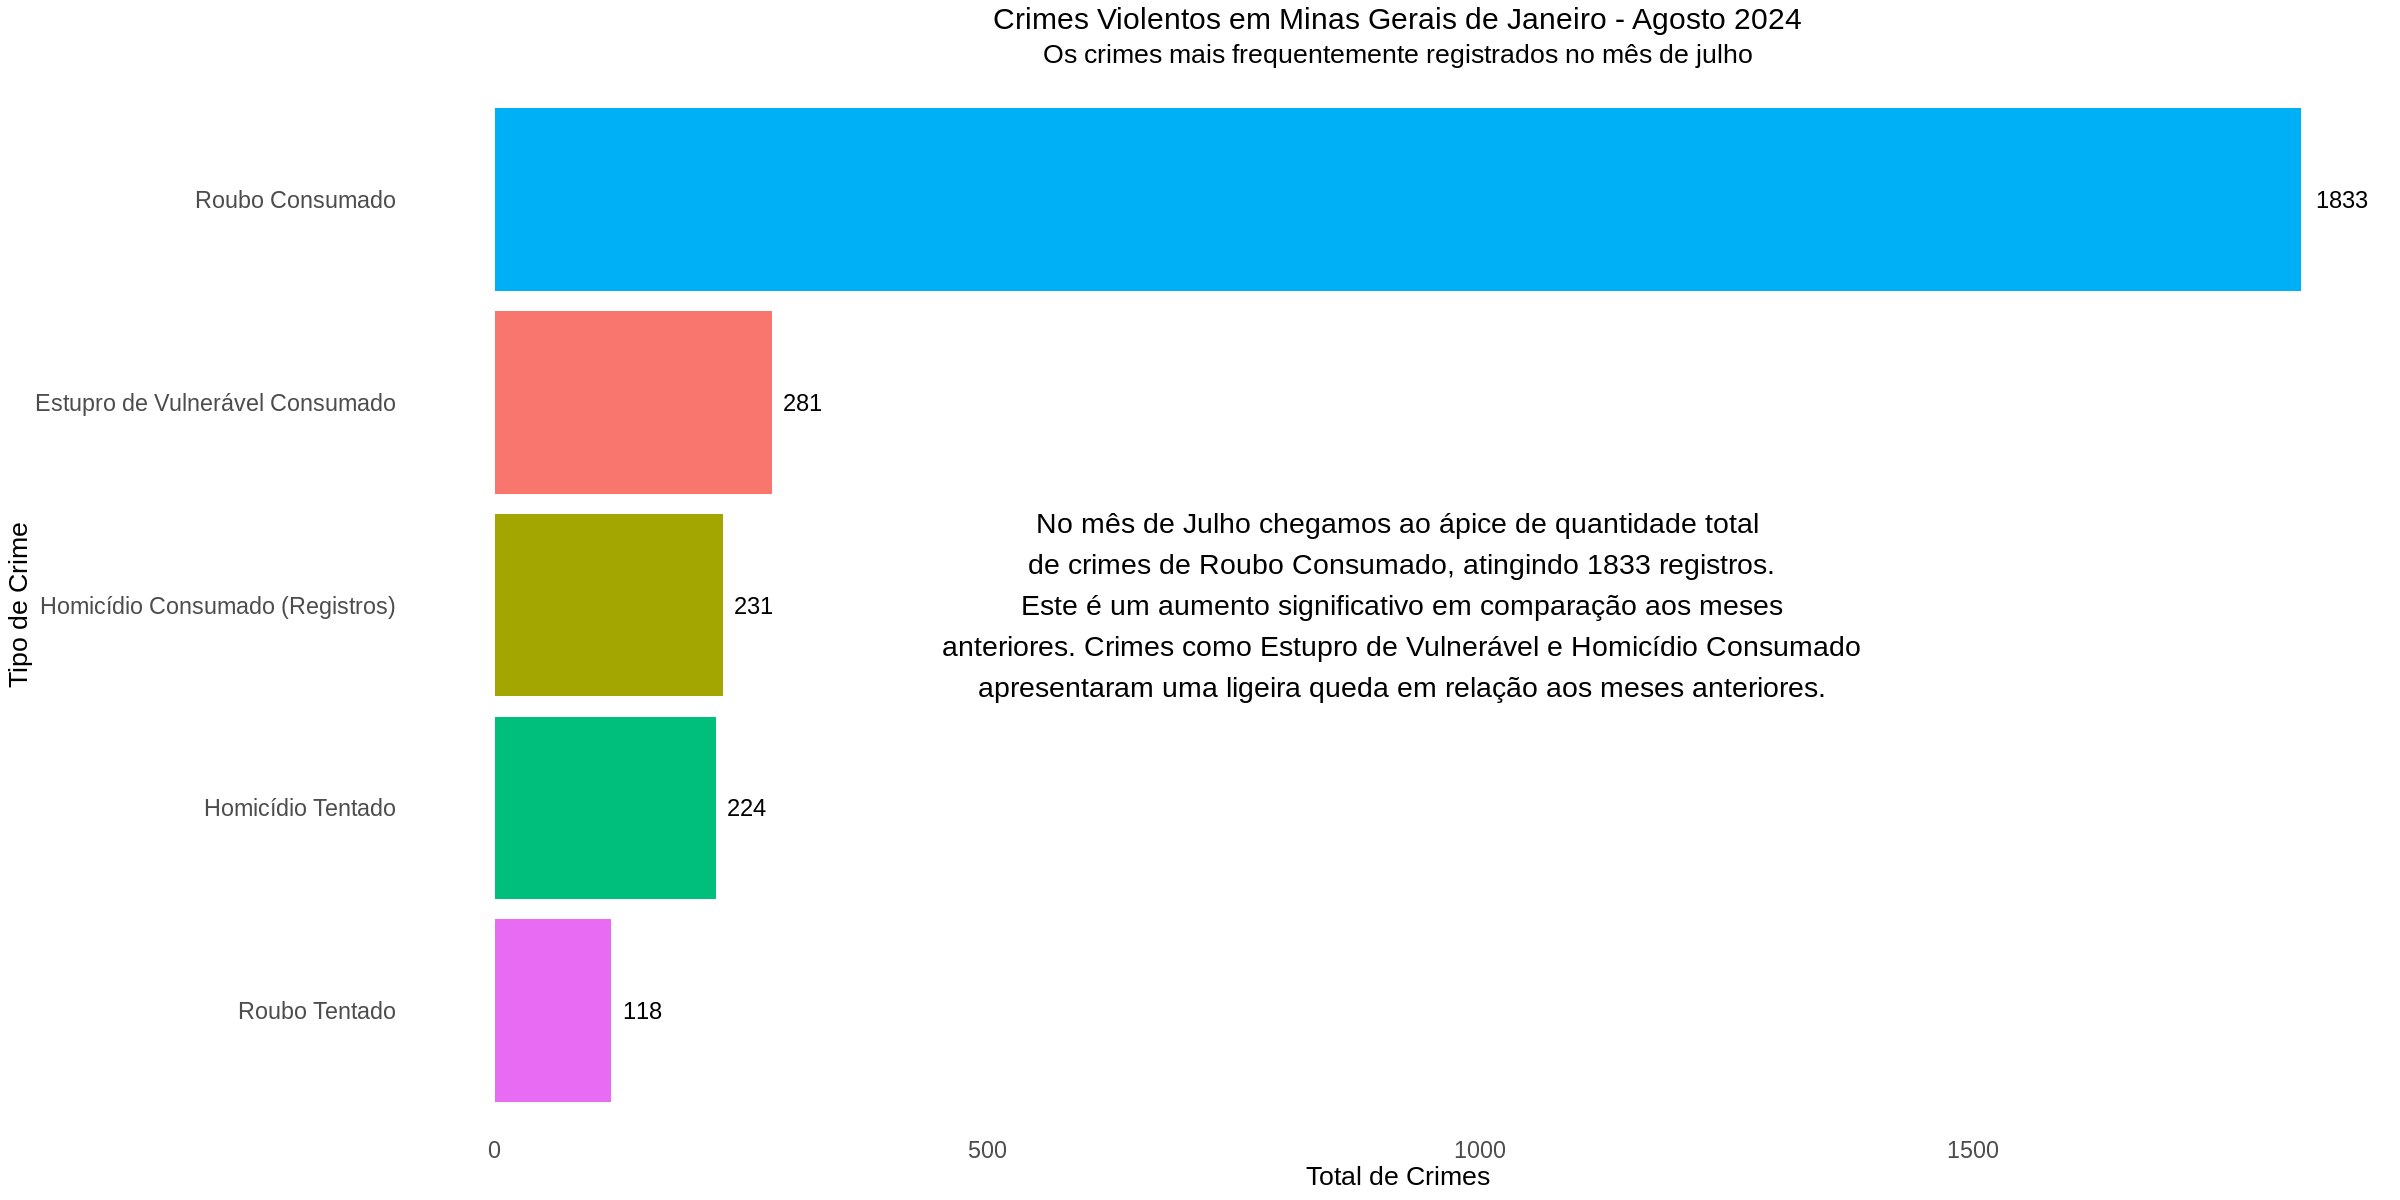

In [26]:
# @title **26 - Crimes mais frequentes em Julho**
top5_crimes_jan2024 <- Base_Dados %>%
  filter(mes == "Julho", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_jan2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de julho",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_jan2024$total_crimes) * 0.5,
    label = "No mês de Julho chegamos ao ápice de quantidade total\n de crimes de Roubo Consumado, atingindo 1833 registros.\n Este é um aumento significativo em comparação aos meses\n anteriores. Crimes como Estupro de Vulnerável e Homicídio Consumado\n apresentaram uma ligeira queda em relação aos meses anteriores.",
    color = "black", size = 6, hjust = 0.5
  )


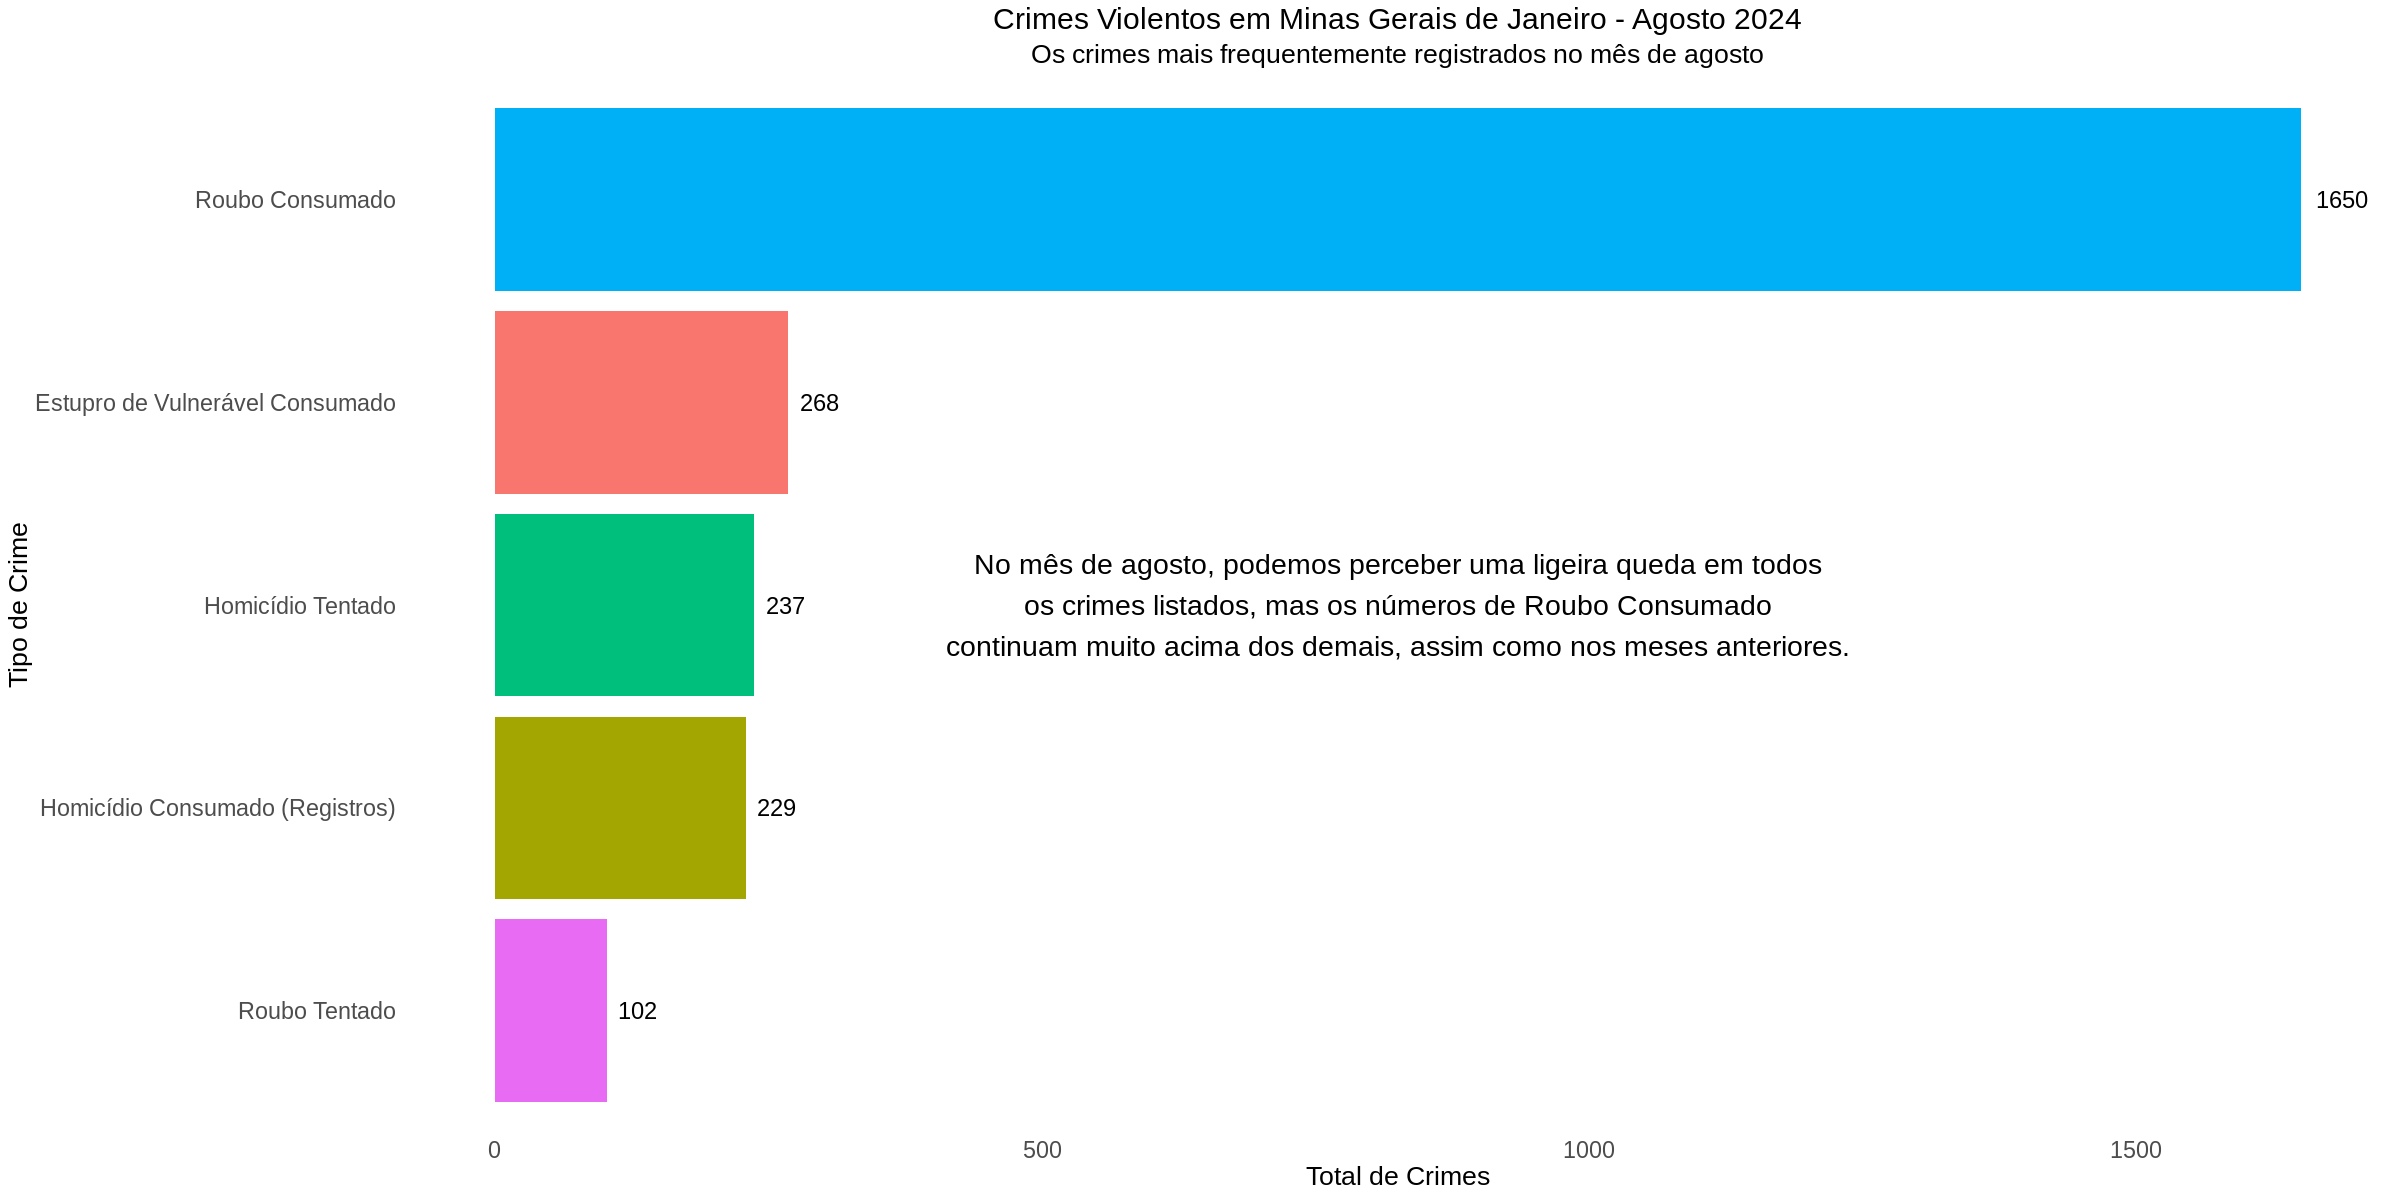

In [64]:
# @title **27 - Crimes mais frequentes em Agosto**
top5_crimes_jan2024 <- Base_Dados %>%
  filter(mes == "Agosto", ano == 2024, registros > 0) %>%
  group_by(natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(top5_crimes_jan2024, aes(x = reorder(natureza, total_crimes), y = total_crimes, fill = natureza)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = total_crimes), hjust = -0.3, size = 5) +
  labs(
    title = "Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024",
    subtitle = "Os crimes mais frequentemente registrados no mês de agosto",
    x = "Tipo de Crime", y = "Total de Crimes"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none") +
  annotate(
    "text", x = 3, y = max(top5_crimes_jan2024$total_crimes) / 2,
    label = "No mês de agosto, podemos perceber uma ligeira queda em todos\nos crimes listados, mas os números de Roubo Consumado\ncontinuam muito acima dos demais, assim como nos meses anteriores.",
    color = "black", size = 6, hjust = 0.5
  )


[1] "Municípios com menores números de crimes confirmados nos meses de Janeiro até Agosto de 2024"



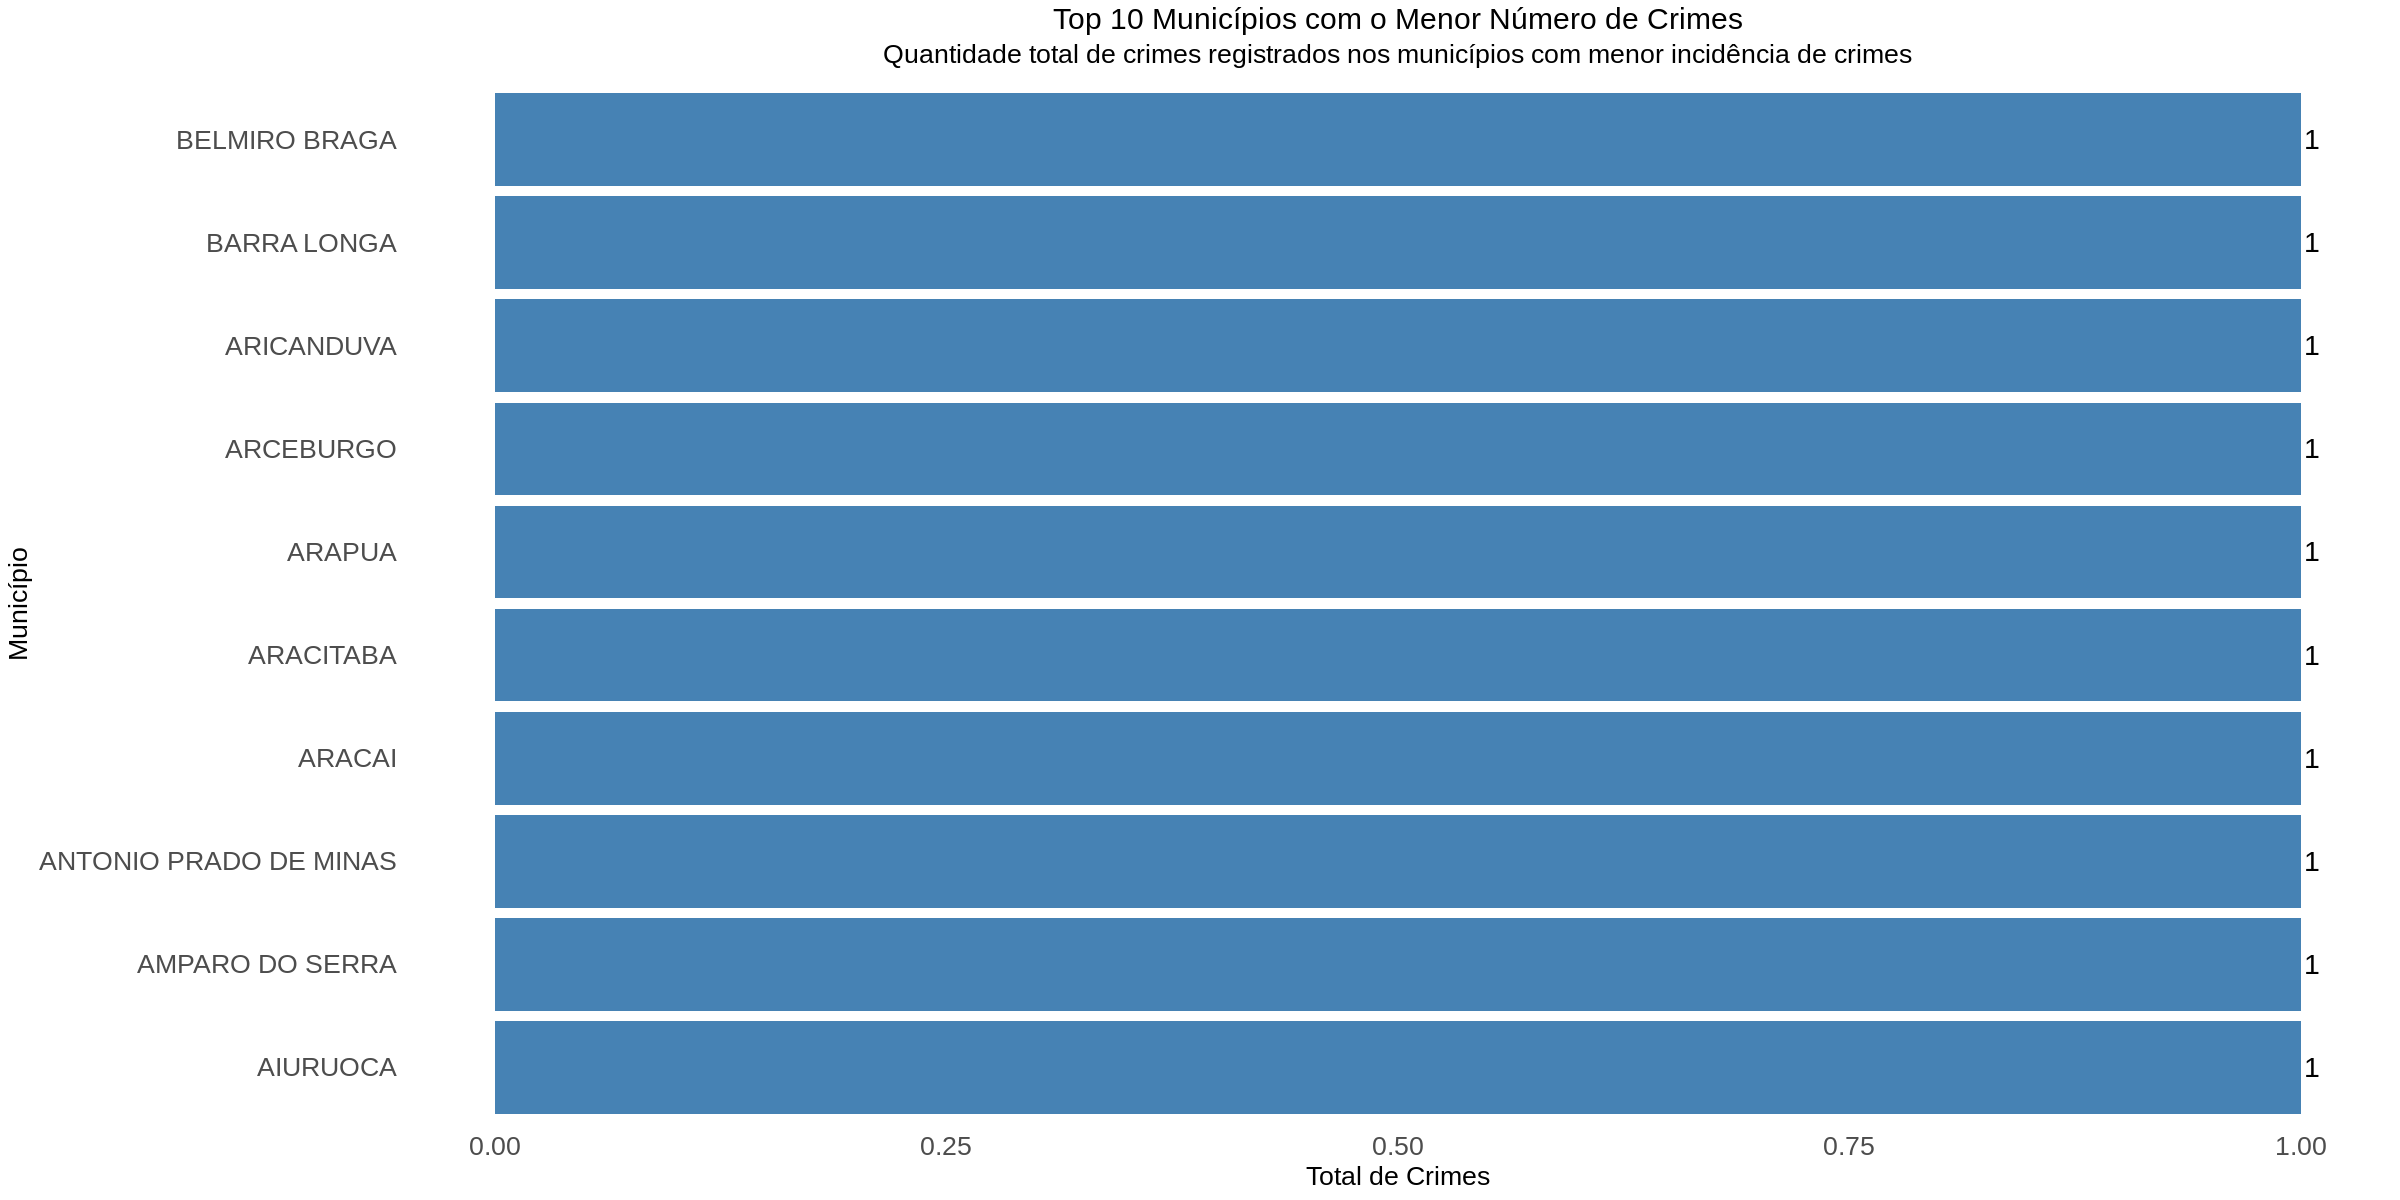

In [70]:
# @title **28 - Municipios com a menor quantidade de crimes**
municipios_menor_crime <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(total_crimes) %>%
  slice(1:10)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(municipios_menor_crime, aes(x = reorder(municipio, total_crimes), y = total_crimes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = total_crimes), hjust = -0.2, size = 6) +
  coord_flip() +
  labs(
    title = "Top 10 Municípios com o Menor Número de Crimes",
    subtitle = "Quantidade total de crimes registrados nos municípios com menor incidência de crimes",
    x = "Município", y = "Total de Crimes"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  guides(fill = "none")

# Adiciona uma linha de distância entre o gráfico e o texto
print("Municípios com menores números de crimes confirmados nos meses de Janeiro até Agosto de 2024")
cat("\n")

In [73]:
# @title **29 - Municipios com a menor quantidade de crimes**
total_crimes_2024 <- Base_Dados %>%
  filter(ano == 2024, registros > 0) %>%
  summarise(total_crimes = sum(registros))

print(total_crimes_2024$total_crimes)
print("Até o Mes de Agosto que é onde as informaçoes da base se finaliza , temos acumulados um total de 21.282 crimes realizados")

[1] 21282
[1] "Até o Mes de Agosto que é onde as informaçoes da base se finaliza , temos acumulados um total de 21.282 crimes realizados"


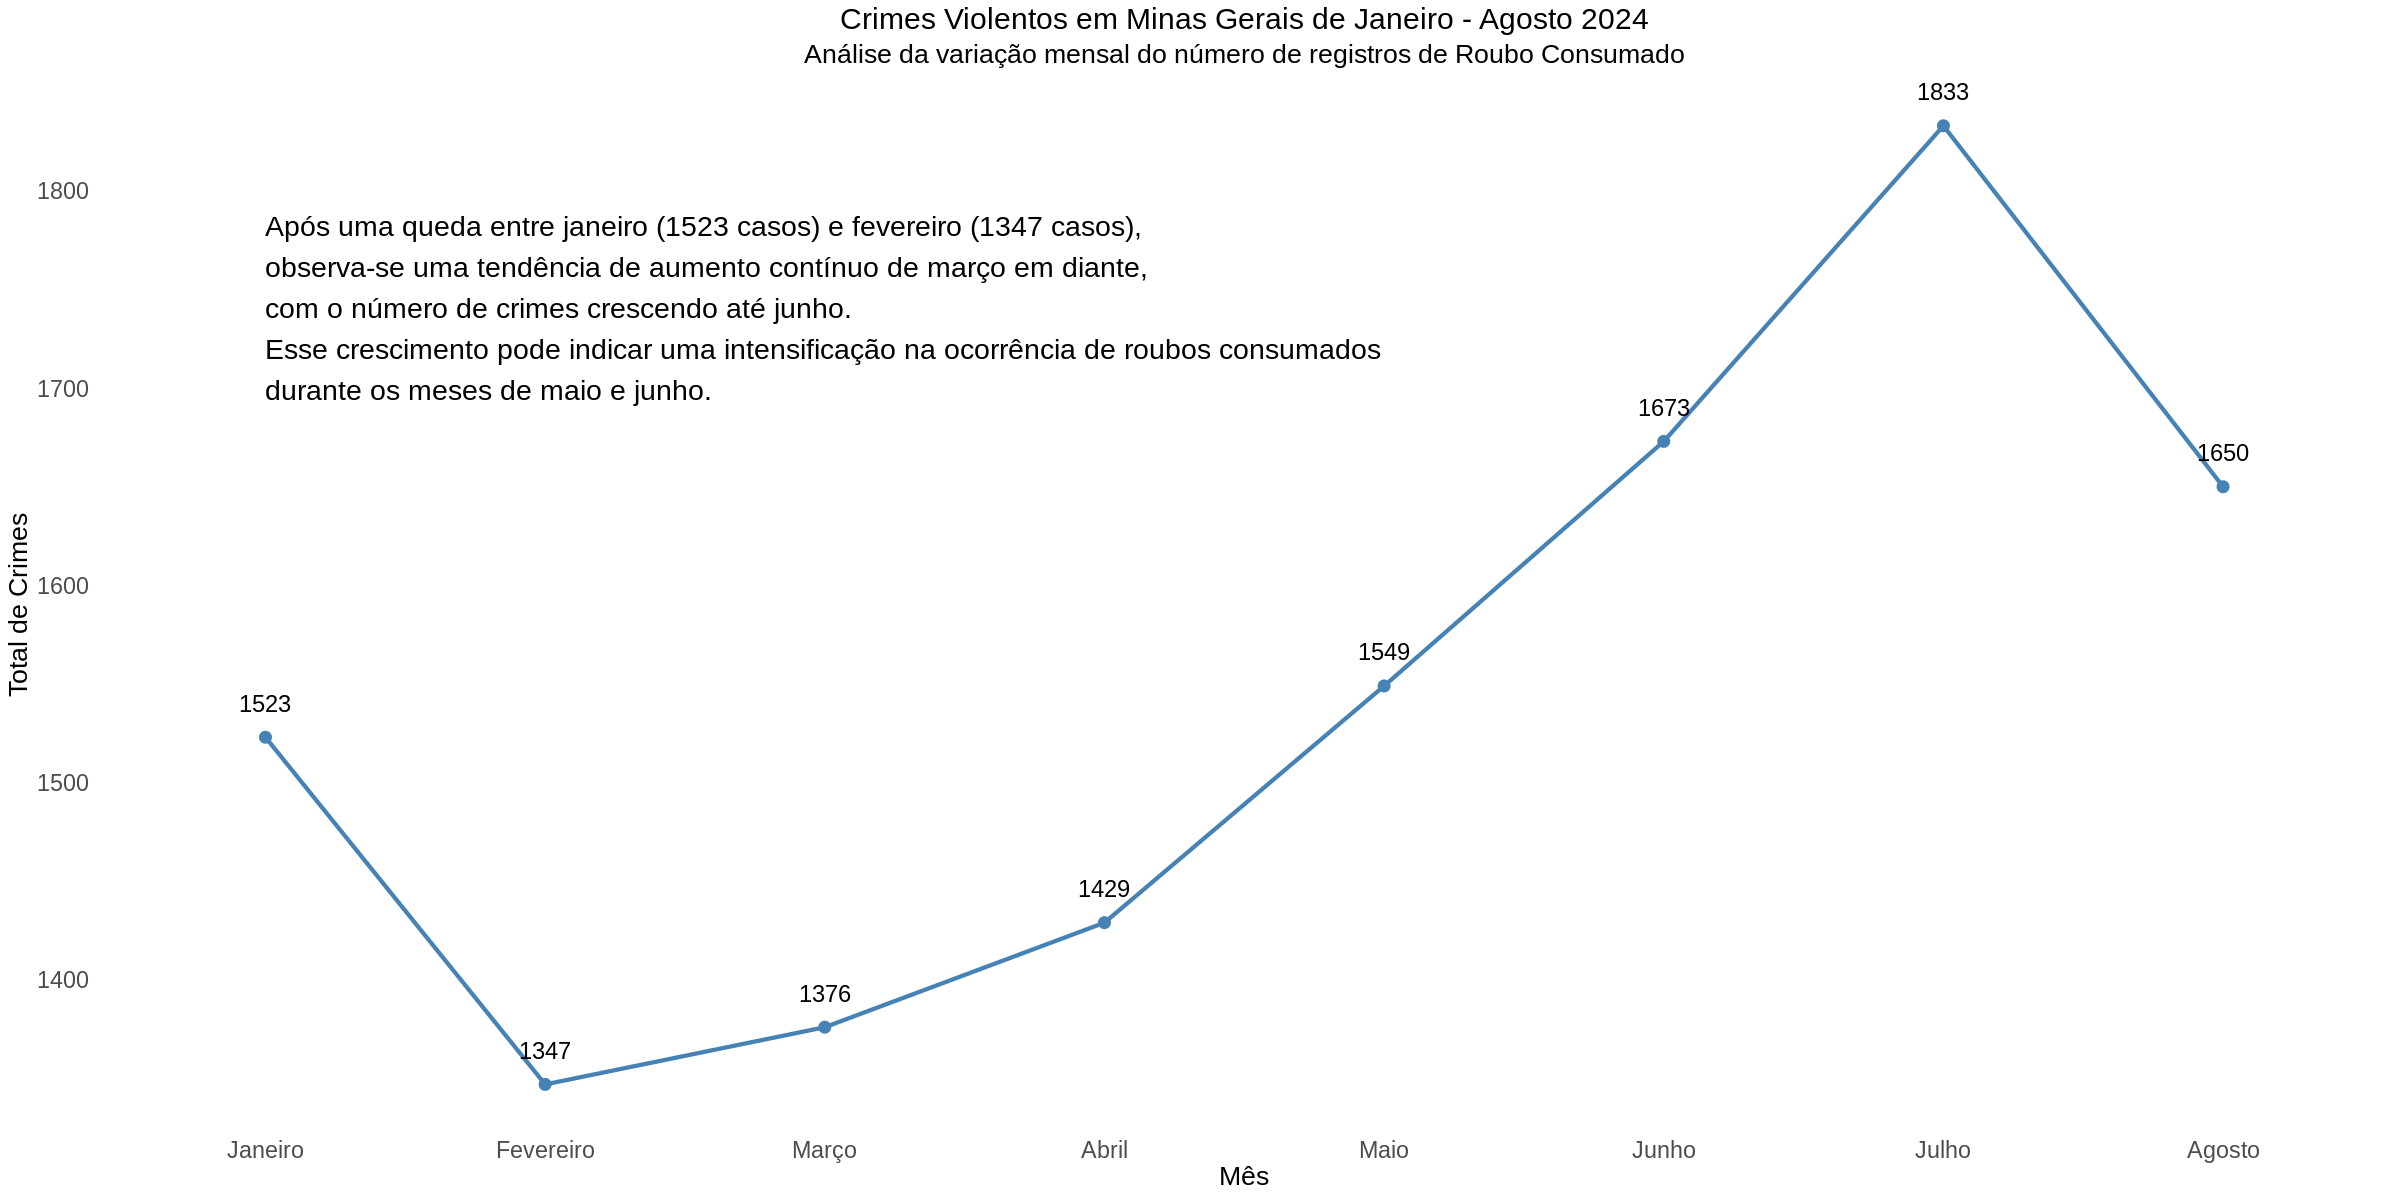

In [134]:
# @title **30 - Variação mensal do número de registros de Roubo Consumado**
tipo_crime_especifico <- "Roubo Consumado"


mudanca_mensal_crime <- Base_Dados %>%
  filter(natureza == tipo_crime_especifico, registros > 0) %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


mudanca_mensal_crime <- mudanca_mensal_crime %>%
  mutate(mes = factor(mes, levels = meses_ordem))


options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(mudanca_mensal_crime, aes(x = mes, y = total_crimes, group = 1)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "steelblue", size = 3) +
  geom_text(aes(label = total_crimes), vjust = -1.5, size = 5) +
  labs(
    title = paste("Crimes Violentos em Minas Gerais de Janeiro - Agosto 2024"),
    subtitle = "Análise da variação mensal do número de registros de Roubo Consumado",
    x = "Mês",
    y = "Total de Crimes"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  annotate(
    "text", x = 1, y = max(mudanca_mensal_crime$total_crimes),
    label = "Após uma queda entre janeiro (1523 casos) e fevereiro (1347 casos),\nobserva-se uma tendência de aumento contínuo de março em diante,\ncom o número de crimes crescendo até junho.\nEsse crescimento pode indicar uma intensificação na ocorrência de roubos consumados\ndurante os meses de maio e junho.",
    hjust = 0, vjust = 1.5, size = 6, color = "black"
  )


Podemos perceber que o Roubo consumado se destaca muito mais
 que todos os outros crimes presentes na lista.
 Os outros crimes seguem um padrão e uma tendência
 basicamente iguais, mostrando que estão seguindo em igualdade.
 Podemos perceber um leve aumento de Estupro de Vulnerável no mês
 de Junho e nos meses seguintes ele retorna ao seu padrão original.



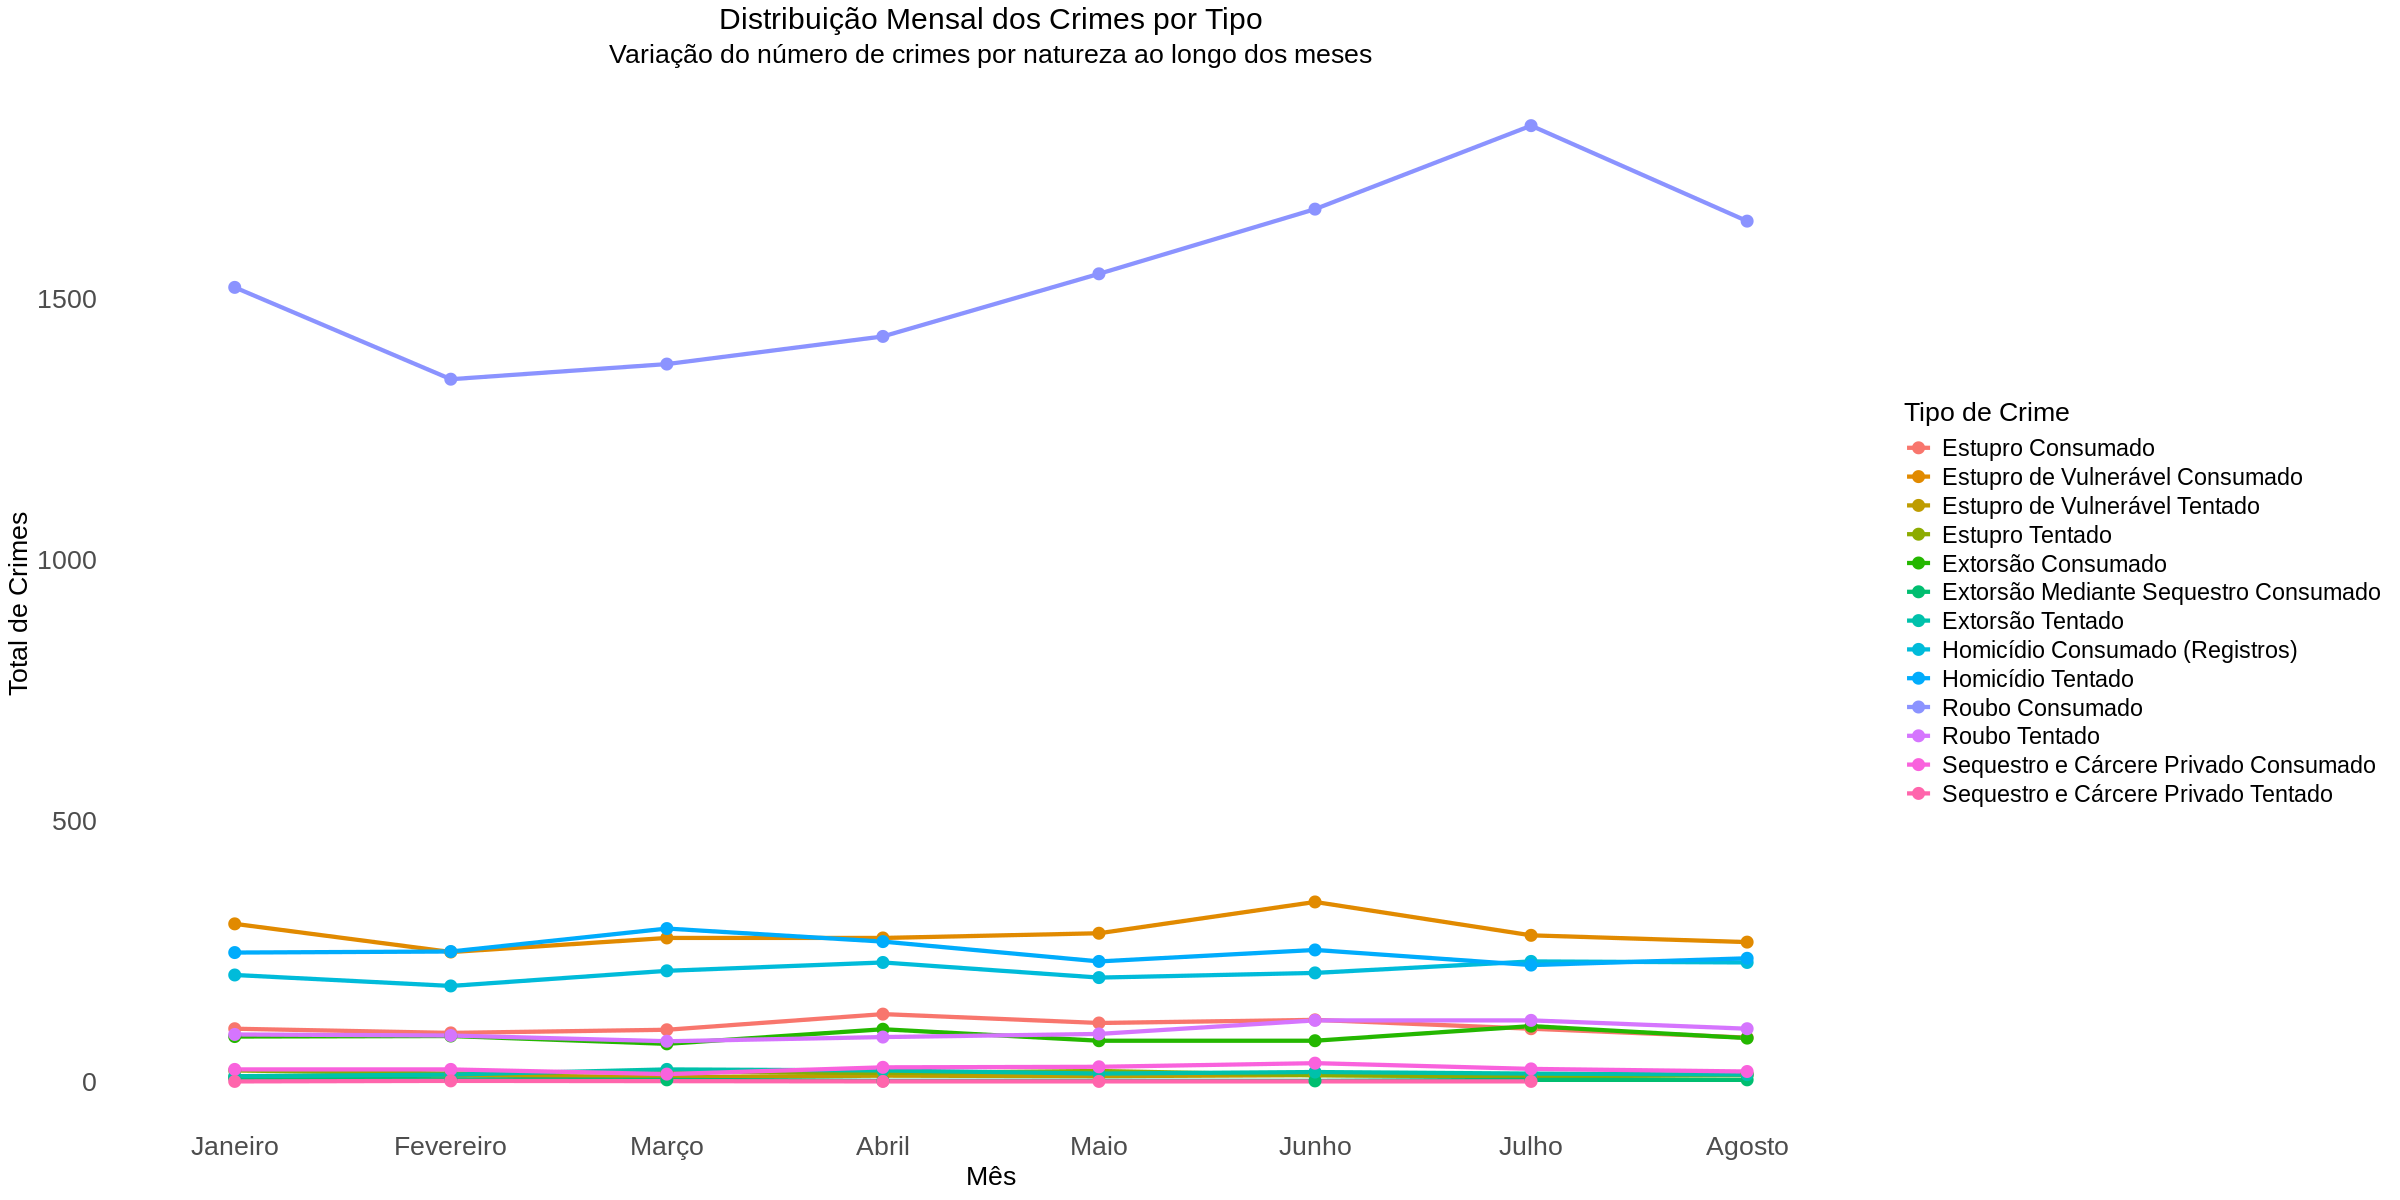

In [94]:
# @title **31 - Variação do número de crimes por natureza**
distribuicao_mensal_crimes <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(mes, natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(mes)


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


distribuicao_mensal_crimes <- distribuicao_mensal_crimes %>%
  mutate(mes = factor(mes, levels = meses_ordem))


options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(distribuicao_mensal_crimes, aes(x = mes, y = total_crimes, color = natureza, group = natureza)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  labs(
    title = "Distribuição Mensal dos Crimes por Tipo",
    subtitle = "Variação do número de crimes por natureza ao longo dos meses",
    x = "Mês",
    y = "Total de Crimes",
    color = "Tipo de Crime"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    panel.grid = element_blank()
  )


cat("Podemos perceber que o Roubo consumado se destaca muito mais\n",
    "que todos os outros crimes presentes na lista.\n",
    "Os outros crimes seguem um padrão e uma tendência\n",
    "basicamente iguais, mostrando que estão seguindo em igualdade.\n",
    "Podemos perceber um leve aumento de Estupro de Vulnerável no mês\n",
    "de Junho e nos meses seguintes ele retorna ao seu padrão original.\n")
cat("\n")


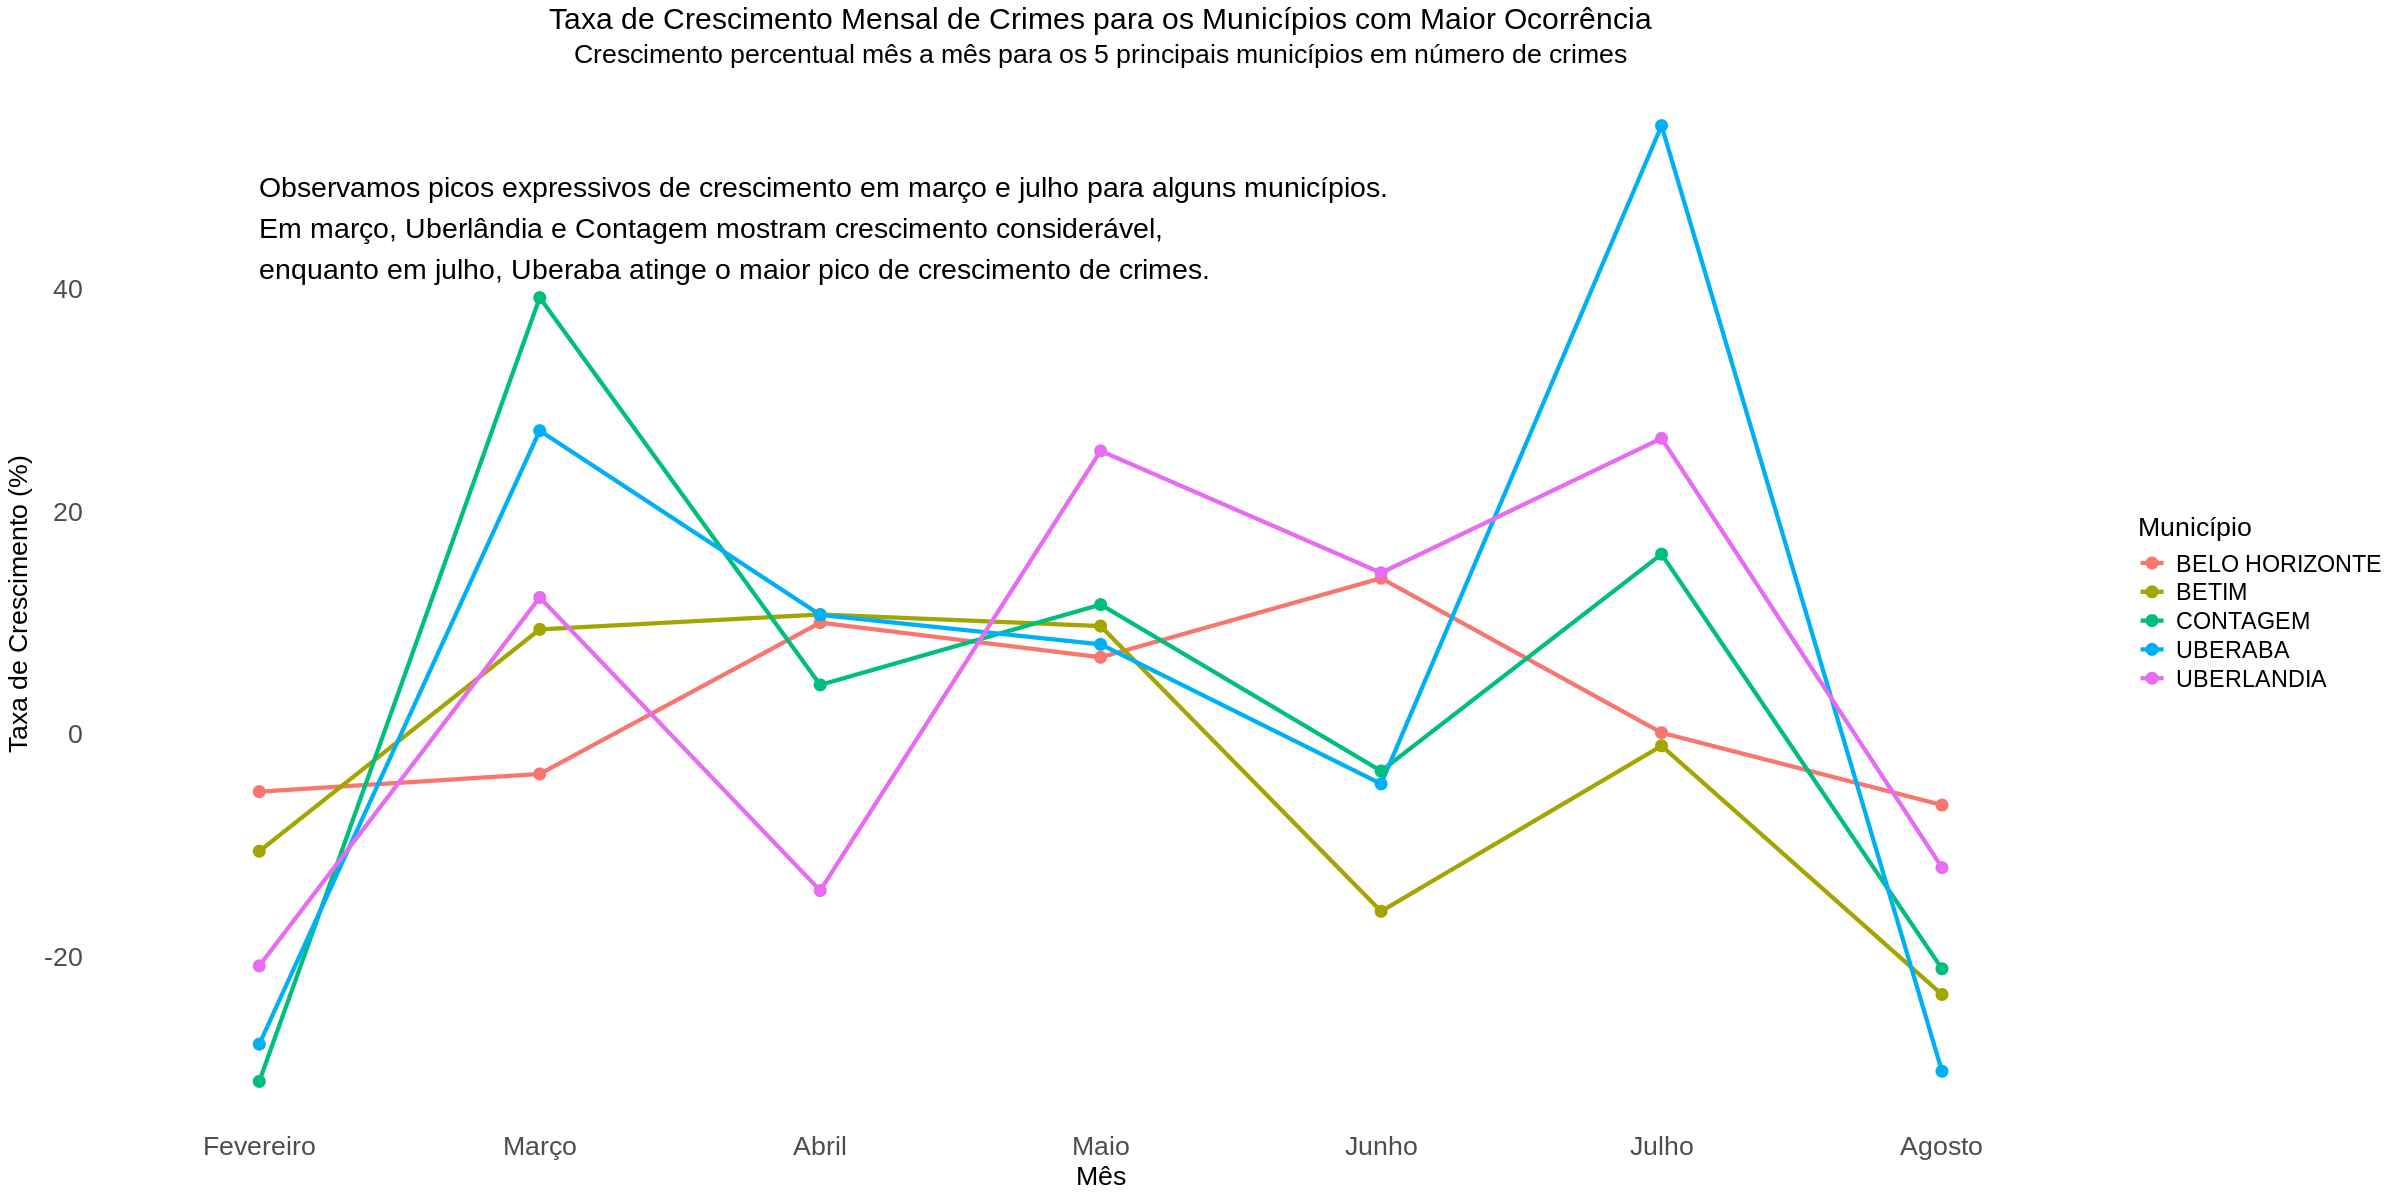

In [113]:
# @title **32 - Crescimento percentual mês a mês para os principais municipios**
top_municipios <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:5) %>%
  pull(municipio)


crescimento_mensal <- Base_Dados %>%
  filter(municipio %in% top_municipios, registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(municipio, mes)


meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


crescimento_mensal <- crescimento_mensal %>%
  mutate(mes = factor(mes, levels = meses_ordem)) %>%
  arrange(municipio, mes)


crescimento_mensal <- crescimento_mensal %>%
  group_by(municipio) %>%
  mutate(crescimento = (total_crimes - lag(total_crimes)) / lag(total_crimes) * 100) %>%
  ungroup() %>%
  na.omit()


options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(crescimento_mensal, aes(x = mes, y = crescimento, color = municipio, group = municipio)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  labs(
    title = "Taxa de Crescimento Mensal de Crimes para os Municípios com Maior Ocorrência",
    subtitle = "Crescimento percentual mês a mês para os 5 principais municípios em número de crimes",
    x = "Mês",
    y = "Taxa de Crescimento (%)",
    color = "Município"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    panel.grid = element_blank()
  ) +
  annotate(
    "text", x = 1, y = 50, hjust = 0, vjust = 1, size = 6, color = "black",
    label = "Observamos picos expressivos de crescimento em março e julho para alguns municípios.\nEm março, Uberlândia e Contagem mostram crescimento considerável,\nenquanto em julho, Uberaba atinge o maior pico de crescimento de crimes."
  )


[1] "Houve um aumento de aproximadamente 3,34% no número de crimes de janeiro para agosto de 2024."



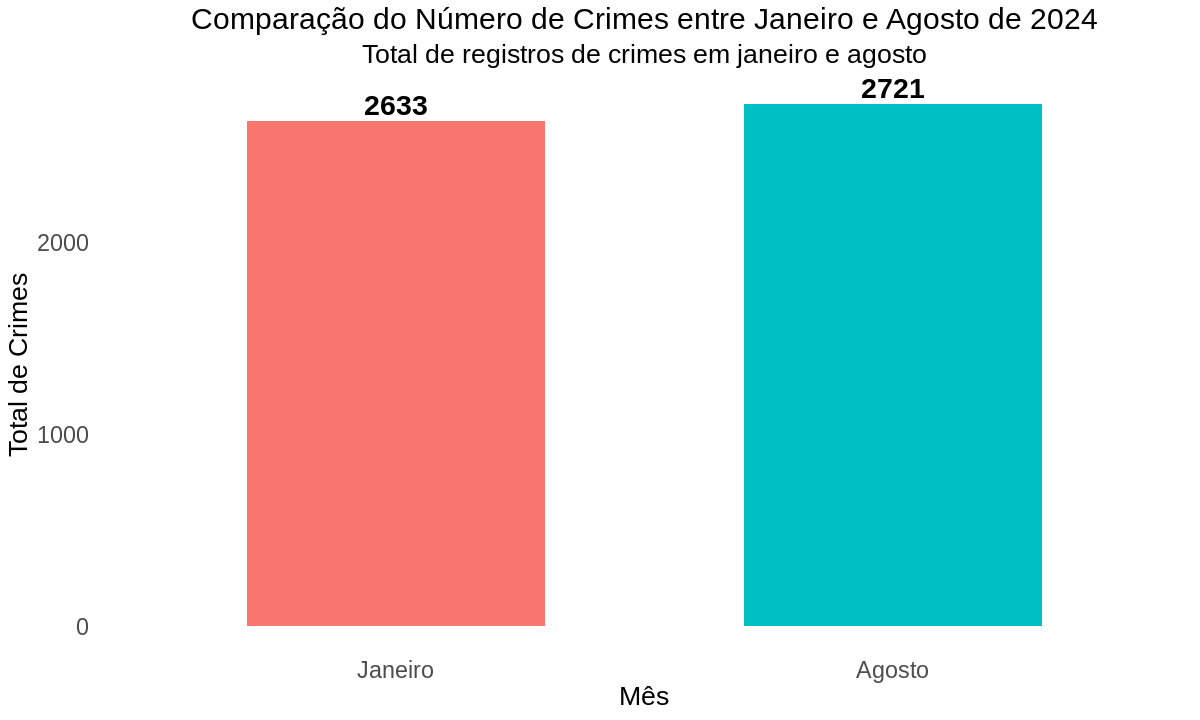

In [116]:
# @title **33 - Total de registros de crimes em janeiro e agosto**
comparacao_jan_ago <- Base_Dados %>%
  filter(ano == 2024, registros > 0, mes %in% c("Janeiro", "Agosto")) %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop")


meses_ordem <- c("Janeiro", "Agosto")


comparacao_jan_ago <- comparacao_jan_ago %>%
  mutate(mes = factor(mes, levels = meses_ordem))


options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(comparacao_jan_ago, aes(x = mes, y = total_crimes, fill = mes)) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = total_crimes), vjust = -0.3, size = 6, fontface = "bold") +
  labs(
    title = "Comparação do Número de Crimes entre Janeiro e Agosto de 2024",
    subtitle = "Total de registros de crimes em janeiro e agosto",
    x = "Mês",
    y = "Total de Crimes"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    legend.position = "none",
    panel.grid = element_blank()
  )

print("Houve um aumento de aproximadamente 3,34% no número de crimes de janeiro para agosto de 2024.")
cat("\n")

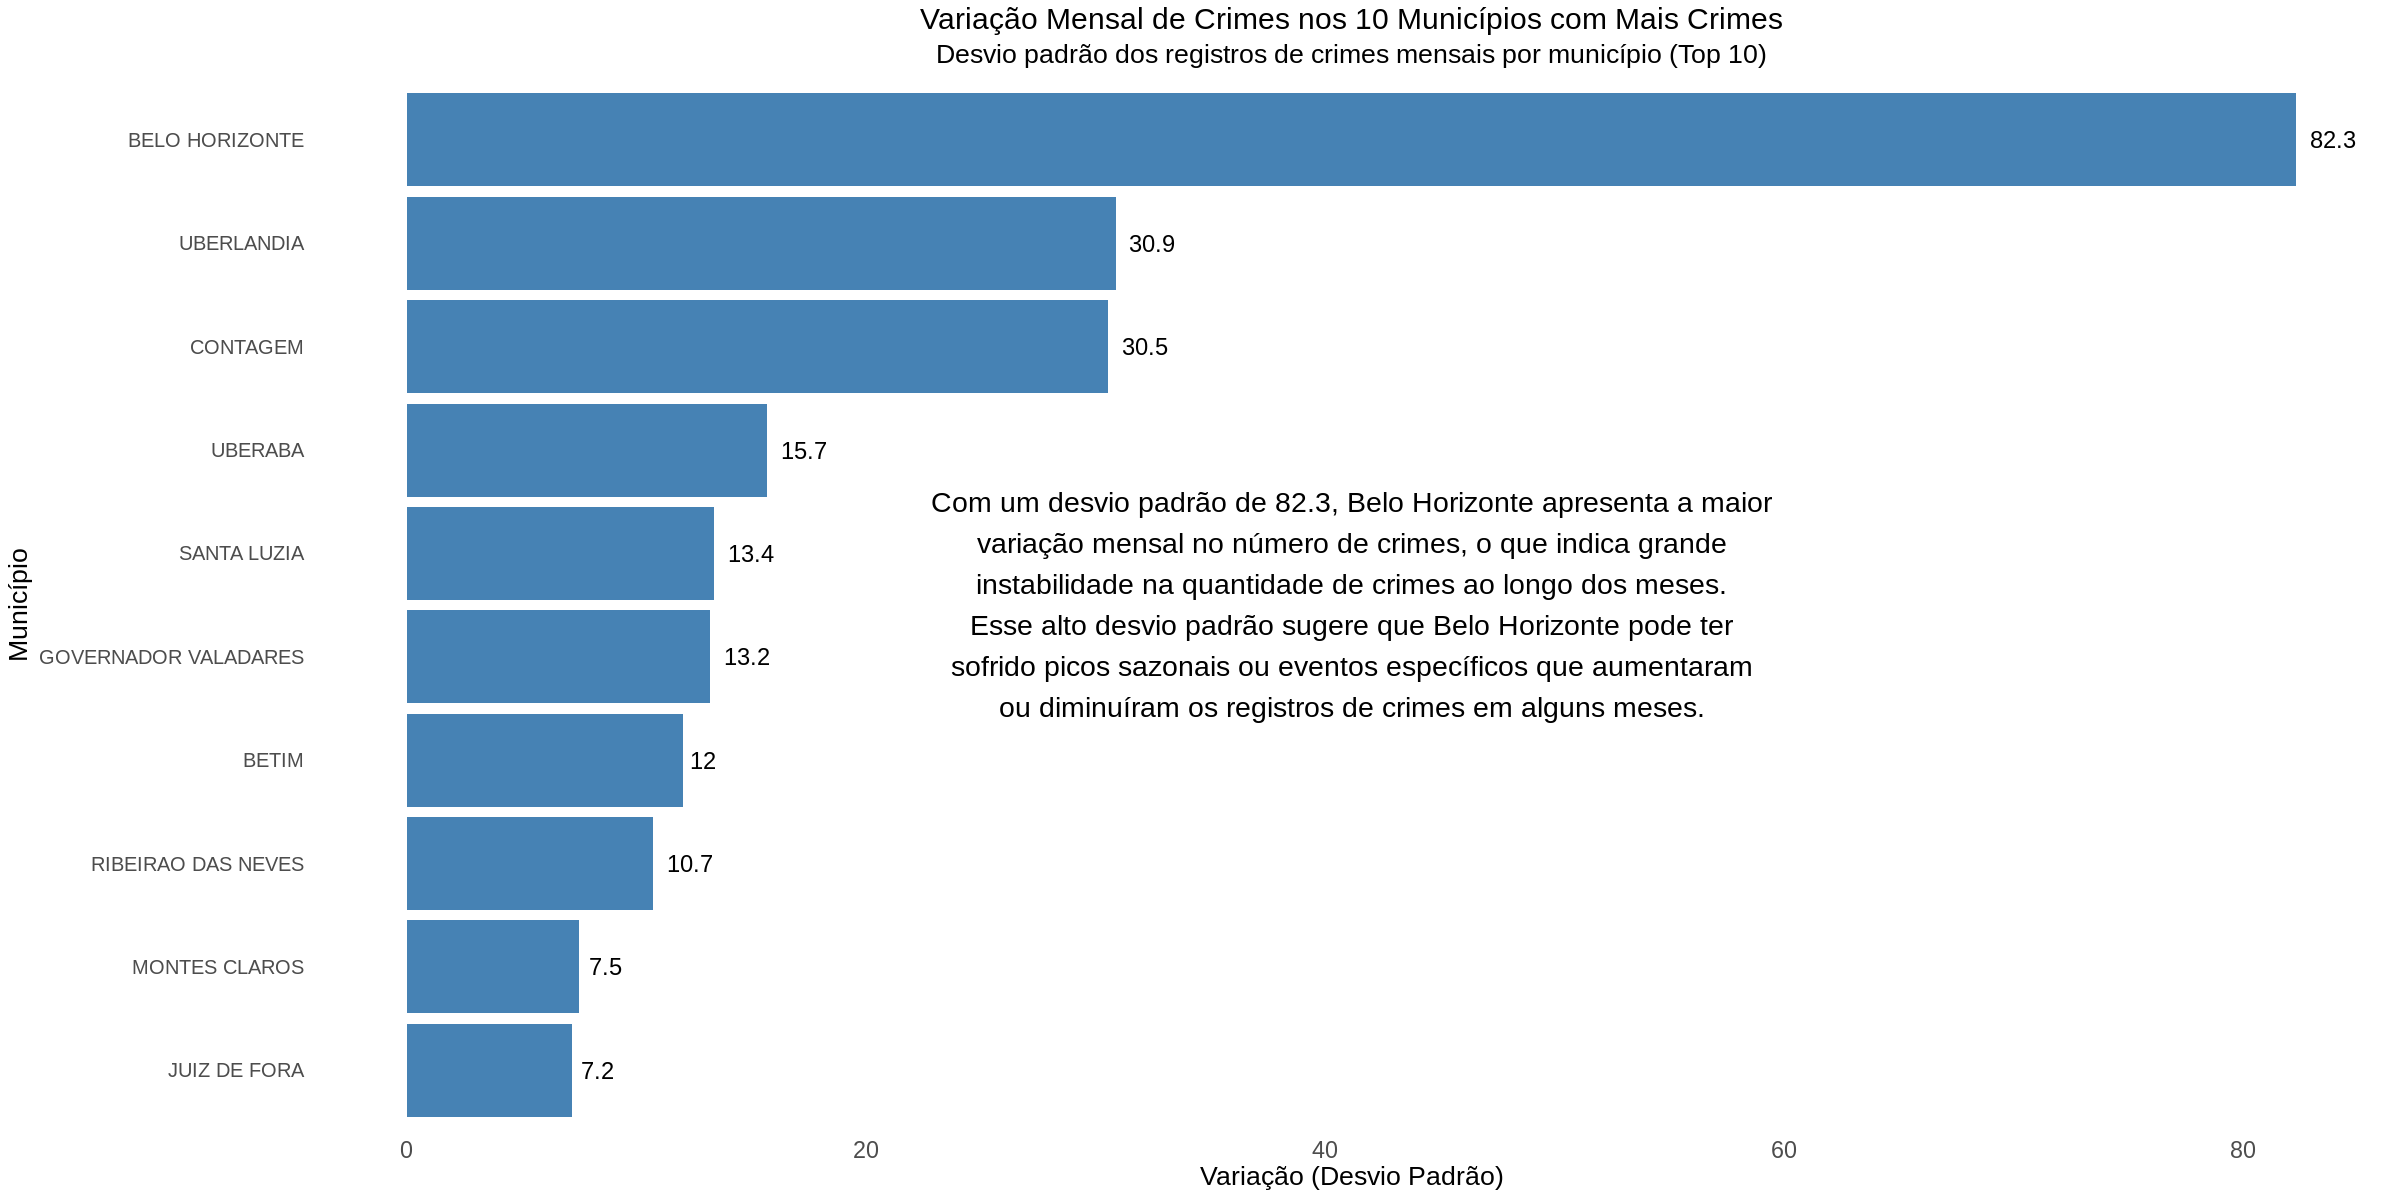

In [125]:
# @title **34 - Desvio padrão dos registros de crimes mensais por município (Top 10)**
top10_municipios <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  slice(1:10) %>%
  pull(municipio)

variacao_mensal_top10 <- Base_Dados %>%
  filter(municipio %in% top10_municipios, registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  group_by(municipio) %>%
  summarise(variacao = sd(total_crimes), .groups = "drop") %>%
  arrange(desc(variacao))

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(variacao_mensal_top10, aes(x = reorder(municipio, variacao), y = variacao)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(variacao, 1)), hjust = -0.3, size = 5) +
  coord_flip() +
  labs(
    title = "Variação Mensal de Crimes nos 10 Municípios com Mais Crimes",
    subtitle = "Desvio padrão dos registros de crimes mensais por município (Top 10)",
    x = "Município",
    y = "Variação (Desvio Padrão)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 16),
    panel.grid = element_blank()
  ) +
  annotate(
    "text", x = 5.5, y = max(variacao_mensal_top10$variacao) / 2,
    label = "Com um desvio padrão de 82.3, Belo Horizonte apresenta a maior\nvariação mensal no número de crimes, o que indica grande\ninstabilidade na quantidade de crimes ao longo dos meses.\nEsse alto desvio padrão sugere que Belo Horizonte pode ter\nsofrido picos sazonais ou eventos específicos que aumentaram\nou diminuíram os registros de crimes em alguns meses.",
    color = "black", size = 6, hjust = 0.5
  )


In [35]:
# @title **34 - Média Mensal de Crimes por Município**
media_mensal_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio) %>%
  summarise(media_mensal_crimes = mean(registros), .groups = "drop")

print("Média Mensal de Crimes por Município:")
print(media_mensal_municipio)


[1] "Média Mensal de Crimes por Município:"
# A tibble: 759 × 2
   municipio           media_mensal_crimes
   <chr>                             <dbl>
 1 ABADIA DOS DOURADOS                1   
 2 ABAETE                             1.18
 3 ABRE-CAMPO                         1.12
 4 ACAIACA                            1   
 5 ACUCENA                            1   
 6 AGUA BOA                           1   
 7 AGUA COMPRIDA                      1   
 8 AGUANIL                            1   
 9 AGUAS FORMOSAS                     1.25
10 AGUAS VERMELHAS                    1.14
# ℹ 749 more rows


In [36]:
# @title **35 - Média Mensal de Crimes por Tipo de Crime**
media_mensal_tipo_crime <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(natureza) %>%
  summarise(media_mensal_crimes = mean(registros), .groups = "drop")

print("Média Mensal de Crimes por Tipo de Crime:")
print(media_mensal_tipo_crime)

[1] "Média Mensal de Crimes por Tipo de Crime:"
# A tibble: 13 × 2
   natureza                              media_mensal_crimes
   <chr>                                               <dbl>
 1 Estupro Consumado                                    1.56
 2 Estupro Tentado                                      1.16
 3 Estupro de Vulnerável Consumado                      1.86
 4 Estupro de Vulnerável Tentado                        1.07
 5 Extorsão Consumado                                   1.99
 6 Extorsão Mediante Sequestro Consumado                1.27
 7 Extorsão Tentado                                     1.53
 8 Homicídio Consumado (Registros)                      1.96
 9 Homicídio Tentado                                    2.00
10 Roubo Consumado                                      7.24
11 Roubo Tentado                                        2.28
12 Sequestro e Cárcere Privado Consumado                1.28
13 Sequestro e Cárcere Privado Tentado                  1   


In [37]:
# @title **36 - Média Anual de Crimes por Tipo de Crime e Município**
media_anual_tipo_municipio <- Base_Dados %>%
  filter(ano == 2024, registros > 0) %>%
  group_by(municipio, natureza) %>%
  summarise(media_anual_crimes = mean(registros), .groups = "drop")

print("Média Anual de Crimes por Tipo de Crime e Município:")
print(media_anual_tipo_municipio)

[1] "Média Anual de Crimes por Tipo de Crime e Município:"
# A tibble: 2,751 × 3
   municipio           natureza                        media_anual_crimes
   <chr>               <chr>                                        <dbl>
 1 ABADIA DOS DOURADOS Estupro de Vulnerável Consumado               1   
 2 ABADIA DOS DOURADOS Homicídio Tentado                             1   
 3 ABAETE              Estupro de Vulnerável Consumado               1   
 4 ABAETE              Homicídio Consumado (Registros)               1   
 5 ABAETE              Roubo Consumado                               1.4 
 6 ABRE-CAMPO          Estupro de Vulnerável Consumado               1   
 7 ABRE-CAMPO          Homicídio Consumado (Registros)               1   
 8 ABRE-CAMPO          Homicídio Tentado                             1   
 9 ABRE-CAMPO          Roubo Consumado                               1.33
10 ACAIACA             Estupro de Vulnerável Consumado               1   
# ℹ 2,741 more rows


In [38]:
# @title **37 - Média de Variação Mensal de Crimes por Município**
variacao_mensal_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_mensal = sum(registros), .groups = "drop") %>%
  group_by(municipio) %>%
  summarise(media_variacao_mensal = sd(total_mensal), .groups = "drop")

print("Média de Variação Mensal de Crimes por Município (Desvio Padrão):")
print(variacao_mensal_municipio)

[1] "Média de Variação Mensal de Crimes por Município (Desvio Padrão):"
# A tibble: 759 × 2
   municipio           media_variacao_mensal
   <chr>                               <dbl>
 1 ABADIA DOS DOURADOS                 0    
 2 ABAETE                              0.900
 3 ABRE-CAMPO                          0.548
 4 ACAIACA                             0    
 5 ACUCENA                             0.577
 6 AGUA BOA                            0.756
 7 AGUA COMPRIDA                       0    
 8 AGUANIL                             0    
 9 AGUAS FORMOSAS                      0.900
10 AGUAS VERMELHAS                     1.41 
# ℹ 749 more rows


In [39]:
# @title **38 - Média Comparativa de Crimes entre Janeiro e Agosto de 2024**
media_jan_ago <- Base_Dados %>%
  filter(ano == 2024, mes %in% c("Janeiro", "Agosto"), registros > 0) %>%
  group_by(mes) %>%
  summarise(media_crimes = mean(registros), .groups = "drop")

print("Média Comparativa de Crimes entre Janeiro e Agosto de 2024:")
print(media_jan_ago)

[1] "Média Comparativa de Crimes entre Janeiro e Agosto de 2024:"
# A tibble: 2 × 2
  mes     media_crimes
  <chr>          <dbl>
1 Agosto          3.42
2 Janeiro         3.17


In [40]:
# @title **39 - Média de Crimes Totais por Mês para Todos os Municípios**
meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")


media_total_mensal <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(mes) %>%
  summarise(media_total_mensal = mean(registros), .groups = "drop") %>%
  mutate(mes = factor(mes, levels = meses_ordem)) %>%  # Ordenar os meses na sequência correta
  arrange(mes)


print("Média de Crimes Totais por Mês para Todos os Municípios:")
print(media_total_mensal)


[1] "Média de Crimes Totais por Mês para Todos os Municípios:"
# A tibble: 8 × 2
  mes       media_total_mensal
  <fct>                  <dbl>
1 Janeiro                 3.17
2 Fevereiro               2.97
3 Março                   3.10
4 Abril                   3.15
5 Maio                    3.38
6 Junho                   3.28
7 Julho                   3.69
8 Agosto                  3.42


In [41]:
# @title **40 - Mediana Mensal de Crimes por Município**
mediana_mensal_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio) %>%
  summarise(mediana_mensal_crimes = median(registros), .groups = "drop")

print("Mediana Mensal de Crimes por Município:")
print(mediana_mensal_municipio)

[1] "Mediana Mensal de Crimes por Município:"
# A tibble: 759 × 2
   municipio           mediana_mensal_crimes
   <chr>                               <dbl>
 1 ABADIA DOS DOURADOS                     1
 2 ABAETE                                  1
 3 ABRE-CAMPO                              1
 4 ACAIACA                                 1
 5 ACUCENA                                 1
 6 AGUA BOA                                1
 7 AGUA COMPRIDA                           1
 8 AGUANIL                                 1
 9 AGUAS FORMOSAS                          1
10 AGUAS VERMELHAS                         1
# ℹ 749 more rows


In [42]:
# @title **41 - Mediana Mensal de Crimes por Tipo de Crime**
mediana_mensal_tipo_crime <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(natureza) %>%
  summarise(mediana_mensal_crimes = median(registros), .groups = "drop")

print("Mediana Mensal de Crimes por Tipo de Crime:")
print(mediana_mensal_tipo_crime)

[1] "Mediana Mensal de Crimes por Tipo de Crime:"
# A tibble: 13 × 2
   natureza                              mediana_mensal_crimes
   <chr>                                                 <dbl>
 1 Estupro Consumado                                         1
 2 Estupro Tentado                                           1
 3 Estupro de Vulnerável Consumado                           1
 4 Estupro de Vulnerável Tentado                             1
 5 Extorsão Consumado                                        1
 6 Extorsão Mediante Sequestro Consumado                     1
 7 Extorsão Tentado                                          1
 8 Homicídio Consumado (Registros)                           1
 9 Homicídio Tentado                                         1
10 Roubo Consumado                                           1
11 Roubo Tentado                                             1
12 Sequestro e Cárcere Privado Consumado                     1
13 Sequestro e Cárcere Privado Tentado           

In [43]:
# @title **42 - Mediana Anual de Crimes por Tipo de Crime e Município**
mediana_anual_tipo_municipio <- Base_Dados %>%
  filter(ano == 2024, registros > 0) %>%
  group_by(municipio, natureza) %>%
  summarise(mediana_anual_crimes = median(registros), .groups = "drop")

print("Mediana Anual de Crimes por Tipo de Crime e Município:")
print(mediana_anual_tipo_municipio)

[1] "Mediana Anual de Crimes por Tipo de Crime e Município:"
# A tibble: 2,751 × 3
   municipio           natureza                        mediana_anual_crimes
   <chr>               <chr>                                          <dbl>
 1 ABADIA DOS DOURADOS Estupro de Vulnerável Consumado                    1
 2 ABADIA DOS DOURADOS Homicídio Tentado                                  1
 3 ABAETE              Estupro de Vulnerável Consumado                    1
 4 ABAETE              Homicídio Consumado (Registros)                    1
 5 ABAETE              Roubo Consumado                                    1
 6 ABRE-CAMPO          Estupro de Vulnerável Consumado                    1
 7 ABRE-CAMPO          Homicídio Consumado (Registros)                    1
 8 ABRE-CAMPO          Homicídio Tentado                                  1
 9 ABRE-CAMPO          Roubo Consumado                                    1
10 ACAIACA             Estupro de Vulnerável Consumado                    1
# ℹ 2

In [44]:
# @title **43 - Mediana de Variação Mensal de Crimes por Município**
variacao_mensal_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_mensal = sum(registros), .groups = "drop") %>%
  group_by(municipio) %>%
  summarise(mediana_variacao_mensal = median(total_mensal), .groups = "drop")

print("Mediana de Variação Mensal de Crimes por Município:")
print(variacao_mensal_municipio)

[1] "Mediana de Variação Mensal de Crimes por Município:"
# A tibble: 759 × 2
   municipio           mediana_variacao_mensal
   <chr>                                 <dbl>
 1 ABADIA DOS DOURADOS                     1  
 2 ABAETE                                  2  
 3 ABRE-CAMPO                              1.5
 4 ACAIACA                                 1  
 5 ACUCENA                                 2  
 6 AGUA BOA                                1  
 7 AGUA COMPRIDA                           1  
 8 AGUANIL                                 1  
 9 AGUAS FORMOSAS                          2  
10 AGUAS VERMELHAS                         1.5
# ℹ 749 more rows


In [45]:
# @title **44 - Mediana Comparativa de Crimes entre Janeiro e Agosto de 2024**
mediana_jan_ago <- Base_Dados %>%
  filter(ano == 2024, mes %in% c("Janeiro", "Agosto"), registros > 0) %>%
  group_by(mes) %>%
  summarise(mediana_crimes = median(registros), .groups = "drop")

print("Mediana Comparativa de Crimes entre Janeiro e Agosto de 2024:")
print(mediana_jan_ago)

[1] "Mediana Comparativa de Crimes entre Janeiro e Agosto de 2024:"
# A tibble: 2 × 2
  mes     mediana_crimes
  <chr>            <dbl>
1 Agosto               1
2 Janeiro              1


In [46]:
# @title **45 - Mediana de Crimes Totais por Mês para Todos os Municípios**
meses_ordem <- c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                 "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")

mediana_total_mensal <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(mes) %>%
  summarise(mediana_total_mensal = median(registros), .groups = "drop") %>%
  mutate(mes = factor(mes, levels = meses_ordem)) %>%
  arrange(mes)

print("Mediana de Crimes Totais por Mês para Todos os Municípios:")
print(mediana_total_mensal)

[1] "Mediana de Crimes Totais por Mês para Todos os Municípios:"
# A tibble: 8 × 2
  mes       mediana_total_mensal
  <fct>                    <dbl>
1 Janeiro                      1
2 Fevereiro                    1
3 Março                        1
4 Abril                        1
5 Maio                         1
6 Junho                        1
7 Julho                        1
8 Agosto                       1


In [47]:
# @title **46 - Moda do Tipo de Crime por Município**
moda_tipo_crime_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio, natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  group_by(municipio) %>%
  slice_max(total_crimes, n = 1)

print("Moda do Tipo de Crime por Município:")
print(moda_tipo_crime_municipio)


[1] "Moda do Tipo de Crime por Município:"
# A tibble: 976 × 3
# Groups:   municipio [759]
   municipio           natureza                        total_crimes
   <chr>               <chr>                                  <dbl>
 1 ABADIA DOS DOURADOS Estupro de Vulnerável Consumado            1
 2 ABADIA DOS DOURADOS Homicídio Tentado                          1
 3 ABAETE              Roubo Consumado                            7
 4 ABRE-CAMPO          Roubo Consumado                            4
 5 ACAIACA             Estupro de Vulnerável Consumado            1
 6 ACAIACA             Homicídio Consumado (Registros)            1
 7 ACUCENA             Estupro Consumado                          2
 8 AGUA BOA            Roubo Consumado                            3
 9 AGUA COMPRIDA       Roubo Consumado                            3
10 AGUANIL             Roubo Consumado                            2
# ℹ 966 more rows


In [48]:
# @title **47 - Moda do Mês com Mais Crimes por Município**
moda_mes_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  group_by(municipio) %>%
  slice_max(total_crimes, n = 1)

print("Moda do Mês com Mais Crimes por Município:")
print(moda_mes_municipio)

[1] "Moda do Mês com Mais Crimes por Município:"
# A tibble: 1,192 × 3
# Groups:   municipio [759]
   municipio           mes     total_crimes
   <chr>               <chr>          <dbl>
 1 ABADIA DOS DOURADOS Junho              1
 2 ABADIA DOS DOURADOS Maio               1
 3 ABAETE              Agosto             3
 4 ABAETE              Janeiro            3
 5 ABRE-CAMPO          Julho              2
 6 ABRE-CAMPO          Junho              2
 7 ABRE-CAMPO          Maio               2
 8 ACAIACA             Agosto             1
 9 ACAIACA             Julho              1
10 ACUCENA             Janeiro            2
# ℹ 1,182 more rows


In [49]:
# @title **48 - Moda do Tipo de Crime por Mês**
moda_tipo_crime_mes <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(mes, natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  group_by(mes) %>%
  slice_max(total_crimes, n = 1)

print("Moda do Tipo de Crime por Mês:")
print(moda_tipo_crime_mes)

[1] "Moda do Tipo de Crime por Mês:"
# A tibble: 8 × 3
# Groups:   mes [8]
  mes       natureza        total_crimes
  <chr>     <chr>                  <dbl>
1 Abril     Roubo Consumado         1429
2 Agosto    Roubo Consumado         1650
3 Fevereiro Roubo Consumado         1347
4 Janeiro   Roubo Consumado         1523
5 Julho     Roubo Consumado         1833
6 Junho     Roubo Consumado         1673
7 Maio      Roubo Consumado         1549
8 Março     Roubo Consumado         1376


In [50]:
# @title **49 - Moda do Município com Mais Crimes por Tipo de Crime**
moda_municipio_tipo_crime <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(natureza, municipio) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  group_by(natureza) %>%
  slice_max(total_crimes, n = 1)

print("Moda do Município com Mais Crimes por Tipo de Crime:")
print(moda_municipio_tipo_crime)

[1] "Moda do Município com Mais Crimes por Tipo de Crime:"
# A tibble: 18 × 3
# Groups:   natureza [13]
   natureza                              municipio      total_crimes
   <chr>                                 <chr>                 <dbl>
 1 Estupro Consumado                     BELO HORIZONTE          123
 2 Estupro Tentado                       BELO HORIZONTE           19
 3 Estupro de Vulnerável Consumado       BELO HORIZONTE          214
 4 Estupro de Vulnerável Tentado         BELO HORIZONTE            8
 5 Extorsão Consumado                    BELO HORIZONTE          212
 6 Extorsão Mediante Sequestro Consumado BELO HORIZONTE            9
 7 Extorsão Tentado                      BELO HORIZONTE           45
 8 Homicídio Consumado (Registros)       BELO HORIZONTE          216
 9 Homicídio Tentado                     BELO HORIZONTE          221
10 Roubo Consumado                       BELO HORIZONTE         4471
11 Roubo Tentado                         BELO HORIZONTE          213

In [51]:
# @title **50 - Moda Comparativa entre Janeiro e Agosto**
moda_jan_ago <- Base_Dados %>%
  filter(mes %in% c("Janeiro", "Agosto"), ano == 2024, registros > 0) %>%
  group_by(mes, natureza) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  arrange(desc(total_crimes)) %>%
  group_by(mes) %>%
  slice_max(total_crimes, n = 1)

print("Moda Comparativa entre Janeiro e Agosto:")
print(moda_jan_ago)

[1] "Moda Comparativa entre Janeiro e Agosto:"
# A tibble: 2 × 3
# Groups:   mes [2]
  mes     natureza        total_crimes
  <chr>   <chr>                  <dbl>
1 Agosto  Roubo Consumado         1650
2 Janeiro Roubo Consumado         1523


In [52]:
# @title **51 - Desvio Padrão Mensal de Crimes por Município**
desvio_mensal_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  group_by(municipio) %>%
  summarise(desvio_mensal = sd(total_crimes), .groups = "drop")

print("Desvio Padrão Mensal de Crimes por Município:")
print(desvio_mensal_municipio)


[1] "Desvio Padrão Mensal de Crimes por Município:"
# A tibble: 759 × 2
   municipio           desvio_mensal
   <chr>                       <dbl>
 1 ABADIA DOS DOURADOS         0    
 2 ABAETE                      0.900
 3 ABRE-CAMPO                  0.548
 4 ACAIACA                     0    
 5 ACUCENA                     0.577
 6 AGUA BOA                    0.756
 7 AGUA COMPRIDA               0    
 8 AGUANIL                     0    
 9 AGUAS FORMOSAS              0.900
10 AGUAS VERMELHAS             1.41 
# ℹ 749 more rows


In [53]:
# @title **52 - DDesvio Padrão Mensal de Crimes por Tipo de Crime**
desvio_mensal_tipo_crime <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(natureza, mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  group_by(natureza) %>%
  summarise(desvio_mensal = sd(total_crimes), .groups = "drop")

print("Desvio Padrão Mensal de Crimes por Tipo de Crime:")
print(desvio_mensal_tipo_crime)

[1] "Desvio Padrão Mensal de Crimes por Tipo de Crime:"
# A tibble: 13 × 2
   natureza                              desvio_mensal
   <chr>                                         <dbl>
 1 Estupro Consumado                            14.4  
 2 Estupro Tentado                               4.10 
 3 Estupro de Vulnerável Consumado              28.5  
 4 Estupro de Vulnerável Tentado                 2.14 
 5 Extorsão Consumado                           11.5  
 6 Extorsão Mediante Sequestro Consumado         1.73 
 7 Extorsão Tentado                              4.38 
 8 Homicídio Consumado (Registros)              16.6  
 9 Homicídio Tentado                            22.4  
10 Roubo Consumado                             166.   
11 Roubo Tentado                                14.7  
12 Sequestro e Cárcere Privado Consumado         6.24 
13 Sequestro e Cárcere Privado Tentado           0.447


In [54]:
# @title **53 - Desvio Padrão de Crimes Mensais Totais por Município**
desvio_mensal_total_municipio <- Base_Dados %>%
  filter(registros > 0) %>%
  group_by(municipio, mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  group_by(municipio) %>%
  summarise(desvio_total_mensal = sd(total_crimes), .groups = "drop")

print("Desvio Padrão de Crimes Mensais Totais por Município:")
print(desvio_mensal_total_municipio)

[1] "Desvio Padrão de Crimes Mensais Totais por Município:"
# A tibble: 759 × 2
   municipio           desvio_total_mensal
   <chr>                             <dbl>
 1 ABADIA DOS DOURADOS               0    
 2 ABAETE                            0.900
 3 ABRE-CAMPO                        0.548
 4 ACAIACA                           0    
 5 ACUCENA                           0.577
 6 AGUA BOA                          0.756
 7 AGUA COMPRIDA                     0    
 8 AGUANIL                           0    
 9 AGUAS FORMOSAS                    0.900
10 AGUAS VERMELHAS                   1.41 
# ℹ 749 more rows


In [55]:
# @title **54 - Desvio Padrão de Crimes entre Janeiro e Agosto de 2024**
desvio_jan_ago <- Base_Dados %>%
  filter(mes %in% c("Janeiro", "Agosto"), ano == 2024, registros > 0) %>%
  group_by(mes) %>%
  summarise(total_crimes = sum(registros), .groups = "drop") %>%
  summarise(desvio_jan_ago = sd(total_crimes), .groups = "drop")

print("Desvio Padrão de Crimes entre Janeiro e Agosto de 2024:")
print(desvio_jan_ago)

[1] "Desvio Padrão de Crimes entre Janeiro e Agosto de 2024:"
# A tibble: 1 × 1
  desvio_jan_ago
           <dbl>
1           62.2


In [122]:
# @title **55 - Correlação entre o Mês e o Número de Crimes**
Desvio Padrão de Crimes entre Janeiro e Agosto de 2024
Base_Dados$mes_num <- as.numeric(factor(Base_Dados$mes, levels = c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                                                                     "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")))
  correlacao_mes_crimes <- Base_Dados %>%
    filter(registros > 0) %>%
    summarise(correlacao = cor(mes_num, registros, use = "complete.obs"))

  print("Correlação entre o Mês e o Número de Crimes:")
  print(correlacao_mes_crimes)

[1] "Correlação entre o Mês e o Número de Crimes:"
# A tibble: 1 × 1
  correlacao
       <dbl>
1    0.00782


[1] "Matriz de Correlação entre Variáveis:"
            registros     mes_num
registros 1.000000000 0.002033732
mes_num   0.002033732 1.000000000


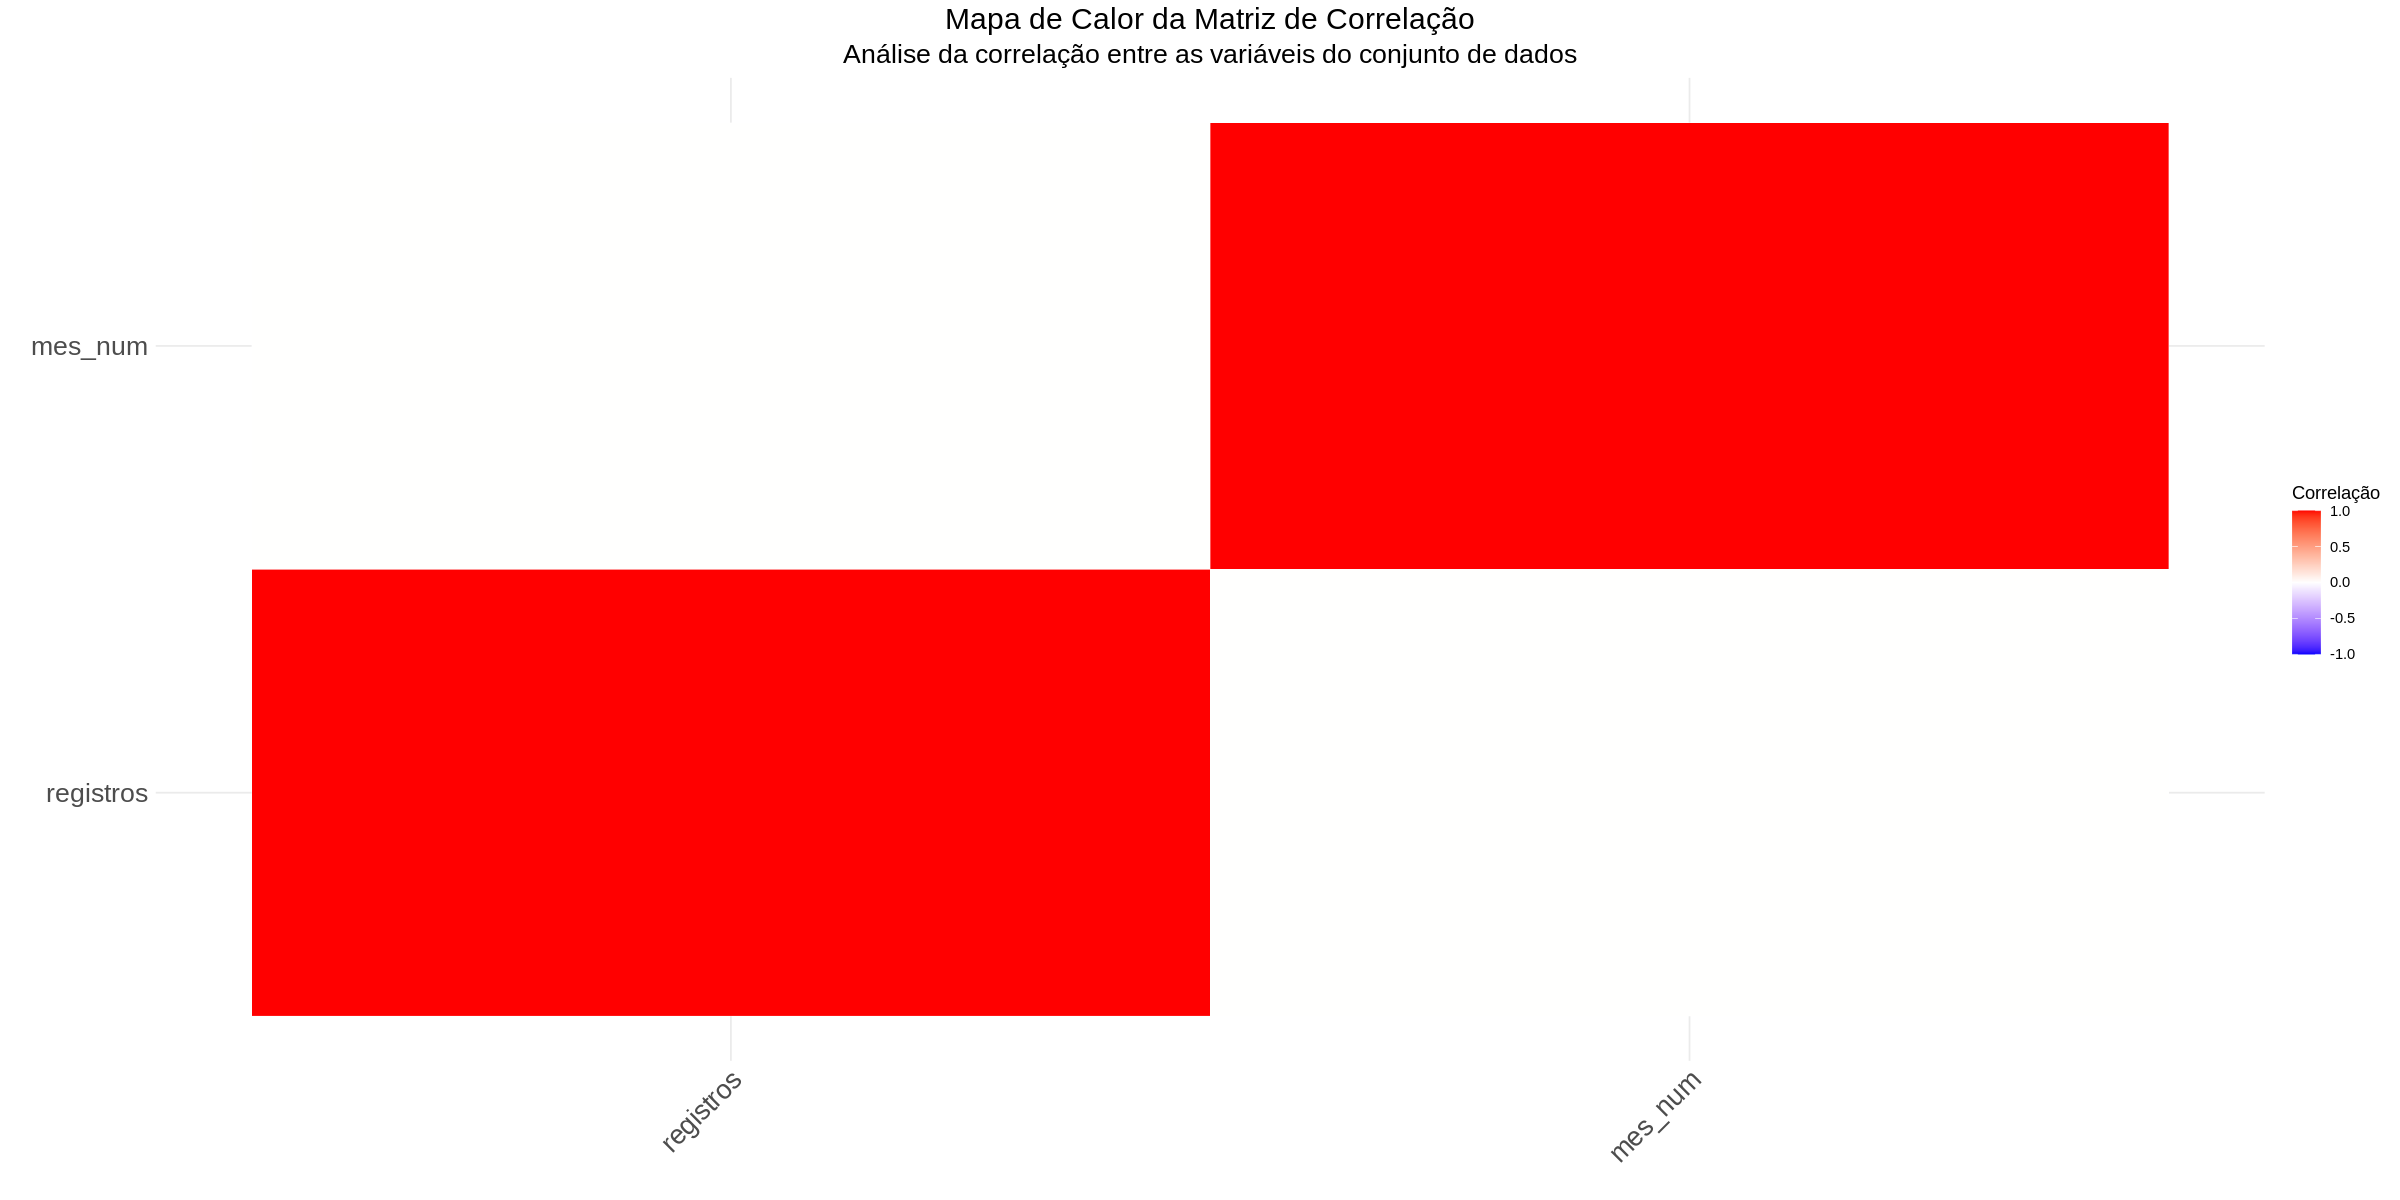

In [123]:
# @title **56 - Análise da correlação entre as variáveis do conjunto de dados**
suppressWarnings({


  Base_Dados$mes_num <- as.numeric(factor(Base_Dados$mes, levels = c("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
                                                                     "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")))


  Base_Dados_num <- Base_Dados %>%
    select(registros, mes_num)


  matriz_correlacao <- cor(Base_Dados_num, use = "complete.obs")


  print("Matriz de Correlação entre Variáveis:")
  print(matriz_correlacao)


  matriz_cor_long <- melt(matriz_correlacao)

  ggplot(matriz_cor_long, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), name = "Correlação") +
    labs(
      title = "Mapa de Calor da Matriz de Correlação",
      subtitle = "Análise da correlação entre as variáveis do conjunto de dados",
      x = "",
      y = ""
    ) +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 16),
      axis.text.y = element_text(size = 16),
      plot.title = element_text(hjust = 0.5, size = 18),
      plot.subtitle = element_text(hjust = 0.5, size = 16)
    )
})

In [138]:
# @title **57 - Análise de Variância (ANOVA) para Avaliação da Influência Mensal nos Registros de Crimes**
anova_mes <- aov(registros ~ mes, data = Base_Dados)
summary(anova_mes)

cat("\n")
cat("A análise sugere que o fator 'mes' não tem um efeito significativo\n",
    "sobre o número de registros de crimes. A variabilidade entre os meses\n",
    "é muito pequena em comparação com a variabilidade dentro dos meses\n",
    "(representada pelos resíduos), o que significa que o número de crimes\n",
    "não varia significativamente entre os meses.")



               Df  Sum Sq Mean Sq F value Pr(>F)
mes             7      24    3.37   0.101  0.998
Residuals   88704 2955345   33.32               


A análise sugere que o fator 'mes' não tem um efeito significativo
 sobre o número de registros de crimes. A variabilidade entre os meses
 é muito pequena em comparação com a variabilidade dentro dos meses
 (representada pelos resíduos), o que significa que o número de crimes
 não varia significativamente entre os meses.

In [142]:
# @title **58 - Análise da Influência do Tipo de Crime e Mês na Frequência de Registros de Crimes**
anova_tipo_mes <- aov(registros ~ mes + natureza, data = Base_Dados)
summary(anova_tipo_mes)

cat("\n")
cat("O fator tipo de crime é altamente significativo, indicando que o tipo de crime\n",
    "influencia fortemente o número de registros. Certos crimes ocorrem com mais frequência\n",
    "que outros, o que gera diferenças significativas nos números de crimes entre as\n",
    "categorias de natureza.\n")


               Df  Sum Sq Mean Sq F value Pr(>F)    
mes             7      24     3.4   0.102  0.998    
natureza       12   19407  1617.3  48.857 <2e-16 ***
Residuals   88692 2935937    33.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


O fator tipo de crime é altamente significativo, indicando que o tipo de crime
 influencia fortemente o número de registros. Certos crimes ocorrem com mais frequência
 que outros, o que gera diferenças significativas nos números de crimes entre as
 categorias de natureza.


Esses valores que estão representando outliers não foram removidos da base de dados,
 pois os mesmos não significam outliers e fazem parte da nossa base de dados.



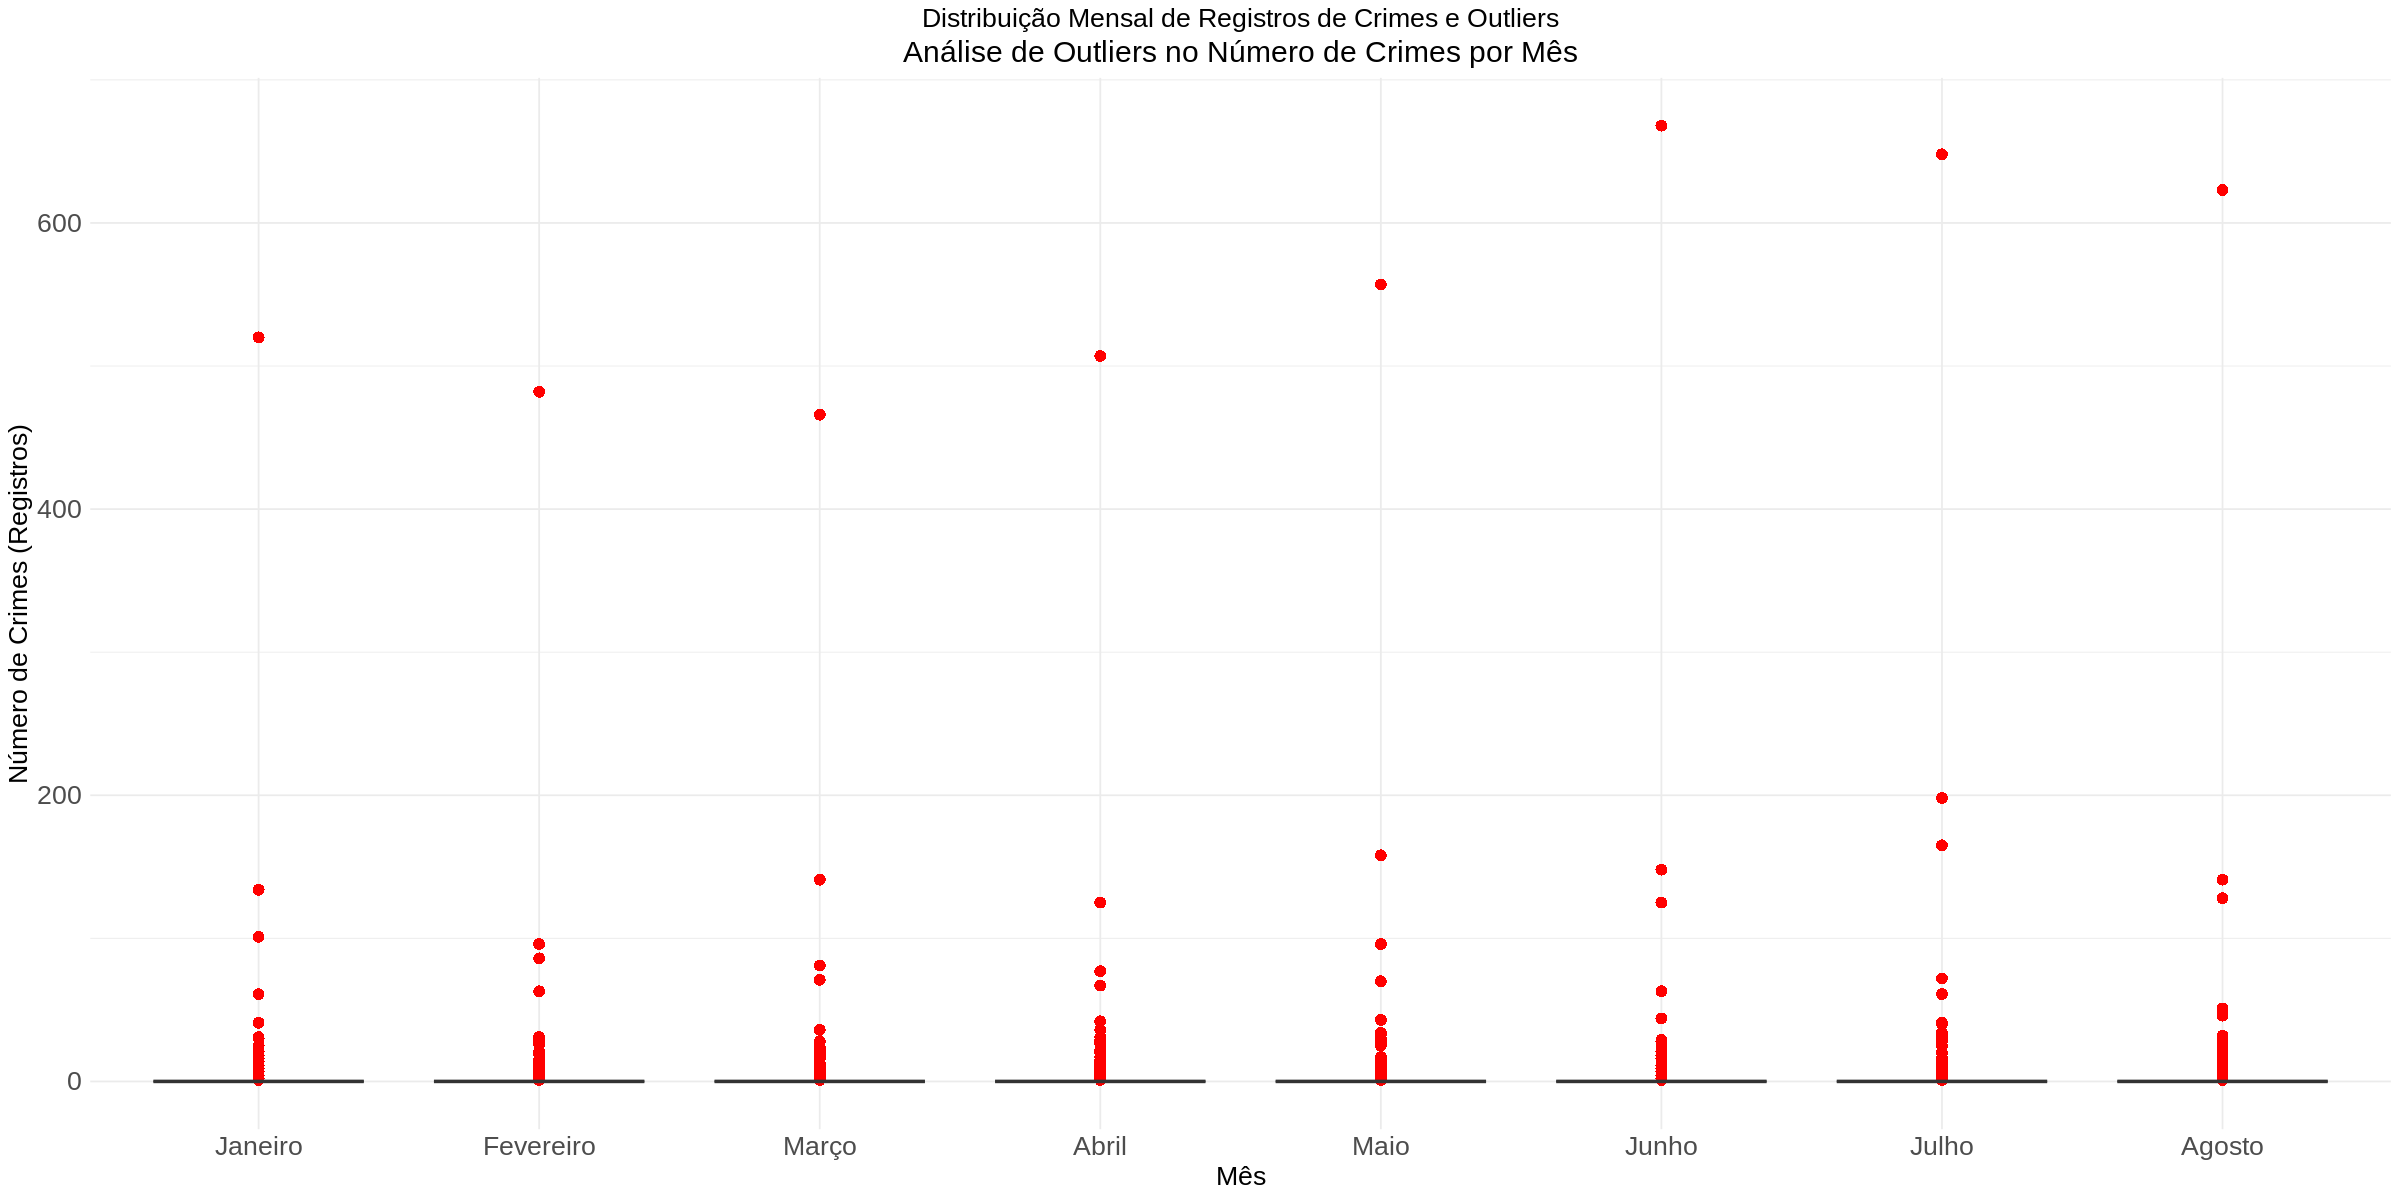

In [150]:
# @title **59 - Análise de Outliers por mes**
Base_Dados$mes <- factor(Base_Dados$mes,
                         levels = c("Janeiro", "Fevereiro", "Março", "Abril",
                                    "Maio", "Junho", "Julho", "Agosto",
                                    "Setembro", "Outubro", "Novembro", "Dezembro"))


options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(Base_Dados, aes(x = mes, y = registros)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 16, outlier.size = 3) +
  labs(
    title = "Distribuição Mensal de Registros de Crimes e Outliers",
    subtitle = "Análise de Outliers no Número de Crimes por Mês",
    x = "Mês",
    y = "Número de Crimes (Registros)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 18)
  )
cat("Esses valores que estão representando outliers não foram removidos da base de dados,\n",
    "pois os mesmos não significam outliers e fazem parte da nossa base de dados.")
cat("\n")
cat("\n")

[NbConvertApp] Converting notebook /content/Análise_Crimes_Violentos_Minas_Gerais.ipynb to pdf
[NbConvertApp] Support files will be in Análise_Crimes_Violentos_Minas_Gerais_files/
[NbConvertApp] Making directory ./Análise_Crimes_Violentos_Minas_Gerais_files
[NbConvertApp] Writing 265639 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2643641 bytes to /content/Análise_Crimes_Violentos_Minas_Gerais.pdf
